# Heterogeneous Effects of Price Fluctuation on the Structure of Shared Homestay Market

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyfixest as pf
from econml.dml import DML
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans
import plotly.express as px
import folium
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
from folium.plugins import HeatMap, MarkerCluster
import branca.colormap as cm
from branca.element import Template, MacroElement
import geojson
from geojson import Polygon
import json
import folium
from folium.plugins import HeatMap
import plotly.express as px
from PIL import Image
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import os


SEED = 42
np.random.seed(SEED)
import os

ROOT = os.getcwd()  # Get the current working directory
DATA = os.path.join(ROOT, "AirDNA")
TABLES = os.path.join(ROOT, "Tables")
print(ROOT)  # Check the working directory
# Create the folder if it does not exist
if not os.path.exists(TABLES):
    os.makedirs(TABLES)

/Users/zhangshuyi/Desktop/Airbnb_Analysis


## Explanatory Data Analysis (EDA): Heatmap

In [11]:
# 1. Read the airbmb price data and see the structure
airbnb_df = pd.read_csv(os.path.join(DATA, "Merged_AirDNA.csv"))
# ADR: Average Daily Rate
print(airbnb_df.columns)
# For all the columns, change " " to "_"
airbnb_df.columns = airbnb_df.columns.str.replace(" ", "_")
# Replace "(" and ")" with ""
airbnb_df.columns = airbnb_df.columns.str.replace("(", "")
airbnb_df.columns = airbnb_df.columns.str.replace(")", "")
print(airbnb_df.shape)
airbnb_df.head()

/var/folders/qf/_z697sgn3jx3215w7ykp1p1r0000gn/T/ipykernel_52774/721857066.py:2: DtypeWarning:

Columns (24,25,26,27,28,29,44) have mixed types. Specify dtype option on import or set low_memory=False.



Index(['Property_ID', 'Date', 'Price_USD', 'Airbnb_Property_ID', 'ADR_USD', 'Airbnb_Accuracy_Rating', 'Airbnb_Checkin_Rating', 'Airbnb_Cleanliness_Rating', 'Airbnb_Communication_Rating', 'Airbnb_HOST_ID', 'Airbnb_Location_Rating', 'Airbnb_Superhost', 'Airbnb_Value_Rating', 'Amenities', 'Bathrooms', 'Bedrooms', 'City', 'Cleaning_Fee_USD', 'Count_Available_Days_LTM', 'Count_Reservation_Days_LTM', 'Country', 'Created_Date', 'Currency_USD', 'Extra_People_Fee', 'Has_Air_Con', 'Has_Gym', 'Has_Hot_Tub', 'Has_Kitchen', 'Has_Parking', 'Has_Pool', 'Host_Type', 'Last_Calendar_Update', 'Latitude', 'Longitude', 'Listing_Type', 'Location_Type', 'Max_Guests', 'Metropolitan_Statistical_Area', 'Minimum_Stay', 'Neighborhood', 'Number_of_Photos', 'Number_of_Reviews', 'Occupancy_Rate', 'Overall_Rating', 'Pets_Allowed', 'Price_Tier', 'Published_Monthly_Rate_USD', 'Published_Nightly_Rate_USD', 'Published_Weekly_Rate_USD', 'Response_Rate', 'Response_Time', 'Revenue_USD', 'Revenue_Potential_USD',
       'Secu

Property_ID        Date  Price_USD  Airbnb_Property_ID  ADR_USD  Airbnb_Accuracy_Rating  Airbnb_Checkin_Rating  Airbnb_Cleanliness_Rating  Airbnb_Communication_Rating  Airbnb_HOST_ID  Airbnb_Location_Rating Airbnb_Superhost  Airbnb_Value_Rating                                                                                           Amenities  Bathrooms  Bedrooms     City  Cleaning_Fee_USD  Count_Available_Days_LTM  Count_Reservation_Days_LTM        Country Created_Date Currency_USD  Extra_People_Fee Has_Air_Con Has_Gym Has_Hot_Tub Has_Kitchen Has_Parking Has_Pool Host_Type        Last_Calendar_Update   Latitude  Longitude     Listing_Type       Location_Type  Max_Guests                  Metropolitan_Statistical_Area  Minimum_Stay Neighborhood  Number_of_Photos  Number_of_Reviews  Occupancy_Rate  Overall_Rating Pets_Allowed Price_Tier  Published_Monthly_Rate_USD  Published_Nightly_Rate_USD  Published_Weekly_Rate_USD  Response_Rate  Response_Time  Revenue_USD  \
0  abnb_10000059  2015-12-01    60.0000          10000059.0      NaN                     9.0                    7.0                        9.0                          9.0      30318697.0                     9.0              NaN                  9.0  ["kitchen","internet","tv","heating","washer","dryer","free_parking","wireless_internet","buzzer"]        1.0       1.0  Chicago               NaN                       NaN                         NaN  United States   2015-12-14          usd              60.0       False   False       False        True        True    False    1 Unit  2017-04-30 14:03:34.925000  41.796286 -87.581496  Entire home/apt  Large City - Urban         3.0  Chicago-Naperville-Elgin, IL-IN-WI Metro Area           1.0    Hyde Park               9.0                3.0        1.000000            70.0        False    economy                      2380.0                        85.0                      595.0          100.0        27921.0        174.0   
1  abnb_10000059  2016-01-01    60.0000          10000059.0      NaN                     9.0                    7.0                        9.0                          9.0      30318697.0                     9.0              NaN                  9.0  ["kitchen","internet","tv","heating","washer","dryer","free_parking","wireless_internet","buzzer"]        1.0       1.0  Chicago               NaN                       NaN                         NaN  United States   2015-12-14          usd              60.0       False   False       False        True        True    False    1 Unit  2017-04-30 14:03:34.925000  41.796286 -87.581496  Entire home/apt  Large City - Urban         3.0  Chicago-Naperville-Elgin, IL-IN-WI Metro Area           1.0    Hyde Park               9.0                3.0        0.903226            70.0        False    economy                      2380.0                        85.0                      595.0          100.0        27921.0       1624.0   
2  abnb_10000059  2016-02-01    60.3448          10000059.0      NaN                     9.0                    7.0                        9.0                          9.0      30318697.0                     9.0              NaN                  9.0  ["kitchen","internet","tv","heating","washer","dryer","free_parking","wireless_internet","buzzer"]        1.0       1.0  Chicago               NaN                       NaN                         NaN  United States   2015-12-14          usd              60.0       False   False       False        True        True    False    1 Unit  2017-04-30 14:03:34.925000  41.796286 -87.581496  Entire home/apt  Large City - Urban         3.0  Chicago-Naperville-Elgin, IL-IN-WI Metro Area           1.0    Hyde Park               9.0                3.0        0.931034            70.0        False    economy                      2380.0                        85.0                      595.0          100.0        27921.0       1566.0   
3  abnb_10000059  2016-03-01    61.9355          10000059.0      NaN             

#### Keep the following variables for analysis:
- Property_ID
- Airbnb_Property_ID
- Date
- Price_USD
- ADR_USD
- Overall_Rating
- Airbnb_Accuracy_Rating
- Airbnb_Checkin_Rating
- Airbnb_Cleanliness_Rating
- Airbnb_Communication_Rating
- Airbnb_Location_Rating 
- Airbnb_Value_Rating
- Airbnb_Superhost
- Bathrooms
- Bedrooms
- Cleaning_Fee_USD
- Count_Available_Days_LTM
- Count_Reservation_Days_LTM
- Extra_People_Fee
- Has_Air_Con
- Has_Gym
- Has_Hot_Tub
- Has_Kitchen
- Has_Parking
- Has_Pool
- Latitude
- Longitude
- Listing_Type
- Location_Type
- Max_Guests
- Metropolitan_Statistical_Area
- Minimum_Stay
- Number_of_Photos
- Number_of_Reviews
- Occupancy_Rate
- Pets_Allowed
- Price_Tier
- Published_Monthly_Rate_USD
- Published_Nightly_Rate_USD
- Published_Weekly_Rate_USD
- Response_Rate
- Response_Time
- Revenue_USD
- Revenue_Potential_USD
- Security_Deposit_USD
- Zipcode

In [12]:
# Show all rows
pd.set_option('display.max_rows', None)

# Show all columns
pd.set_option('display.max_columns', None)

# Show entire content in a cell
pd.set_option('display.max_colwidth', None)

# Prevent truncation of the dataframe width
pd.set_option('display.width', 1000)


          Price_USD  Airbnb_Property_ID       ADR_USD  Airbnb_Accuracy_Rating  Airbnb_Checkin_Rating  Airbnb_Cleanliness_Rating  Airbnb_Communication_Rating  Airbnb_HOST_ID  Airbnb_Location_Rating  Airbnb_Value_Rating     Bathrooms      Bedrooms  Cleaning_Fee_USD  Count_Available_Days_LTM  Count_Reservation_Days_LTM  Extra_People_Fee      Latitude     Longitude    Max_Guests  Minimum_Stay  Number_of_Photos  Number_of_Reviews  Occupancy_Rate  Overall_Rating  Published_Monthly_Rate_USD  Published_Nightly_Rate_USD  Published_Weekly_Rate_USD  Response_Rate  Response_Time   Revenue_USD  Revenue_Potential_USD  Security_Deposit_USD       Zipcode
count  2.419974e+06        2.420456e+06  1.056465e+06            1.866933e+06           1.865898e+06               1.867032e+06                 1.866871e+06    2.377209e+06            1.865720e+06         1.865606e+06  2.374841e+06  2.374849e+06      2.078256e+06              1.056465e+06                1.056465e+06      1.388711e+06  2.378085e+06  2.

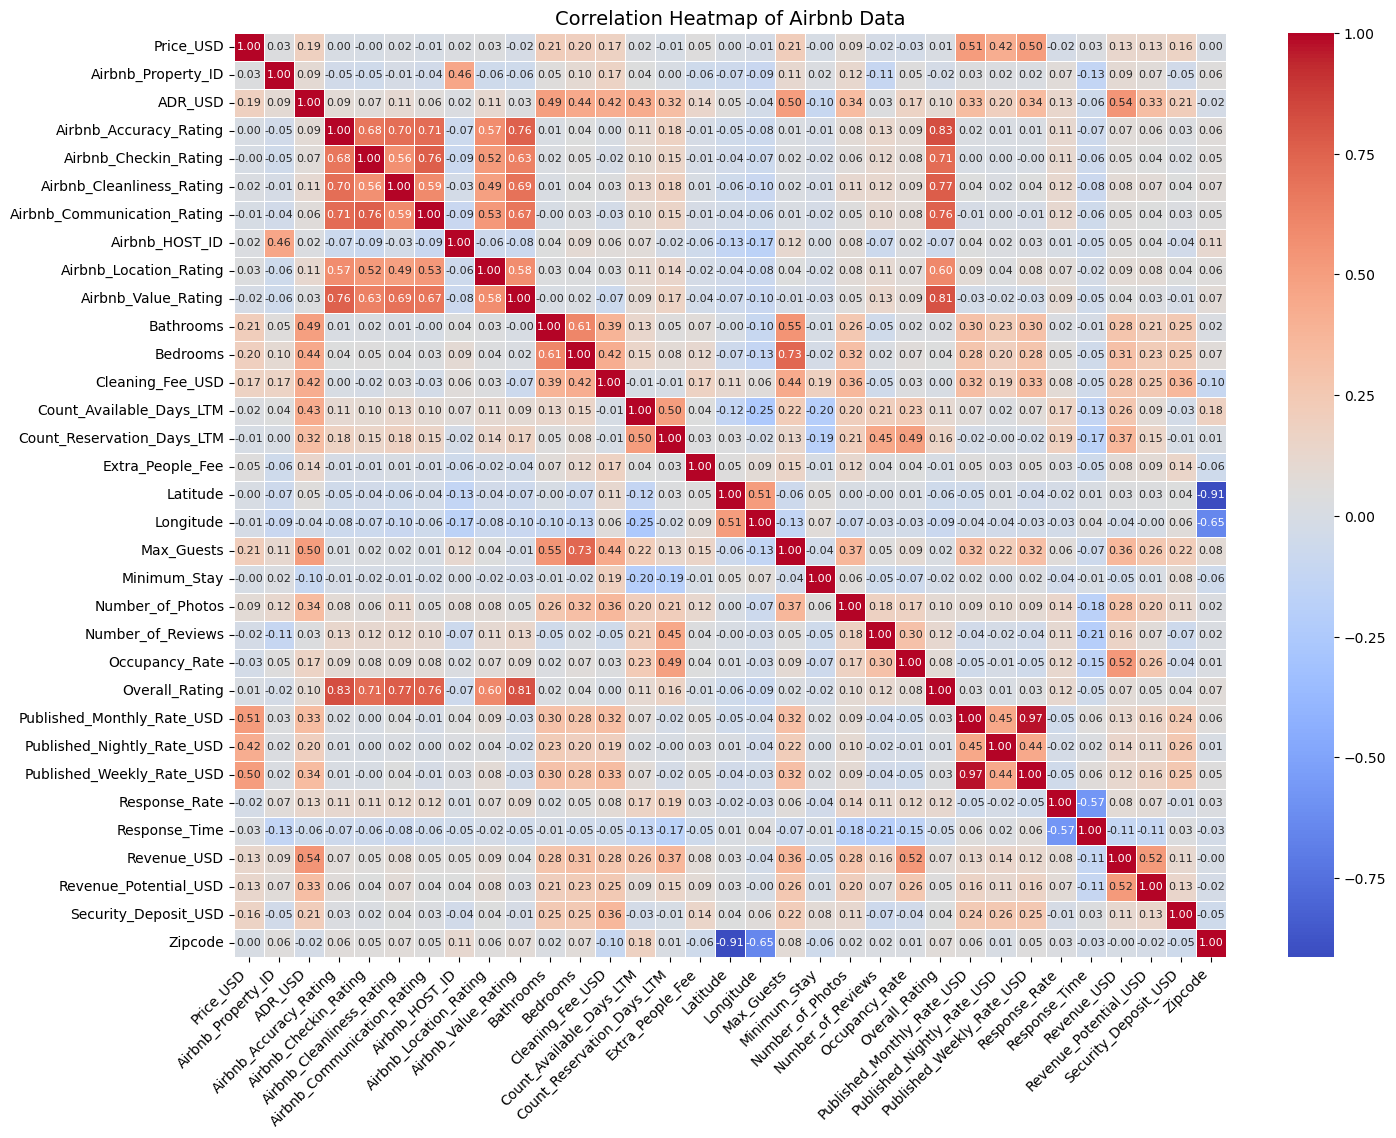

In [13]:
print(airbnb_df.describe())
# Print correlation matrix for all the numerical variables. First pick only the numerical variables
print(airbnb_df.dtypes)
float_columns = airbnb_df.select_dtypes(include=['float64']).columns
# print(float_columns)

# print(airbnb_df[float_columns].corr())
# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(airbnb_df[float_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5,
            annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Heatmap of Airbnb Data", fontsize=14)
plt.show()

### EDA Result:
#### 1.	Positive Relations:
- ADR & Number of bedrooms
- ADR & Cleaning fee
- ADR & Count_Available_Days_LTM & Count_Reservation_Days
- ADR & Max of Guests
- ADR & Number of Photos
- ADR & Published Monthly/Weekly/Nightly Rate
- ADR & Revenue Potential 
- ADR & Security Deposit
- ADR not highly correlated with all (sub-)rating & overall rating
- Count_Available_Days_LTM & Count_Reservation_Days —— Occupancy Rate & Max Guests
- Count_Available_Days_LTM & Count_Reservation_Days —— Occupancy Rate & Number of Photos
- Count_Available_Days_LTM & Count_Reservation_Days —— Occupancy Rate Number of Reviews & Review Ratings
- Count_Available_Days_LTM & Count_Reservation_Days —— Revenue
- Max Guests & Published Monthly/Weekly/Nightly Rate, Revenue
#### 2.	Negative Relations:
- Response Rate & Response Time
- Response of time & Occupancy Rate


## GIS Analysis for Chicago
##### RQ1: For Airbnb listings with higher ADR, how do their distribution / extreme points change over time (six-month time window as a time period) ———— color of the dots
##### RQ2: For Airbnb listings, how do the distribution (according to the density of Airbnb listings) change over time (six-month time window as a time period) ———— color of the heat map? Are there any newly poped-up house groups; and for some specific metropilian areas, are the density of the house significantly changeing?
##### RQ3: Airbnb ADR trend over ten years' time?

In [14]:
# Convert Date column to datetime
airbnb_df['Date'] = pd.to_datetime(airbnb_df['Date'])
airbnb_df['Year'] = airbnb_df['Date'].dt.year
airbnb_df['Month'] = airbnb_df['Date'].dt.month

# Drop missing values for geospatial data
airbnb_df = airbnb_df.dropna(subset=['Latitude', 'Longitude', 'ADR_USD'])
print(airbnb_df.dtypes[['Year', 'Month']])
airbnb_df['Year'] = airbnb_df['Year'].astype(int)
airbnb_df['Month'] = airbnb_df['Month'].astype(int)
airbnb_df['Latitude'] = airbnb_df['Latitude'].astype(float)
airbnb_df['Longitude'] = airbnb_df['Longitude'].astype(float)
airbnb_df['Month'] = airbnb_df['Month'].astype(str).str.lstrip('0').astype(int)
# Get unique years for dropdown selection
unique_years = sorted(airbnb_df['Year'].unique())
print(airbnb_df[['Year', 'Month']].isna().sum())
print(airbnb_df[['Year', 'Month', 'Date']].sample(5))
print(len(airbnb_df))

# Filter for Chicago listings
df_chicago = airbnb_df[airbnb_df['City'].str.lower() == 'chicago'].copy()

Year     int32
Month    int32
dtype: object
Year     0
Month    0
dtype: int64
         Year  Month       Date
830950   2023     12 2023-12-01
2276814  2023      9 2023-09-01
1924575  2022      8 2022-08-01
1248461  2019      9 2019-09-01
1299933  2021     11 2021-11-01
1056465


#### Option 1: Users can choose the Year and the month

In [15]:
# -------------------
# Create Dash App
# -------------------
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Interactive Airbnb Map of Chicago", style={'text-align': 'center'}),

    # Year Selection Dropdown
    html.Label("Select Year:"),
    dcc.Dropdown(
        id="year_selection",
        options=[{"label": str(year), "value": year} for year in unique_years],
        value=unique_years[0],  # Default to the first year
        clearable=False
    ),

    # Month Selection Slider
    html.Label("Select Month:"),
    dcc.Slider(
        id="month_selection",
        min=1,
        max=12,
        marks={i: str(i) for i in range(10, 13)},
        value=1,  # Default to January
        step=1
    ),

    # Display Map
    html.Iframe(id="map", width="100%", height="600"),

    # Time Series Chart
    dcc.Graph(id="time_series_chart")
])

# -------------------
# Callback to Update Month Slider Based on Year Selection
# -------------------
@app.callback(
    [Output("month_selection", "marks"),
     Output("month_selection", "min"),
     Output("month_selection", "max"),
     Output("month_selection", "value")],  # Ensures valid default selection
    [Input("year_selection", "value")]
)

def update_month_options(selected_year):
    """Dynamically update the available months based on the selected year."""
    if selected_year == 2014:
        available_months = list(range(10, 13))  # Only October - December
    elif selected_year == 2024:
        available_months = list(range(1, 11))  # Only January - October
    else:
        available_months = list(range(1, 13))  # All months (1-12)

    # Format marks for slider
    marks = {m: str(m) for m in available_months}

    return marks, min(available_months), max(available_months), min(available_months)

# -------------------
# Callback to Update Map and Graph
# -------------------
@app.callback(
    [Output("map", "srcDoc"), Output("time_series_chart", "figure")],
    [Input("year_selection", "value"), Input("month_selection", "value")]
)
def update_map(year, month):
    # Filter Data for Selected Time Period
    filtered_data = df_chicago[(df_chicago['Year'] == year) & (df_chicago['Month'] == month)]

    #print(f"Year: {year}, Month: {month}")
    #print(f"Filtered data count: {len(filtered_data)}")

    if filtered_data.empty:
        print("No data available for the selected year and month.")

    # Ensure Latitude/Longitude are within expected range (Chicago area)
    #print(filtered_data[['Latitude', 'Longitude']].describe())

    chicago_map = folium.Map(
        location=[41.8781, -87.6298], 
        zoom_start=11,
        tiles=None  # Disable default tiles
    )

    # Add a tile layer manually
    folium.TileLayer(
        tiles='https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
        attr='OpenStreetMap Contributors',
        name='OpenStreetMap'
    ).add_to(chicago_map)

    # Add Heatmap Layer (Drop NaN values)
    heat_data = filtered_data[['Latitude', 'Longitude']].dropna().values.tolist()
    HeatMap(heat_data, radius=15, blur = 10, max_zoom=13).add_to(chicago_map)

    # Define a diverging color scale for ADR
    colormap = cm.LinearColormap(
        colors=['blue', 'green', 'yellow', 'orange', 'red'],
        vmin=filtered_data['ADR_USD'].min(),
        vmax=filtered_data['ADR_USD'].max(),
        caption='Average Daily Rate (USD)'
    )
    chicago_map.add_child(colormap)
    
    # Add Circle Markers for listings
    for _, row in filtered_data.iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=3,
            color=colormap(row['ADR_USD']),
            fill=True,
            fill_color=colormap(row['ADR_USD']),
            fill_opacity=0.7,
            popup=f"Date: {row['Date'].date()}<br>ADR: ${row['ADR_USD']:.2f}"
        ).add_to(chicago_map)

    # Custom legend HTML
    legend_html = '''
    <div style="
        position: fixed;
        bottom: 50px;
        left: 50px;
        width: 180px;
        border: 2px solid grey;
        z-index: 9999;
        font-size: 14px;
        background-color: white;
        opacity: 0.8;
        padding: 10px;
        box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
        ">
        <b>Heatmap Legend</b><br>
        <div style="display: flex; align-items: center;">
            <i style="background: blue; width: 20px; height: 20px; display: inline-block; margin-right: 5px;"></i>
            Very Low Density
        </div>
        <div style="display: flex; align-items: center;">
            <i style="background: green; width: 20px; height: 20px; display: inline-block; margin-right: 5px;"></i>
            Low Density
        </div>
        <div style="display: flex; align-items: center;">
            <i style="background: yellow; width: 20px; height: 20px; display: inline-block; margin-right: 5px;"></i>
            Medium Density
        </div>
        <div style="display: flex; align-items: center;">
            <i style="background: orange; width: 20px; height: 20px; display: inline-block; margin-right: 5px;"></i>
            High Density
        </div>
        <div style="display: flex; align-items: center;">
            <i style="background: red; width: 20px; height: 20px; display: inline-block; margin-right: 5px;"></i>
            Very High Density
        </div>
    </div>
    '''

    # Add legend to map
    chicago_map.get_root().html.add_child(folium.Element(legend_html))

    # Save Map as HTML
    map_path = "chicago_airbnb_map.html"
    chicago_map.save(map_path)

    # Load the HTML content for the map
    with open(map_path, "r", encoding="utf-8") as f:
         map_html = f.read()

    #Create Time Series Plot
    time_series_data = df_chicago.groupby(['Year', 'Month'])['ADR_USD'].mean().reset_index()
    time_series_data['Date'] = pd.to_datetime(time_series_data[['Year', 'Month']].assign(DAY=1))
    fig = px.line(time_series_data, x='Date', y='ADR_USD',
                  title="Airbnb Average Daily Rate Trends Over Time",
                  labels={'ADR_USD': 'Average Daily Rate (USD)', 'Date': 'Date'},
                  template="plotly_white")

    return map_html, fig

# -------------------
# Run App
# -------------------
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)

#### Option 2: Users can choose the six-month time window.

In [16]:
# Create 'Period' column representing six-month windows
df_chicago['Period'] = (df_chicago['Date'].dt.year.astype(str) + '-' +
                        (df_chicago['Date'].dt.month // 7 * 6 + 1).astype(str).str.zfill(2))

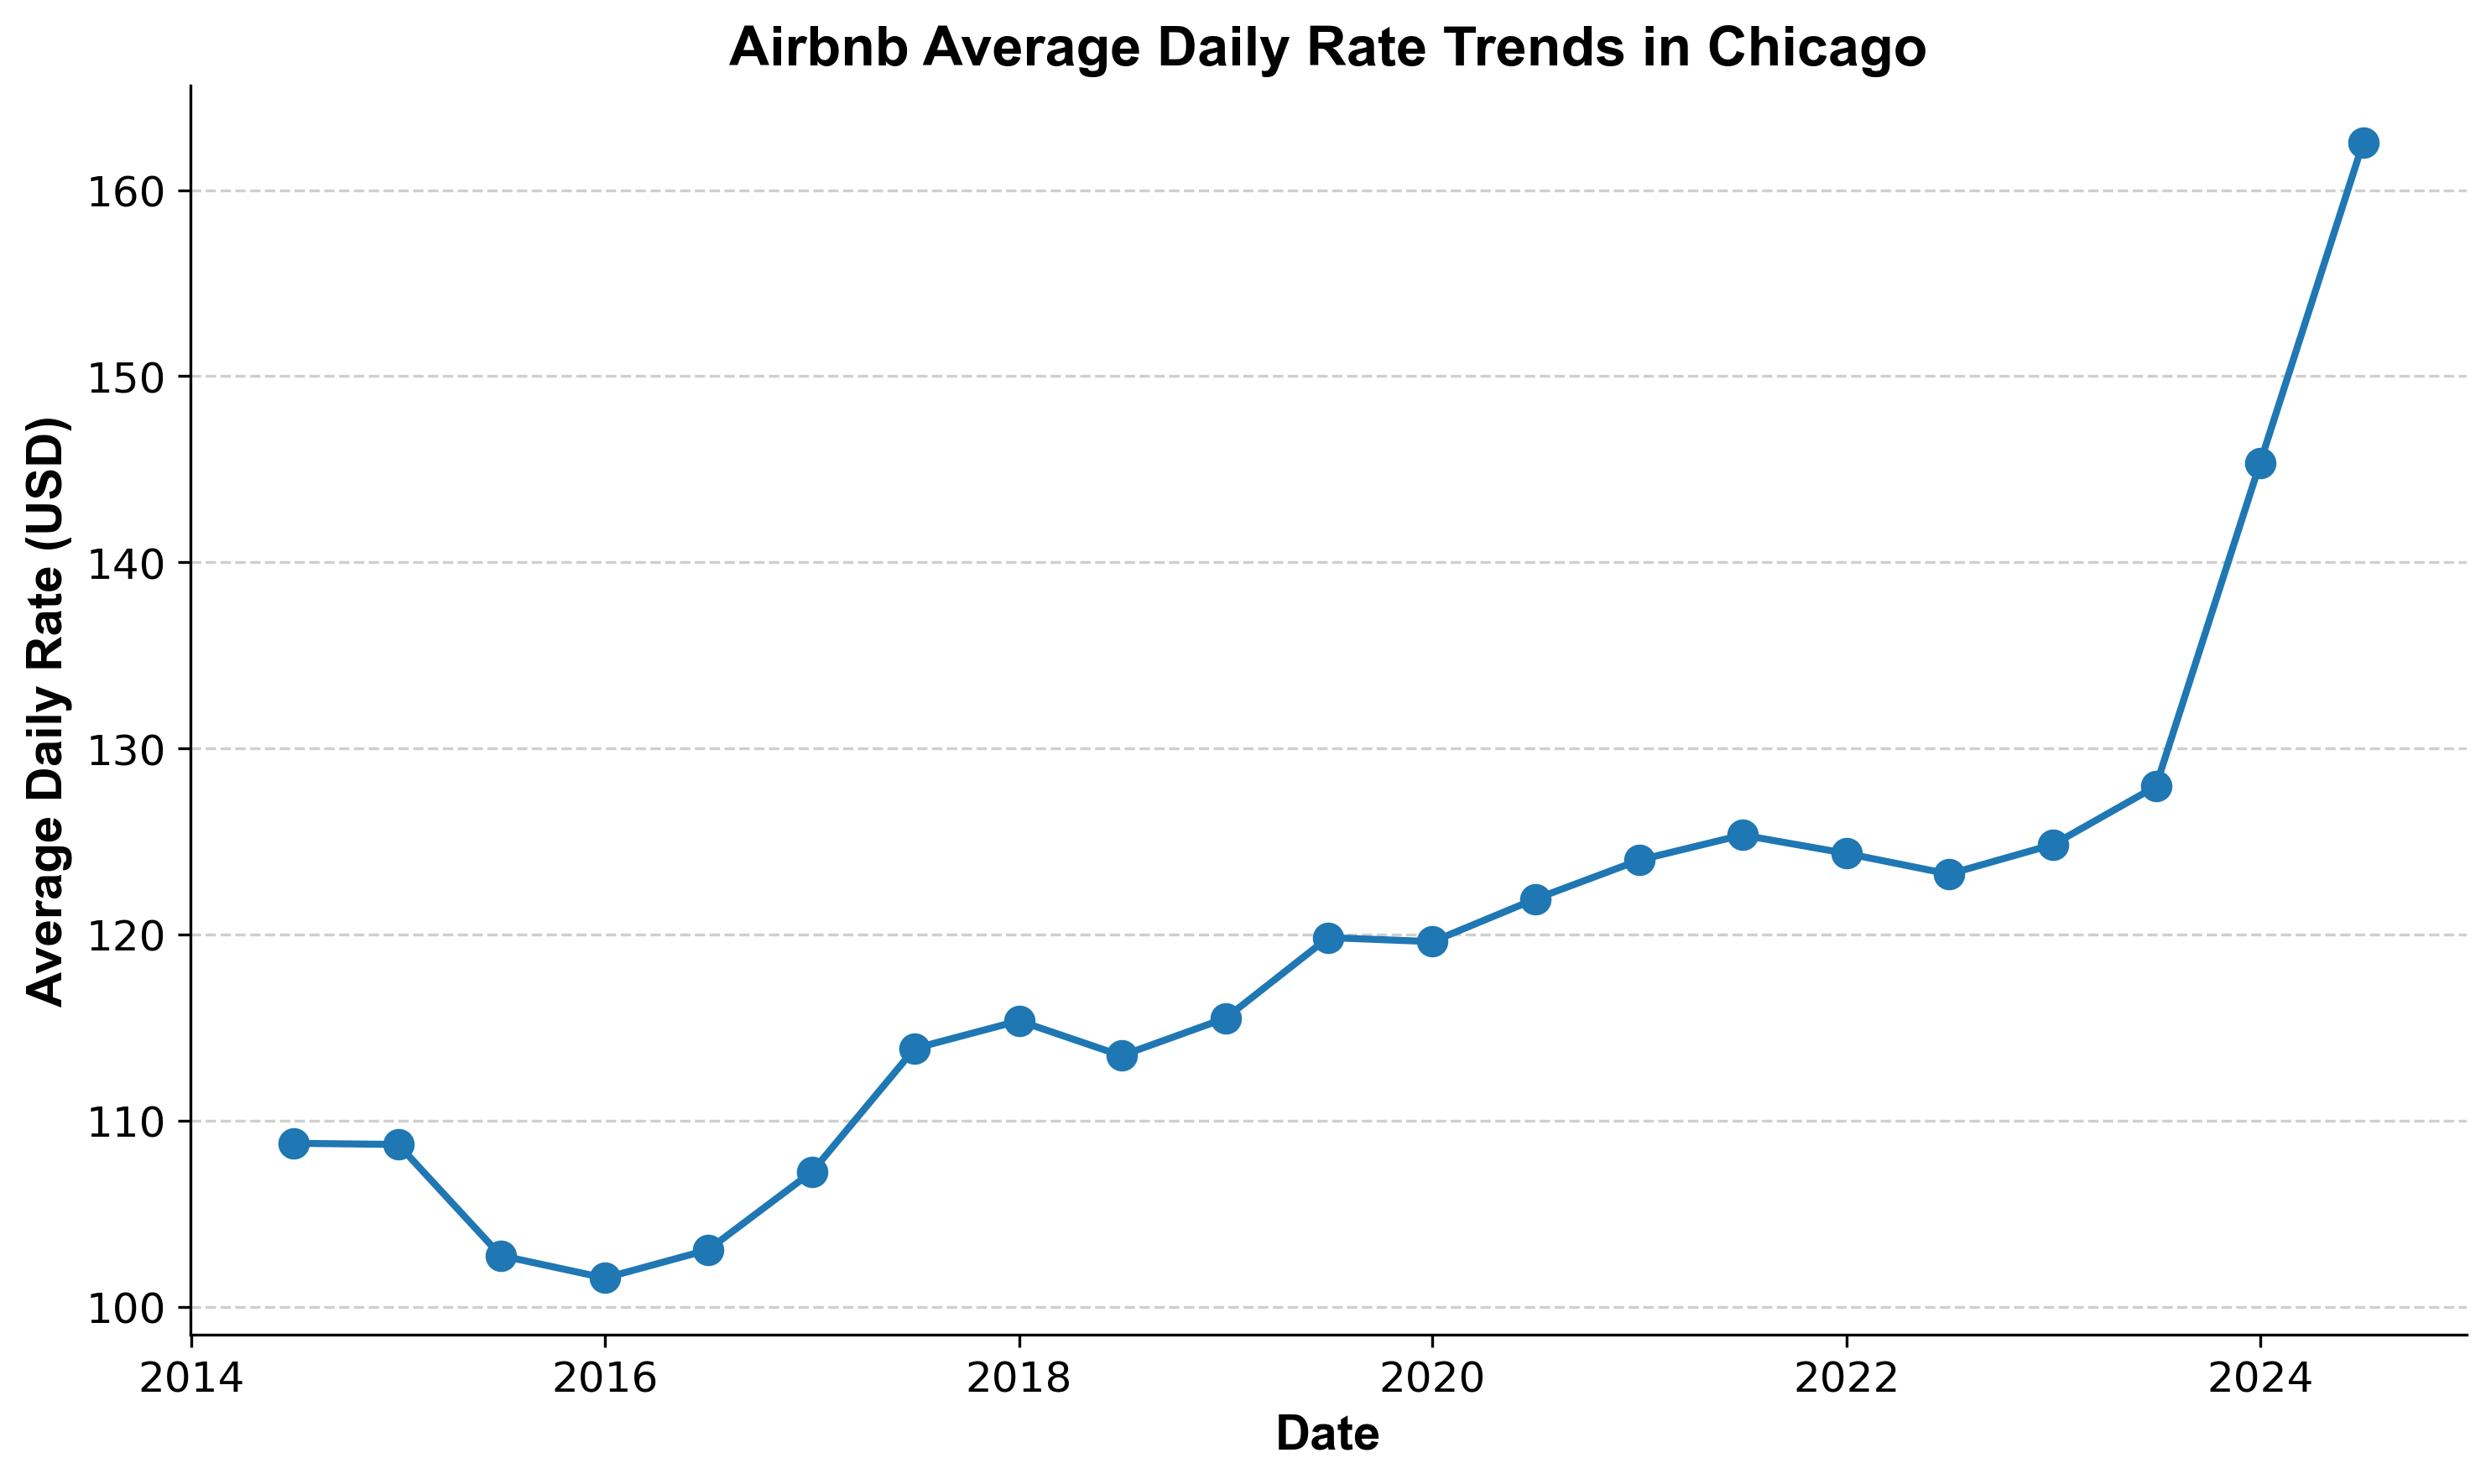

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create Time Series Data
time_series_data = df_chicago.groupby('Period')['ADR_USD'].mean().reset_index()
time_series_data['Date'] = pd.to_datetime(time_series_data['Period'])

# Create the figure with a higher resolution
plt.figure(figsize=(10, 6), dpi=300)

# Plot the time series
plt.plot(time_series_data['Date'], time_series_data['ADR_USD'], 
         marker='o', markersize=8, linestyle='-', linewidth=2, color='#1f77b4')

# Customize the plot
plt.title('Airbnb Average Daily Rate Trends in Chicago', fontsize=16, fontweight='bold', fontname='Arial')
plt.xlabel('Date', fontsize=14, fontweight='bold', fontname='Arial')
plt.ylabel('Average Daily Rate (USD)', fontsize=14, fontweight='bold', fontname='Arial')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Remove unnecessary spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust tick sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the figure
plt.tight_layout()
plt.savefig("airbnb_adr_trend.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
def save_map_as_image(map_path, period):
    print("Saving map as image...")
    try:
        # Set up Chrome options
        chrome_options = Options()
        chrome_options.add_argument("--headless")
        chrome_options.add_argument("--window-size=1920,1080")

        # Initialize the driver
        driver = webdriver.Chrome(options=chrome_options)

        # Load the map
        driver.get(f"file://{map_path}")

        # Wait for the map to load
        import time
        time.sleep(5)  # Adjust this time based on your map's loading speed

        # Define the output file path
        output_file_path = os.path.join(OUTPUT_GIS, f"chicago_airbnb_map_{period}.png")
        print(f"Saving map to: {output_file_path}")

        # Save the map as an image
        driver.save_screenshot(output_file_path)

        # Close the driver
        driver.quit()
        print("Map saved successfully.")
    except Exception as e:
        print(f"Error saving map: {e}")

def save_plot_as_image(fig, period):
    print("Saving plot as image...")
    try:
        # Define the output file path
        output_file_path = os.path.join(OUTPUT_GIS, f"airbnb_adr_trend_{period}.png")
        print(f"Saving plot to: {output_file_path}")

        # Save the plot as an image
        fig.write_image(output_file_path)
        print("Plot saved successfully.")
    except Exception as e:
        print(f"Error saving plot: {e}")


# Define your directory paths
ROOT = os.getcwd()  # Get the current working directory
OUTPUT_GIS = os.path.join(ROOT, "output_GIS")

# Create the folder if it does not exist
if not os.path.exists(OUTPUT_GIS):
    os.makedirs(OUTPUT_GIS)

# Loop to save maps for all periods
for i, period in enumerate(sorted(df_chicago['Period'].unique())):
    print(f"Processing period: {period}")
    
    # Filter data for the selected period
    filtered_data = df_chicago[df_chicago['Period'] == period]
    print(f"Filtered data shape: {filtered_data.shape}")
    
    # Create Folium Map centered on Chicago
    chicago_map = folium.Map(
        location=[41.8781, -87.6298], 
        zoom_start=11,
        tiles=None  # Disable default tiles
    )
    
    # Add a tile layer manually
    folium.TileLayer(
        tiles='https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
        attr='OpenStreetMap Contributors',
        name='OpenStreetMap'
    ).add_to(chicago_map)
    
    # Add Heatmap Layer
    heat_data = filtered_data[['Latitude', 'Longitude']].dropna().values.tolist()
    HeatMap(heat_data, radius=15, blur=10, max_zoom=13).add_to(chicago_map)
    
    # Define a color scale for ADR
    colormap = cm.LinearColormap(
        colors=['blue', 'green', 'yellow', 'orange', 'red'],
        vmin=filtered_data['ADR_USD'].min(),
        vmax=filtered_data['ADR_USD'].max(),
        caption='Average Daily Rate (USD)'
    )
    chicago_map.add_child(colormap)
    
    # Add Circle Markers for listings
    for _, row in filtered_data.iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=3,
            color=colormap(row['ADR_USD']),
            fill=True,
            fill_color=colormap(row['ADR_USD']),
            fill_opacity=0.7,
            popup=f"Date: {row['Date'].date()}<br>ADR: ${row['ADR_USD']:.2f}"
        ).add_to(chicago_map)
    
    # Save Map as HTML
    map_path = os.path.join(OUTPUT_GIS, f"chicago_airbnb_map_{period}.html")
    chicago_map.save(map_path)
    
    # Save Map as Image using Selenium
    save_map_as_image(map_path, period)
    
    # Create Time Series Plot
    time_series_data = df_chicago.groupby('Period')['ADR_USD'].mean().reset_index()
    time_series_data['Date'] = pd.to_datetime(time_series_data['Period'])
    fig = px.line(time_series_data, x='Date', y='ADR_USD',
                  title="Airbnb Average Daily Rate Trends Over Time",
                  labels={'ADR_USD': 'Average Daily Rate (USD)', 'Date': 'Date'},
                  template="plotly_white")
    
    # Save Time Series Plot as Image
    save_plot_as_image(fig, period)

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Interactive Airbnb Map of Chicago", style={'text-align': 'center'}),

    # Period Selection Slider
    html.Label("Select Six-Month Period:"),
    dcc.Slider(
        id="period_selection",
        min=0,
        max=len(df_chicago['Period'].unique()) - 1,
        value=0,
        marks={i: period for i, period in enumerate(sorted(df_chicago['Period'].unique()))},
        step=None
    ),

    # Display Map
    html.Iframe(id="map", width="100%", height="600"),

    # Time Series Chart
    dcc.Graph(id="time_series_chart")
])

@app.callback(
    [Output("map", "srcDoc"), Output("time_series_chart", "figure")],
    [Input("period_selection", "value")]
)
def update_map(selected_period_index):
    print(f"Updating map and plot for period index: {selected_period_index}")
    
    try:
        # Get the selected period
        periods = sorted(df_chicago['Period'].unique())
        print(f"Available periods: {periods}")
        
        selected_period = periods[selected_period_index]
        print(f"Selected period: {selected_period}")
        
        # Filter data for the selected period
        filtered_data = df_chicago[df_chicago['Period'] == selected_period]
        print(f"Filtered data shape: {filtered_data.shape}")
        
        # Create Folium Map centered on Chicago
        chicago_map = folium.Map(
            location=[41.8781, -87.6298], 
            zoom_start=11,
            tiles=None  # Disable default tiles
        )
        
        # Add a tile layer manually
        folium.TileLayer(
            tiles='https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
            attr='OpenStreetMap Contributors',
            name='OpenStreetMap'
        ).add_to(chicago_map)
        
        # Add Heatmap Layer
        heat_data = filtered_data[['Latitude', 'Longitude']].dropna().values.tolist()
        HeatMap(heat_data, radius=15, blur=10, max_zoom=13).add_to(chicago_map)
        
        # Define a color scale for ADR
        colormap = cm.LinearColormap(
            colors=['blue', 'green', 'yellow', 'orange', 'red'],
            vmin=filtered_data['ADR_USD'].min(),
            vmax=filtered_data['ADR_USD'].max(),
            caption='Average Daily Rate (USD)'
        )
        chicago_map.add_child(colormap)
        
        # Add Circle Markers for listings
        for _, row in filtered_data.iterrows():
            folium.CircleMarker(
                location=[row['Latitude'], row['Longitude']],
                radius=3,
                color=colormap(row['ADR_USD']),
                fill=True,
                fill_color=colormap(row['ADR_USD']),
                fill_opacity=0.7,
                popup=f"Date: {row['Date'].date()}<br>ADR: ${row['ADR_USD']:.2f}"
            ).add_to(chicago_map)
        
        # Save Map as HTML
        map_path = os.path.join(OUTPUT_GIS, f"chicago_airbnb_map_{selected_period}.html")
        chicago_map.save(map_path)
        
        # Load the HTML content for the map
        with open(map_path, "r", encoding="utf-8") as f:
            map_html = f.read()
        
        # Save Map as Image using Selenium
        save_map_as_image(map_path, selected_period)
        
        # Create Time Series Plot
        time_series_data = df_chicago.groupby('Period')['ADR_USD'].mean().reset_index()
        time_series_data['Date'] = pd.to_datetime(time_series_data['Period'])
        fig = px.line(time_series_data, x='Date', y='ADR_USD',
                      title="Airbnb Average Daily Rate Trends Over Time",
                      labels={'ADR_USD': 'Average Daily Rate (USD)', 'Date': 'Date'},
                      template="plotly_white")
        
        # Save Time Series Plot as Image
        save_plot_as_image(fig, selected_period)
        
        print("Map and plot updated successfully.")
        return map_html, fig
    except Exception as e:
        print(f"Error updating map and plot: {e}")

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


Processing period: 2014-07
Filtered data shape: (1197, 58)
Saving map as image...
Saving map to: /Users/zhangshuyi/Desktop/Airbnb_Analysis/output_GIS/chicago_airbnb_map_2014-07.png
Map saved successfully.
Saving plot as image...
Saving plot to: /Users/zhangshuyi/Desktop/Airbnb_Analysis/output_GIS/airbnb_adr_trend_2014-07.png
Plot saved successfully.
Processing period: 2015-01
Filtered data shape: (2401, 58)
Saving map as image...
Saving map to: /Users/zhangshuyi/Desktop/Airbnb_Analysis/output_GIS/chicago_airbnb_map_2015-01.png
Map saved successfully.
Saving plot as image...
Saving plot to: /Users/zhangshuyi/Desktop/Airbnb_Analysis/output_GIS/airbnb_adr_trend_2015-01.png
Plot saved successfully.
Processing period: 2015-07
Filtered data shape: (2569, 58)
Saving map as image...
Saving map to: /Users/zhangshuyi/Desktop/Airbnb_Analysis/output_GIS/chicago_airbnb_map_2015-07.png
Map saved successfully.
Saving plot as image...
Saving plot to: /Users/zhangshuyi/Desktop/Airbnb_Analysis/output_GI

Updating map and plot for period index: 0
Available periods: ['2014-07', '2015-01', '2015-07', '2016-01', '2016-07', '2017-01', '2017-07', '2018-01', '2018-07', '2019-01', '2019-07', '2020-01', '2020-07', '2021-01', '2021-07', '2022-01', '2022-07', '2023-01', '2023-07', '2024-01', '2024-07']
Selected period: 2014-07
Filtered data shape: (1197, 58)
Saving map as image...
Updating map and plot for period index: 0
Available periods: ['2014-07', '2015-01', '2015-07', '2016-01', '2016-07', '2017-01', '2017-07', '2018-01', '2018-07', '2019-01', '2019-07', '2020-01', '2020-07', '2021-01', '2021-07', '2022-01', '2022-07', '2023-01', '2023-07', '2024-01', '2024-07']
Selected period: 2014-07
Filtered data shape: (1197, 58)
Saving map as image...
Saving map to: /Users/zhangshuyi/Desktop/Airbnb_Analysis/output_GIS/chicago_airbnb_map_2014-07.png
Map saved successfully.
Saving plot as image...
Saving plot to: /Users/zhangshuyi/Desktop/Airbnb_Analysis/output_GIS/airbnb_adr_trend_2014-07.png
Plot save

## "Max_Guests" Analysis
#### 1. Histogram of Max_Guests Distribution

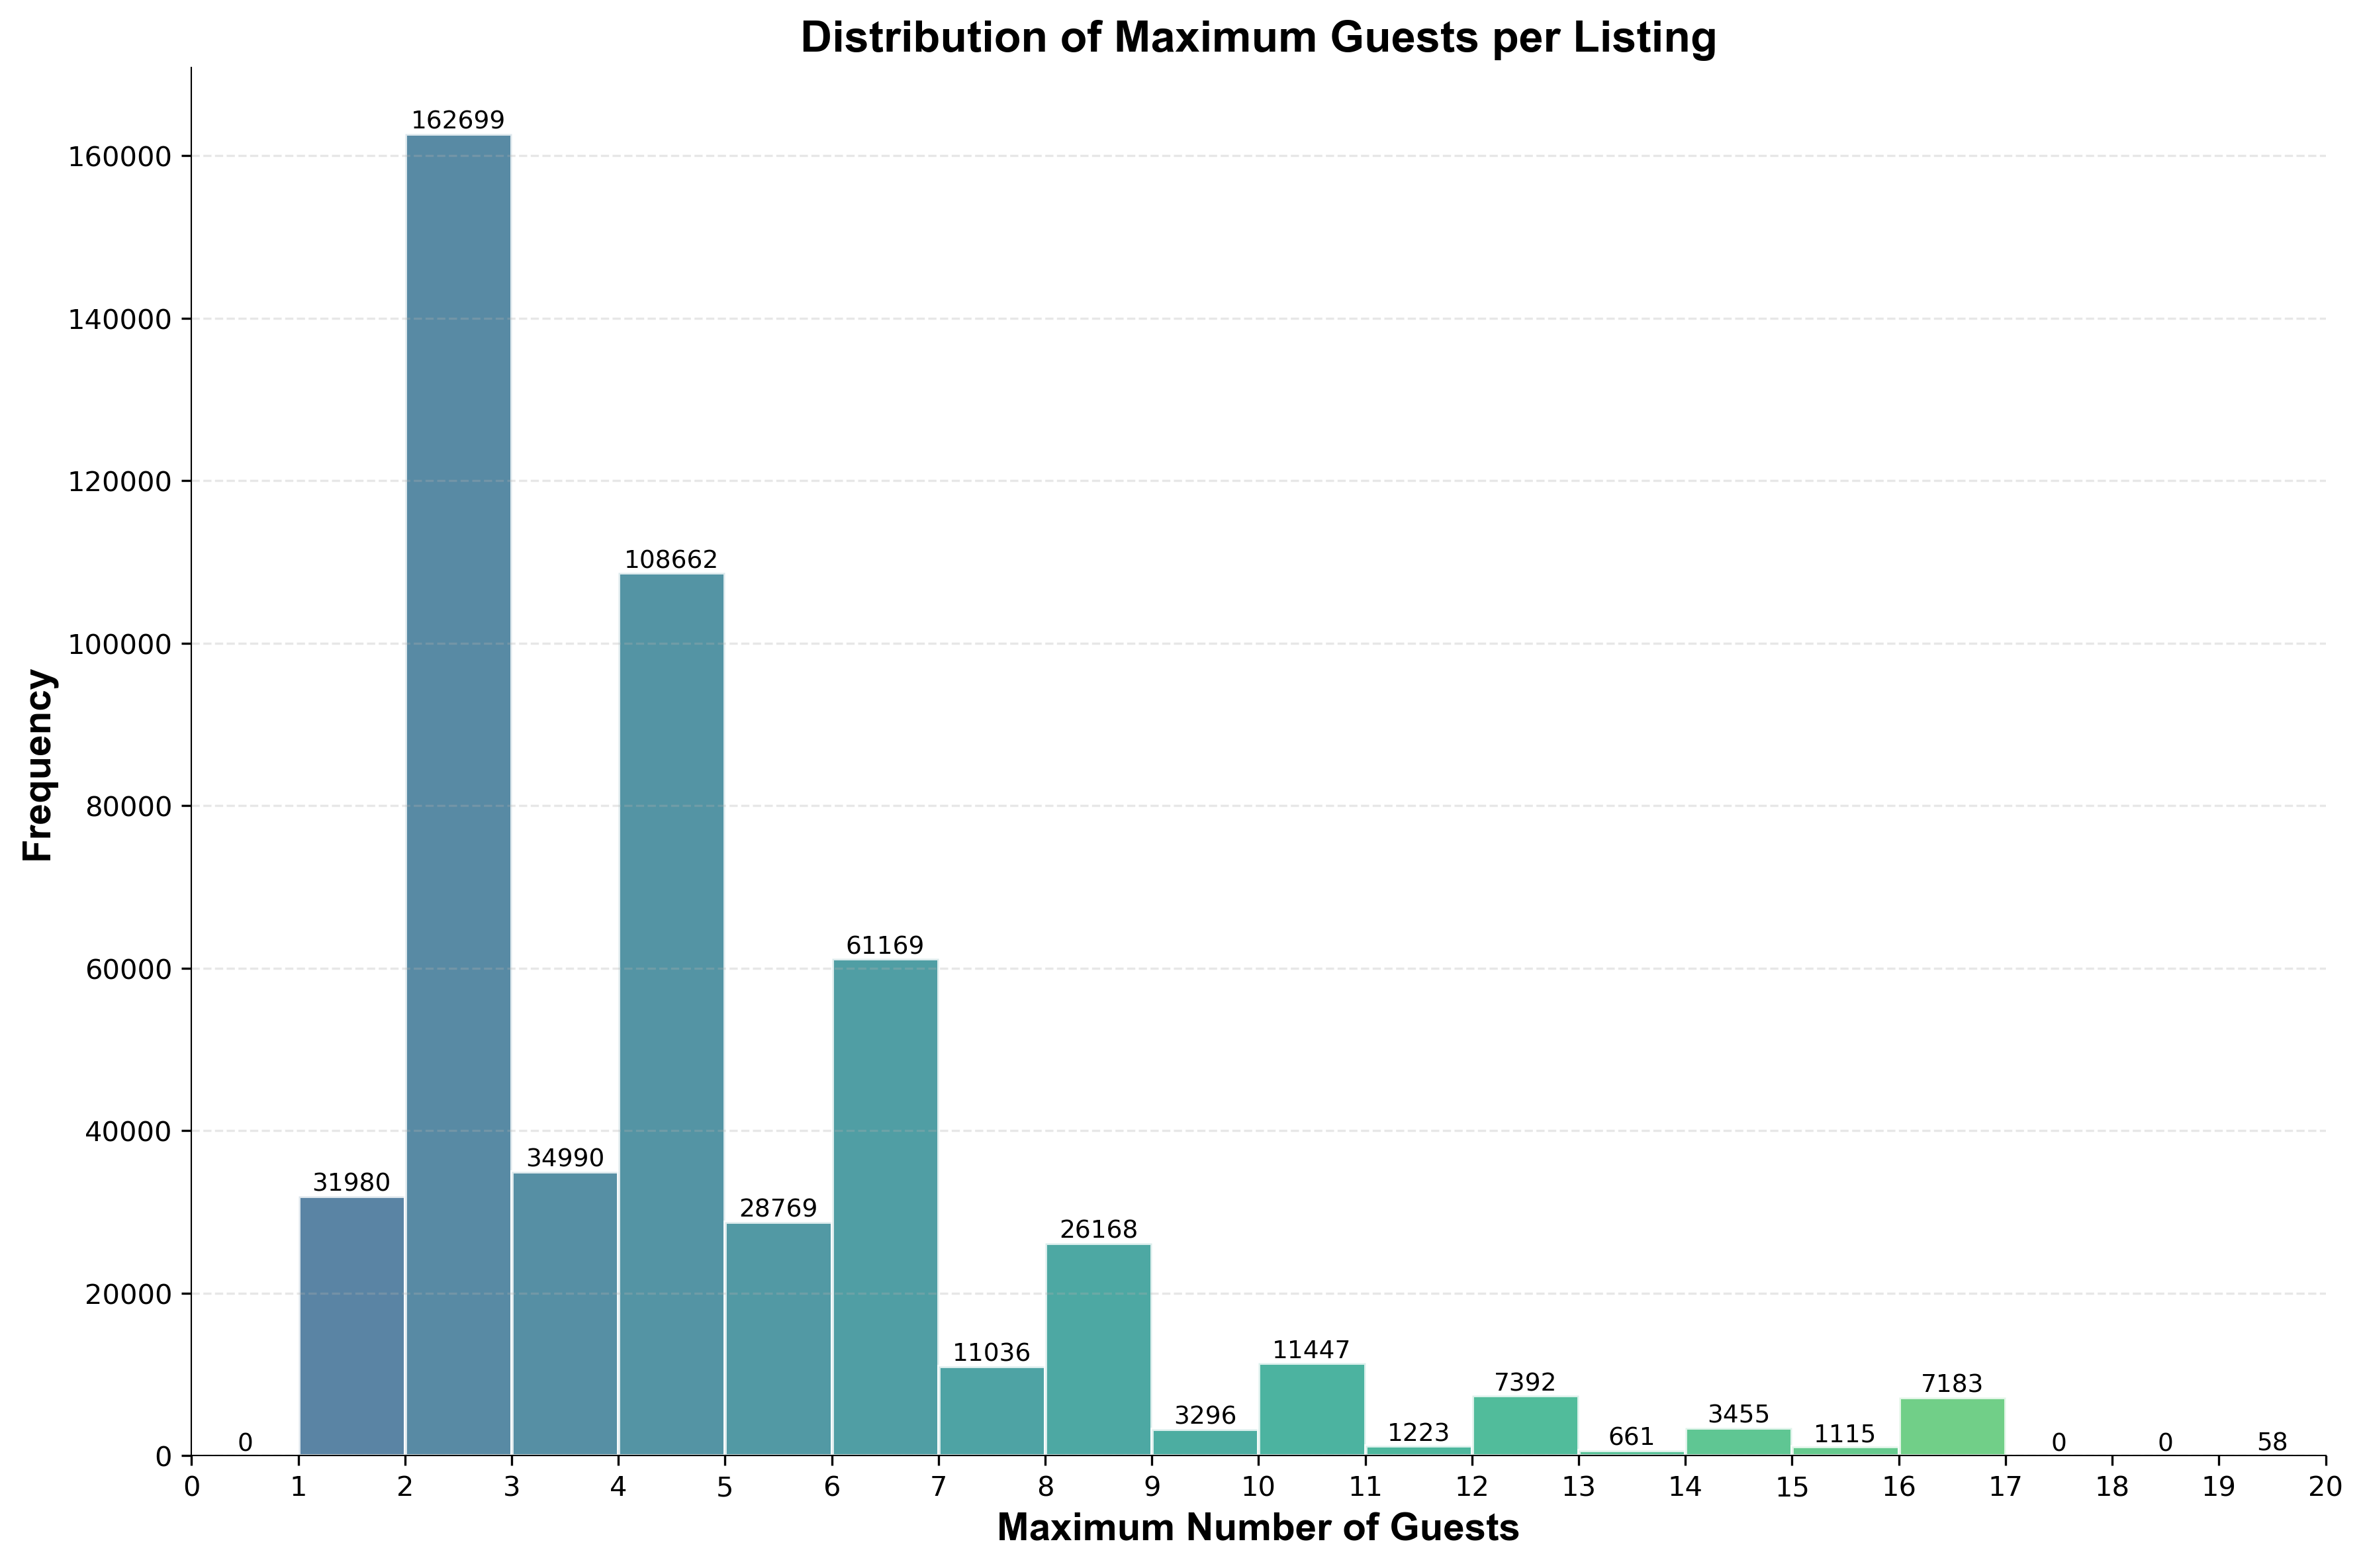

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style and color palette
sns.set_palette("deep")

# Create the figure with a higher resolution
plt.figure(figsize=(12, 8), dpi=300)

# Create the histogram with improved aesthetics
bins = np.arange(0, 21, 1)
n, bins, patches = plt.hist(df_chicago['Max_Guests'].dropna(), bins=bins, edgecolor='white', linewidth=1.2, alpha=0.8)

# Color gradient
colors = plt.cm.viridis(np.linspace(0.3, 0.8, len(patches)))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# Customize the axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Set X-axis limits and labels
plt.xlim(0, 20)
plt.xticks(bins, fontsize=10)

# Set labels and title with professional font settings
plt.xlabel('Maximum Number of Guests', fontsize=14, fontweight='bold', fontname='Arial')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', fontname='Arial')
plt.title('Distribution of Maximum Guests per Listing', fontsize=16, fontweight='bold', fontname='Arial')

# Add a subtle grid
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add value labels on top of each bar
for i, v in enumerate(n):
    plt.text(bins[i] + 0.5, v + 5, str(int(v)), ha='center', va='bottom', fontsize=9)

# Tight layout and save figure
plt.tight_layout()
plt.savefig("max_guests_histogram.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


#### 2. Show the time trend change of the proportion of each sub-section of Max_Guests
##### Sub-divide the whole distribution of Max_Guests:
- Small Groups: 1~2 Single Guests/Couple/Friends: 
- Medium Groups: 3~6 Bunch of friends / couples
- Large Groups: 7~10
- Party Size: >10

/var/folders/qf/_z697sgn3jx3215w7ykp1p1r0000gn/T/ipykernel_52774/4091808096.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using cate

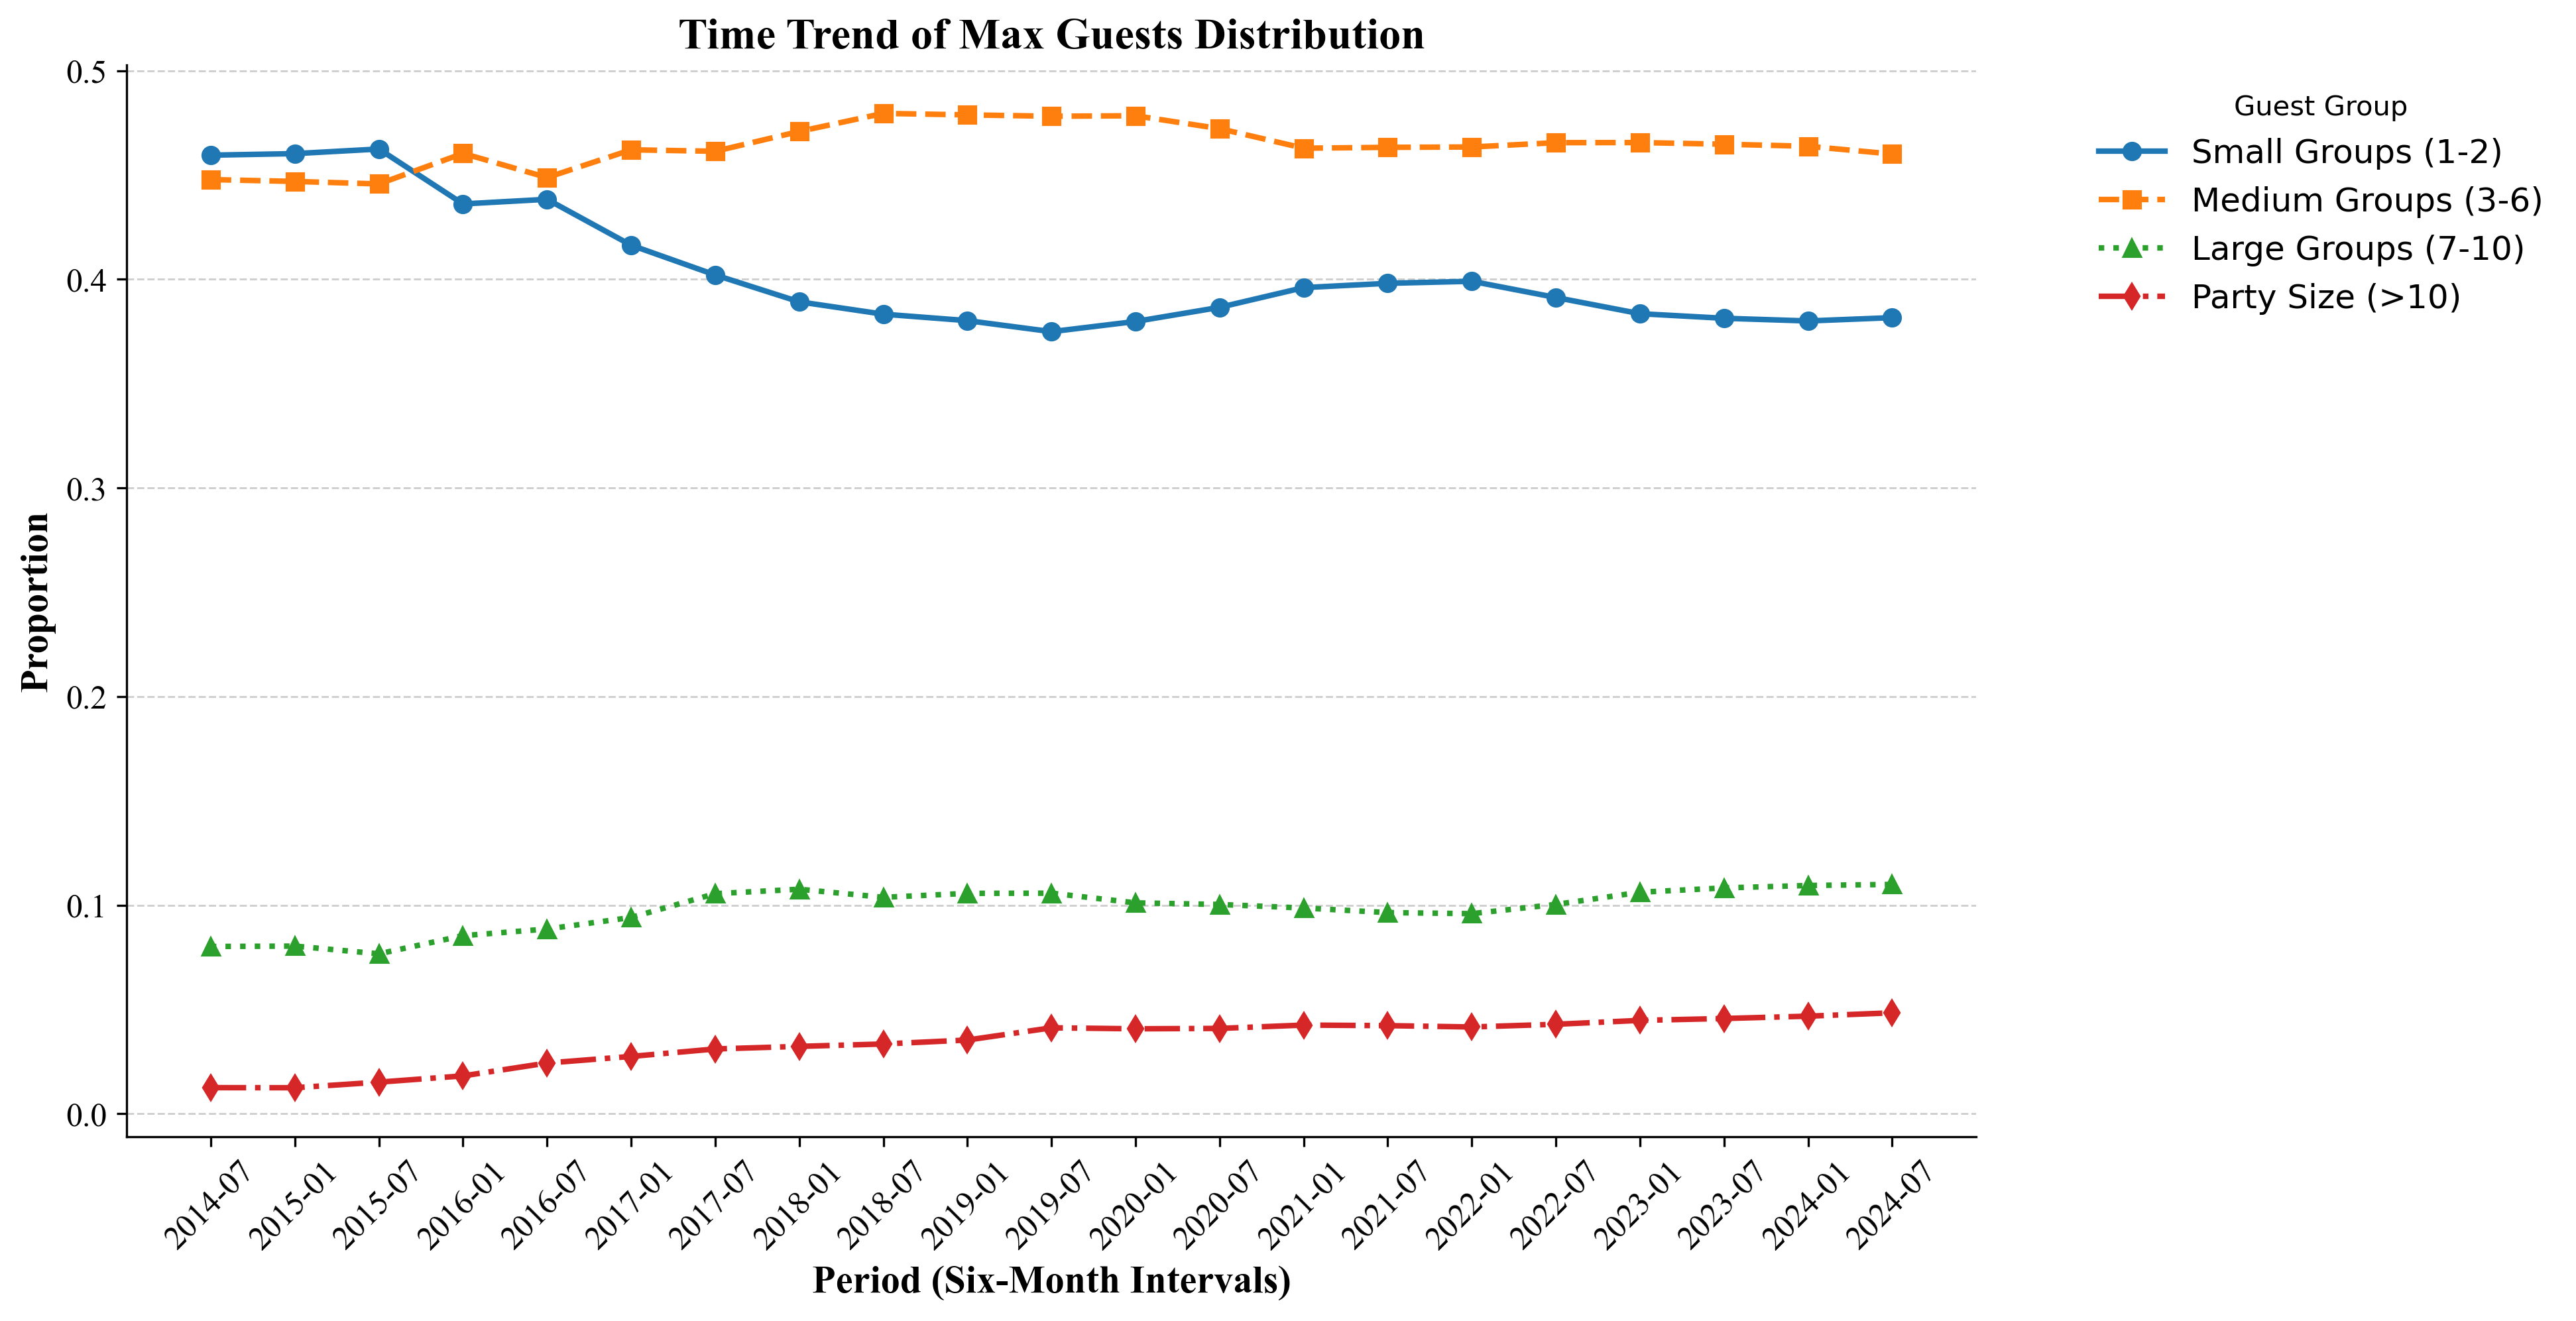

In [20]:
# Categorize 'Max_Guests' into sub-sections
df_chicago['Guest_Group'] = pd.cut(df_chicago['Max_Guests'], 
                           bins=[0, 2, 6, 10, float('inf')], 
                           labels=['Small Groups (1-2)', 'Medium Groups (3-6)', 
                                   'Large Groups (7-10)', 'Party Size (>10)'],
                           right=True)

# Calculate the proportion of each guest group per period
group_counts = df_chicago.groupby(['Period', 'Guest_Group']).size().unstack()
group_proportions = group_counts.div(group_counts.sum(axis=1), axis=0)

# Define distinct colors and line styles for clarity
styles = {
    'Small Groups (1-2)': {'color': '#1f77b4', 'linestyle': '-', 'marker': 'o'},  # Blue
    'Medium Groups (3-6)': {'color': '#ff7f0e', 'linestyle': '--', 'marker': 's'},  # Orange
    'Large Groups (7-10)': {'color': '#2ca02c', 'linestyle': ':', 'marker': '^'},  # Green
    'Party Size (>10)': {'color': '#d62728', 'linestyle': '-.', 'marker': 'd'}  # Red
}

# Create the plot
plt.figure(figsize=(12, 7), dpi=300)  # High resolution for publication

# Plot each category with distinct styles
for category, style in styles.items():
    plt.plot(group_proportions.index, group_proportions[category], 
             label=category, color=style['color'], linestyle=style['linestyle'],
             marker=style['marker'], markersize=6, linewidth=2)

# Formatting for journal-level quality
plt.xlabel('Period (Six-Month Intervals)', fontsize=14, fontweight='bold', fontname='Times New Roman')
plt.ylabel('Proportion', fontsize=14, fontweight='bold', fontname='Times New Roman')
plt.title('Time Trend of Max Guests Distribution', fontsize=16, fontweight='bold', fontname='Times New Roman')

# Improve grid and tick readability
plt.xticks(rotation=45, fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Move legend outside the plot
plt.legend(title='Guest Group', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, frameon=False)

# Remove unnecessary spines (top and right)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save figure in high-quality format for journal submission
plt.savefig("max_guests_time_trend.png", bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

## PCA Analysis & Cluster Analysis
##### Take dataset "AirDNA1.csv", read it as "df_ PCA_Cluster". After transforming the new variables, save the new file as "PCA_Cluster_Analysis.csv".
##### Step 1: As Overall_Rating has high colinearity with all the other sub-ratings, drop it in the following analysis. Divide each sub_rating (6 in total: Airbnb_Accuracy_rating, Airbnb_Checkin_rating, Airbnb_Cleaniness_rating, Airbnb_Communication_rating, Airbnb_Location_rating, Airbnb_Value_rating) by the full mark of sub-rating, which is 10. Rename the 6 sub-rating variables to normalized_.... 

In [21]:
# Axuiliary functions
def replace_space_parentheses(df):
    df.columns = df.columns.str.replace(" ", "_")
    df.columns = df.columns.str.replace("(", "")
    df.columns = df.columns.str.replace(")", "")
    return df

airdna1_df = pd.read_csv(os.path.join(DATA, "AirDNA1.csv"))
airdna1_df = replace_space_parentheses(airdna1_df)

In [22]:
print(airdna1_df.columns)
# Are the Property_IDs unique? How many of them are replicated in the data?
print(airdna1_df["Property_ID"].nunique(), airdna1_df["Property_ID"].count())
print(airdna1_df["Airbnb_Property_ID"].nunique(), airdna1_df["Airbnb_Property_ID"].count())
print(airdna1_df.describe())
airdna1_df.head()

Index(['Property_ID', 'Airbnb_Property_ID', 'Airbnb_HOST_ID', 'VRBO_Property_ID', 'VRBO_Host_ID', 'Listing_Title', 'Property_Type', 'Real_Estate_Property_Type', 'Listing_Type', 'Property_Manager', 'Host_Type', 'Country', 'State', 'City', 'Zipcode', 'Neighborhood', 'Metropolitan_Statistical_Area', 'AirDNA_Market', 'AirDNA_Submarket', 'Latitude', 'Longitude', 'Exact_Location', 'Location_Type', 'Price_Tier', 'Bedrooms', 'Bathrooms', 'Max_Guests', 'Cancellation_Policy', 'Minimum_Stay', 'Created_Date', 'Last_Scraped_Date', 'Last_Calendar_Update', 'Response_Rate', 'Response_Time', 'Currency_USD', 'ADR_USD', 'Revenue_LTM_USD', 'Revenue_Potential_LTM_USD', 'Occupancy_Rate_LTM', 'Number_of_Bookings_LTM', 'Number_of_Reviews', 'Security_Deposit_USD', 'Cleaning_Fee_USD', 'Extra_People_Fee', 'Published_Nightly_Rate_USD', 'Published_Monthly_Rate_USD', 'Published_Weekly_Rate_USD', 'Count_Reservation_Days_LTM', 'Count_Available_Days_LTM', 'Count_Blocked_Days_LTM', 'Number_of_Photos', 'Instantbook',
  

Property_ID  Airbnb_Property_ID  Airbnb_HOST_ID VRBO_Property_ID VRBO_Host_ID                               Listing_Title       Property_Type Real_Estate_Property_Type     Listing_Type                   Property_Manager   Host_Type        Country     State      City  Zipcode Neighborhood                  Metropolitan_Statistical_Area AirDNA_Market  AirDNA_Submarket   Latitude  Longitude Exact_Location          Location_Type Price_Tier  Bedrooms  Bathrooms  Max_Guests Cancellation_Policy  Minimum_Stay Created_Date           Last_Scraped_Date        Last_Calendar_Update  Response_Rate  Response_Time Currency_USD  ADR_USD  Revenue_LTM_USD  Revenue_Potential_LTM_USD  Occupancy_Rate_LTM  Number_of_Bookings_LTM  Number_of_Reviews  Security_Deposit_USD  Cleaning_Fee_USD  Extra_People_Fee  Published_Nightly_Rate_USD  Published_Monthly_Rate_USD  Published_Weekly_Rate_USD  Count_Reservation_Days_LTM  Count_Available_Days_LTM  Count_Blocked_Days_LTM  Number_of_Photos  \
0             abnb_45439051        4.543905e+07     367546574.0              NaN          NaN             Chain O''Lakes Lakeside Getaway               House               House/villa  Entire home/apt                                NaN      1 Unit  United States  Illinois   Antioch  60002.0          NaN  Chicago-Naperville-Elgin, IL-IN-WI Metro Area       Chicago               NaN  42.464590 -88.126510            NaN       Small City/Rural    economy       4.0        2.0         6.0            moderate          30.0   2020-10-18         2021-03-09 03:01:23         2021-03-09 03:01:23           50.0            NaN          usd      NaN              NaN                        NaN                 NaN                     NaN                NaN                   NaN             150.0               NaN                         NaN                         NaN                        NaN                         NaN                       NaN                     NaN              19.0   
1             abnb_48569951        4.856995e+07     342643084.0              NaN          NaN  Homey place just for you | 1BR in Evanston  Serviced apartment            Apt/Condo/Loft  Entire home/apt  Preferred Corporate Housing (PCH)   21+ Units  United States  Illinois  Evanston  60201.0          NaN  Chicago-Naperville-Elgin, IL-IN-WI Metro Area       Chicago               NaN  42.051100 -87.686300            NaN  Large City - Suburban        NaN       1.0        1.0         3.0              strict          30.0   2021-03-19         2021-03-18 23:57:37         2021-03-18 23:57:37           93.0            NaN          usd      NaN              NaN                        NaN                 NaN                     NaN                NaN                   NaN               0.0               NaN                         NaN                         NaN                        NaN                         NaN                       NaN                     NaN              20.0   
2              abnb_8267501        8.267501e+06       1779158.0              NaN          NaN            Private room next to subway stop           Apartment            Apt/Condo/Loft     Private room                                NaN  6-20 Units  United States  Illinois   Chicago  60625.0  Albany Park  Chicago-Naperville-Elgin, IL-IN-WI Metro Area       Chicago               NaN  41.966788 -87.704486            NaN     Large City - Urban    upscale       1.0        1.0         2.0              strict           1.0   2015-09-06  2016-05-25 23:26:08.323000  2016-05-25 23:26:08.323000          100.0         4414.0          usd      NaN              NaN                        NaN                 NaN                     NaN                1.0                   NaN              10.0              15.0                        68.0                      1280.0                      428.0                         NaN                       NaN                     NaN              19.0   
3             abnb_13209354        1.320935e+07      719

                Property_ID  Airbnb_Property_ID  Airbnb_HOST_ID VRBO_Property_ID VRBO_Host_ID                               Listing_Title       Property_Type Real_Estate_Property_Type     Listing_Type                   Property_Manager   Host_Type        Country     State      City  Zipcode Neighborhood                  Metropolitan_Statistical_Area AirDNA_Market  AirDNA_Submarket   Latitude  Longitude Exact_Location          Location_Type Price_Tier  Bedrooms  Bathrooms  Max_Guests Cancellation_Policy  Minimum_Stay Created_Date           Last_Scraped_Date        Last_Calendar_Update  Response_Rate  Response_Time Currency_USD  ADR_USD  Revenue_LTM_USD  Revenue_Potential_LTM_USD  Occupancy_Rate_LTM  Number_of_Bookings_LTM  Number_of_Reviews  Security_Deposit_USD  Cleaning_Fee_USD  Extra_People_Fee  Published_Nightly_Rate_USD  Published_Monthly_Rate_USD  Published_Weekly_Rate_USD  Count_Reservation_Days_LTM  Count_Available_Days_LTM  Count_Blocked_Days_LTM  Number_of_Photos  \
0         

(array([4.2200e+02, 0.0000e+00, 2.0000e+01, 0.0000e+00, 0.0000e+00,
        2.1800e+02, 0.0000e+00, 1.0600e+02, 0.0000e+00, 6.3200e+02,
        0.0000e+00, 0.0000e+00, 7.3400e+02, 0.0000e+00, 0.0000e+00,
        3.1280e+03, 0.0000e+00, 1.1896e+04, 0.0000e+00, 4.2924e+04]),
 array([0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 , 0.44, 0.48, 0.52, 0.56, 0.6 ,
        0.64, 0.68, 0.72, 0.76, 0.8 , 0.84, 0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 20 artists>)

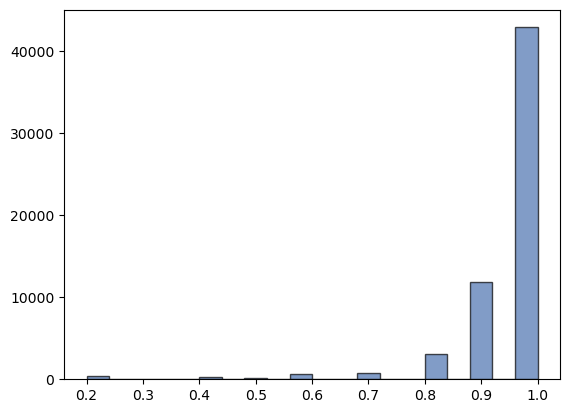

In [23]:
# Drop 'Overall_Rating' due to high collinearity
df_PCA_Cluster = airdna1_df.drop(columns=['Overall_Rating'], errors='ignore')

# Normalize the 6 sub-rating variables by dividing each by full score
sub_rating_cols = [
    'Airbnb_Accuracy_Rating', 'Airbnb_Checkin_Rating', 'Airbnb_Cleanliness_Rating', 
    'Airbnb_Communication_Rating', 'Airbnb_Location_Rating', 'Airbnb_Value_Rating'
]

# Create new normalized columns
for col in sub_rating_cols:
    df_PCA_Cluster[f'normalized_{col.lower()}'] = df_PCA_Cluster[col] / 10  # Assuming full score is 10. Normalized to 0 - 1

# Drop the original sub-rating columns
df_PCA_Cluster = df_PCA_Cluster.drop(columns=sub_rating_cols, errors='ignore')

print(df_PCA_Cluster.head())
plt.hist(df_PCA_Cluster['normalized_airbnb_accuracy_rating'].dropna(), bins=20, edgecolor='black', alpha=0.7)

##### Step 2: Pick out all the physical features and keep them. Also keep "Property_ID", "Airbnb_Property_ID" and the 6 normalized sub-ratings we just dealt with. Perform one-hot coding for variables have more than 2 values (True/False):
- Physical features include: 'Property_Type', 'Listing_Type', 'Property_Manager', 'Host_Type', 'Neighborhood',
       'Metropolitan_Statistical_Area', 'AirDNA_Market', 'AirDNA_Submarket', 'Location_Type', 'Price_Tier',
       'Cancellation_Policy', 'Instantbook', 'Airbnb_Superhost', 'License', 'Has_Pool',
       'Has_Hot_Tub', 'Has_Air_Con', 'Has_Gym', 'Pets_Allowed', 'Has_Kitchen','Has_Parking', 'Amenities'

In [24]:
# generate discrete values for bathroom and bedroom counts: 1, 2, 3 or more
df_PCA_Cluster['num_bathroom_1'] = np.where(df_PCA_Cluster['Bathrooms'] == 1, 1, 0)
df_PCA_Cluster['num_bathroom_2'] = np.where(df_PCA_Cluster['Bathrooms'] == 2, 1, 0)
df_PCA_Cluster['num_bathroom_3more'] = np.where(df_PCA_Cluster['Bathrooms'] >= 3, 1, 0)

df_PCA_Cluster['num_bedroom_1'] = np.where(df_PCA_Cluster['Bedrooms'] == 1, 1, 0)
df_PCA_Cluster['num_bedroom_2'] = np.where(df_PCA_Cluster['Bedrooms'] == 2, 1, 0)
df_PCA_Cluster['num_bedroom_3more'] = np.where(df_PCA_Cluster['Bedrooms'] >= 3, 1, 0)

In [25]:
# Keep only the specified columns
# Remove property type due to high dimensionality. Drop 'Listing_Type' due to colinearity with potential PCA factors. 'Price_Tier' is dropped due to endogeneity


physical_features = ['Has_Gym', 'Has_Kitchen', 'Has_Parking',
                     "num_bathroom_1", "num_bathroom_2", "num_bathroom_3more",
                     "num_bedroom_1", "num_bedroom_2", "num_bedroom_3more",
]
sub_review_norm_cols = ['normalized_'+col.lower() for col in sub_rating_cols]

# print(df_PCA_Cluster['Listing_Type'].unique())
print("="*10)
# print(df_PCA_Cluster['Property_Type'].unique())
print("="*10)
# print(df_PCA_Cluster['Price_Tier'].unique())
         

# Keep only the selected columns
columns_to_keep = ['Property_ID', 'Airbnb_Property_ID'] + physical_features + sub_review_norm_cols
df_PCA_Cluster = df_PCA_Cluster[columns_to_keep]
# Print a summary of all the columns. I want to know if there are negative values
print(df_PCA_Cluster[physical_features].min())
print(df_PCA_Cluster[sub_review_norm_cols].min())
# print(df_PCA_Cluster['Bedrooms'].value_counts())
# print(df_PCA_Cluster.head())


Has_Gym               False
Has_Kitchen           False
Has_Parking           False
num_bathroom_1            0
num_bathroom_2            0
num_bathroom_3more        0
num_bedroom_1             0
num_bedroom_2             0
num_bedroom_3more         0
dtype: object
normalized_airbnb_accuracy_rating         0.2
normalized_airbnb_checkin_rating          0.2
normalized_airbnb_cleanliness_rating      0.2
normalized_airbnb_communication_rating    0.2
normalized_airbnb_location_rating         0.2
normalized_airbnb_value_rating            0.2
dtype: float64


In [26]:
# One-hot encode the specified categorical variables. Dont do it for mow due to endougenity

# Convert all True/False values to 1/0
df_PCA_Cluster = df_PCA_Cluster.replace({True: 1, False: 0})

df_PCA_Cluster = df_PCA_Cluster.dropna()

# Save the transformed dataset
output_path = "PCA_Cluster_Analysis.csv"
df_PCA_Cluster.to_csv(os.path.join(DATA, "PCA_Cluster_Analysis.csv"), index=False)

print(f"Transformed dataset saved as '{output_path}'.")

print(df_PCA_Cluster.columns)
df_PCA_Cluster.head()


/var/folders/qf/_z697sgn3jx3215w7ykp1p1r0000gn/T/ipykernel_52774/1165007901.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Transformed dataset saved as 'PCA_Cluster_Analysis.csv'.
Index(['Property_ID', 'Airbnb_Property_ID', 'Has_Gym', 'Has_Kitchen', 'Has_Parking', 'num_bathroom_1', 'num_bathroom_2', 'num_bathroom_3more', 'num_bedroom_1', 'num_bedroom_2', 'num_bedroom_3more', 'normalized_airbnb_accuracy_rating', 'normalized_airbnb_checkin_rating', 'normalized_airbnb_cleanliness_rating', 'normalized_airbnb_communication_rating', 'normalized_airbnb_location_rating', 'normalized_airbnb_value_rating'], dtype='object')


Property_ID  Airbnb_Property_ID  Has_Gym  Has_Kitchen  Has_Parking  num_bathroom_1  num_bathroom_2  num_bathroom_3more  num_bedroom_1  num_bedroom_2  num_bedroom_3more  normalized_airbnb_accuracy_rating  normalized_airbnb_checkin_rating  normalized_airbnb_cleanliness_rating  normalized_airbnb_communication_rating  normalized_airbnb_location_rating  normalized_airbnb_value_rating
2              abnb_8267501        8.267501e+06        0            1            0               1               0                   0              1              0                  0                                1.0                               1.0                                   1.0                                     1.0                                1.0                             1.0
3             abnb_13209354        1.320935e+07        0            1            0               1               0                   0              0              0                  0                                1.0                               1.0                                   1.0                                     1.0                                1.0                             1.0
5             abnb_33997115        3.399712e+07        1            0            0               1               0                   0              1              0                  0                                1.0                               0.9                                   1.0                                     1.0                                1.0                             1.0
6             abnb_16812254        1.681225e+07        0            1            0               1               0                   0              1              0                  0                                1.0                               1.0                                   1.0                                     0.8                                1.0                             1.0
7  abnb_1073683980955227245        1.073684e+18        0            1            0               1               0                   0              0              1                  0                                0.9                               0.9                                   0.9                                     1.0                                0.9                             0.9

#### Step 3: PCA analysis

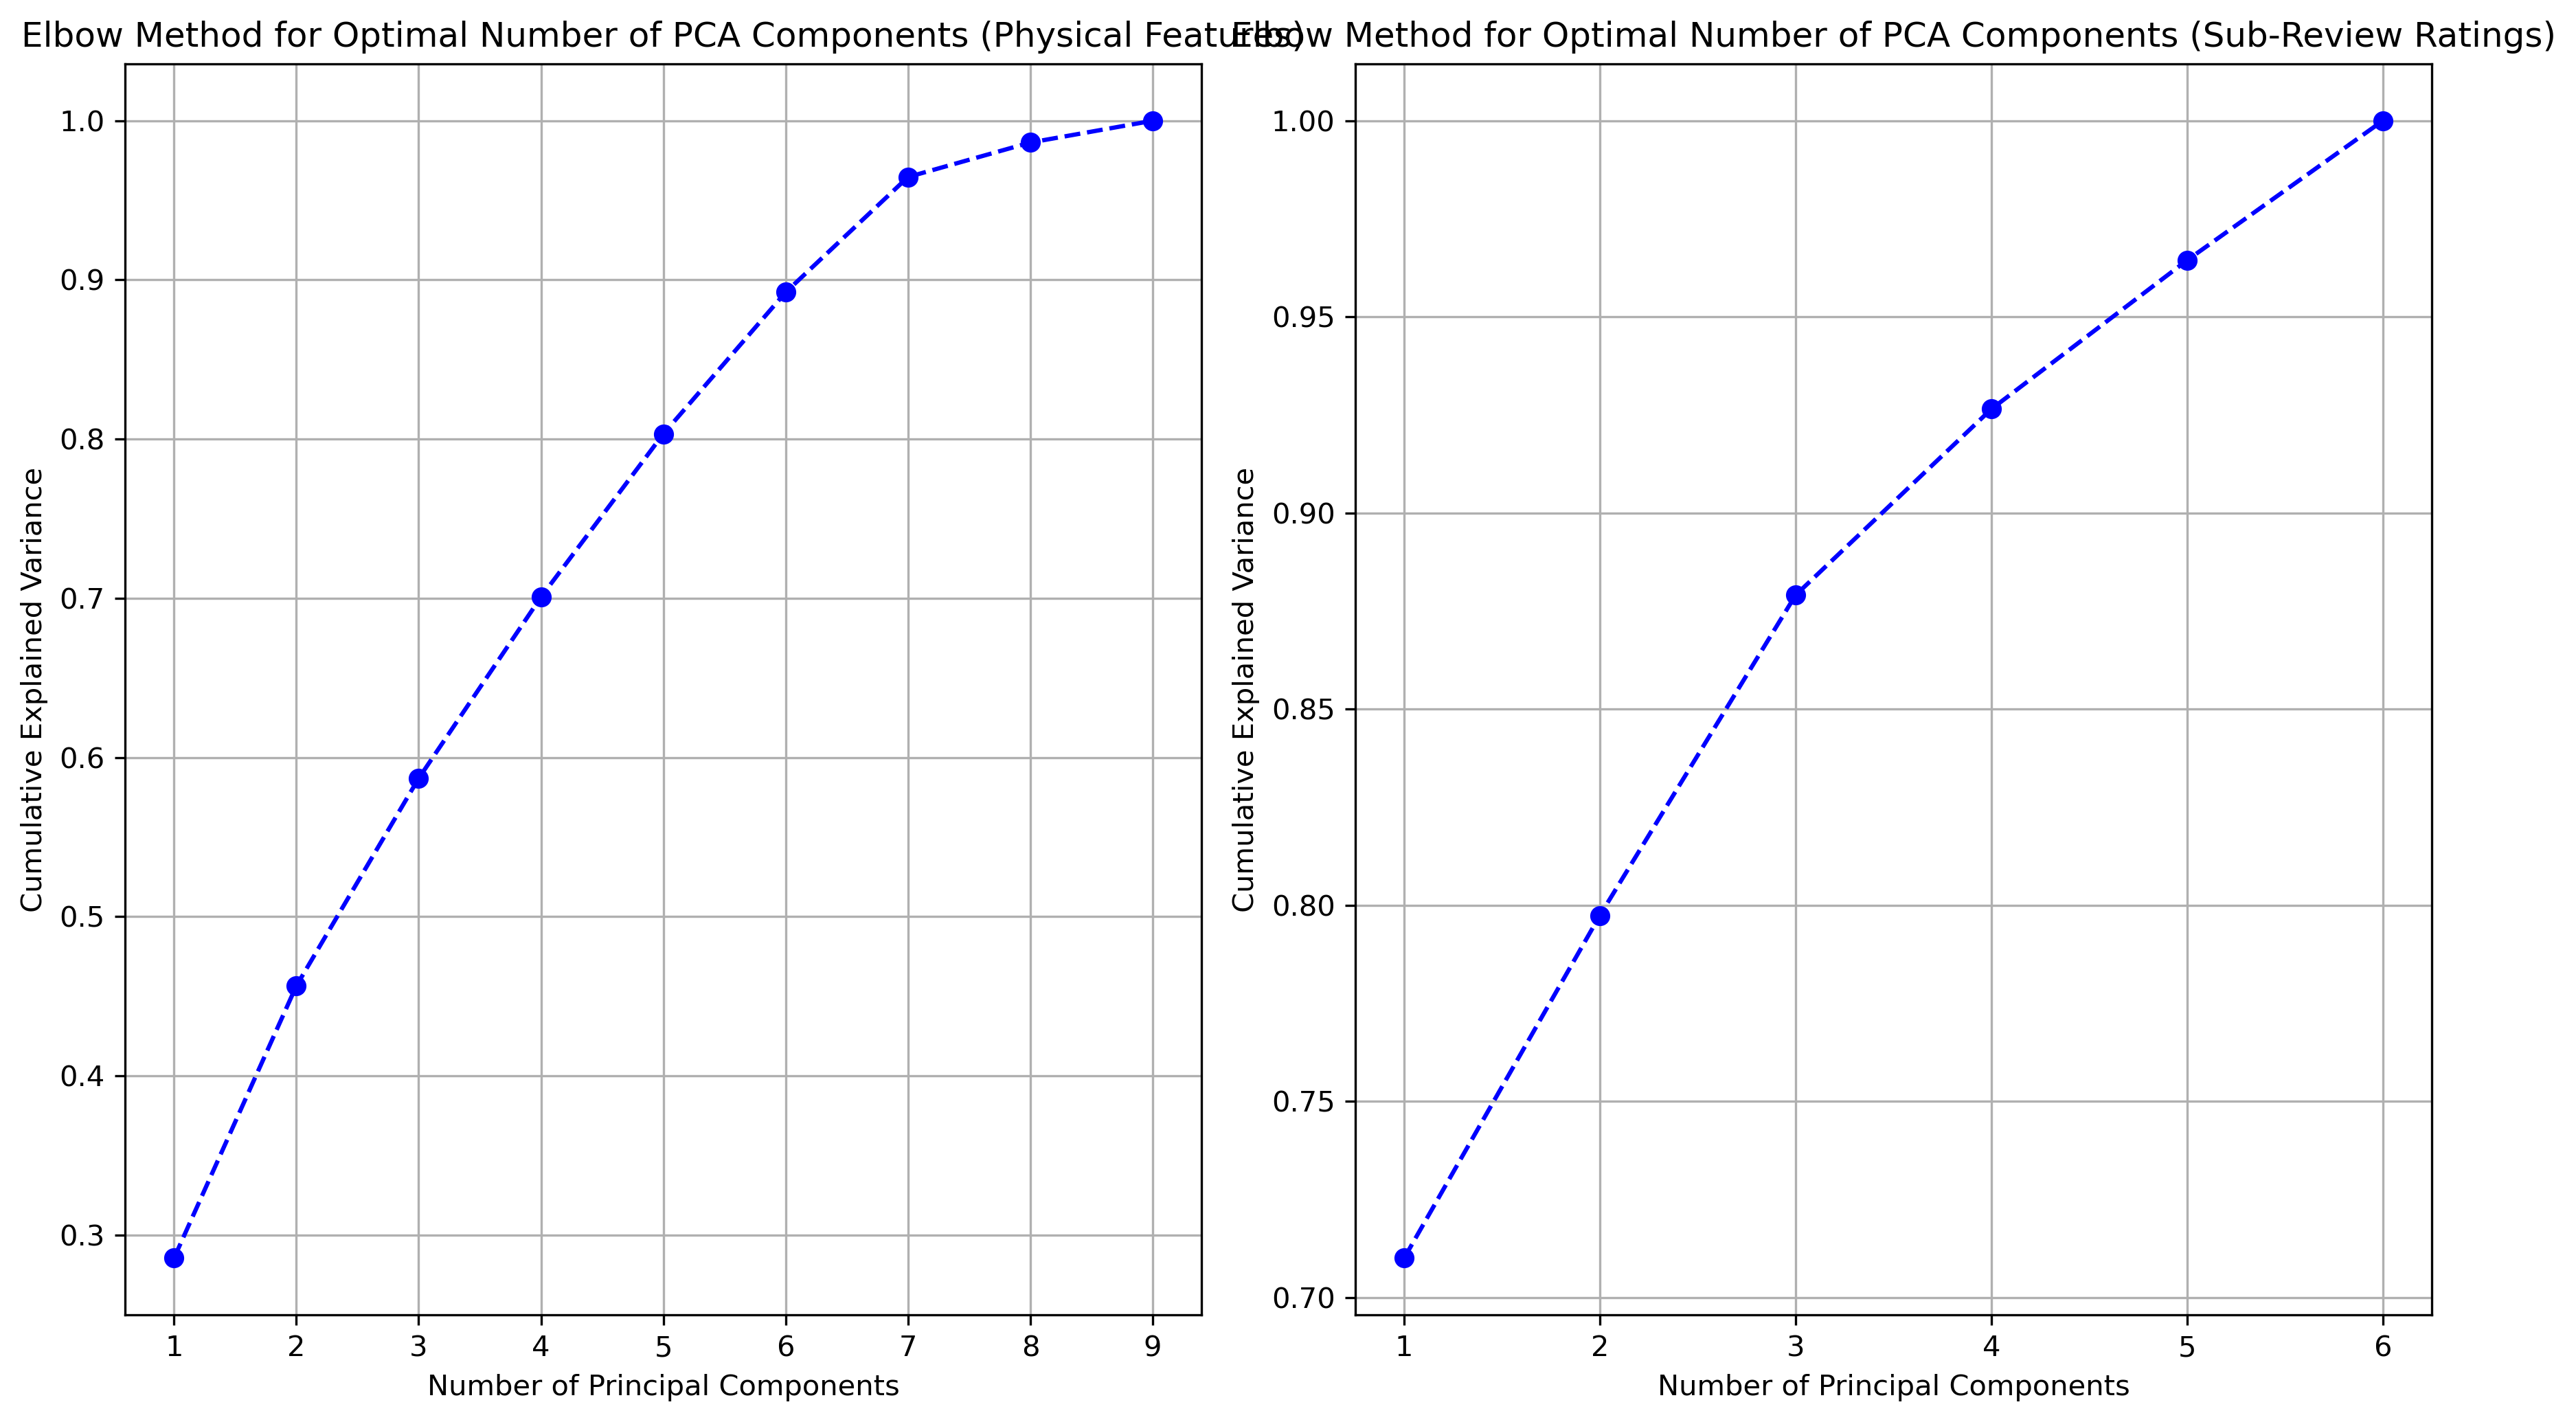

In [27]:
# Elbow method to decide the number of factors for PCA Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Two groups of PCA data: physical features and sub-rating variables
pca_physical_df = df_PCA_Cluster[physical_features].dropna() # we drop the nan for simplicity
pca_sub_review_df = df_PCA_Cluster[sub_review_norm_cols].dropna()

# # Standardize the numerical data for PCA
scaler = StandardScaler()
# scaled_data = scaler.fit_transform(pca_data)
scaled_physical_data = scaler.fit_transform(pca_physical_df)
scaled_sub_review_data = scaler.fit_transform(pca_sub_review_df)

pca_physical, pca_sub_review = PCA(), PCA()

pca_physical.fit(scaled_physical_data)
pca_sub_review.fit(scaled_sub_review_data)

explained_variance_physical = np.cumsum(pca_physical.explained_variance_ratio_)
explained_variance_sub_review = np.cumsum(pca_sub_review.explained_variance_ratio_)

# plot separately for two criterias
plt.figure(figsize=(12, 7), dpi=300)  # High resolution for publication
# Plot the Elbow Method for Physical Features (Explained Variance vs. Number of Components)
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_physical) + 1), explained_variance_physical, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for Optimal Number of PCA Components (Physical Features)')
plt.grid(True)
# Plot the Elbow Method for Sub-Review Ratings (Explained Variance vs. Number of Components)
plt.subplot(1, 2, 2)
plt.plot(range(1, len(explained_variance_sub_review) + 1), explained_variance_sub_review, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for Optimal Number of PCA Components (Sub-Review Ratings)')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlap
# Save figure in high-quality format for journal submission
plt.savefig("pca_elbow_method.png", bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

In [28]:
# Obtain the factors from two PCA. Keep the first 5 factors for physical features and 3 for sub-review ratings. Print them as an interpretable table
pca_physical = PCA(n_components=4)
pca_sub_review = PCA(n_components=3)
pca_physical.fit(scaled_physical_data)
pca_sub_review.fit(scaled_sub_review_data)
# Get the PCA components
pca_physical_components = pca_physical.components_
pca_sub_review_components = pca_sub_review.components_
# Get the PCA loadings
pca_physical_loadings = pca_physical.components_.T * np.sqrt(pca_physical.explained_variance_)
pca_sub_review_loadings = pca_sub_review.components_.T * np.sqrt(pca_sub_review.explained_variance_)

factor_strings = []
for i in range(pca_physical_loadings.shape[1]):
    factor_strings.append(f"Factor {i+1} (Physical Features): " + ", ".join([f"{col}: {pca_physical_loadings[j, i]:.2f}" for j, col in enumerate(pca_physical_df.columns)]))
for i in range(pca_sub_review_loadings.shape[1]):
    factor_strings.append(f"Factor {i+1} (Sub-Review Ratings): " + ", ".join([f"{col}: {pca_sub_review_loadings[j, i]:.2f}" for j, col in enumerate(pca_sub_review_df.columns)]))
# Print the factor loadings
print("PCA Factor Loadings:")
for factor_string in factor_strings:
    print(factor_string)
# Save the factor loadings to a CSV file

PCA Factor Loadings:
Factor 1 (Physical Features): Has_Gym: 0.07, Has_Kitchen: -0.23, Has_Parking: -0.33, num_bathroom_1: 0.84, num_bathroom_2: -0.64, num_bathroom_3more: -0.41, num_bedroom_1: 0.74, num_bedroom_2: -0.28, num_bedroom_3more: -0.71
Factor 2 (Physical Features): Has_Gym: 0.19, Has_Kitchen: 0.13, Has_Parking: -0.21, num_bathroom_1: 0.04, num_bathroom_2: 0.35, num_bathroom_3more: -0.56, num_bedroom_1: -0.31, num_bedroom_2: 0.81, num_bedroom_3more: -0.51
Factor 3 (Physical Features): Has_Gym: 0.72, Has_Kitchen: 0.09, Has_Parking: -0.55, num_bathroom_1: -0.25, num_bathroom_2: 0.33, num_bathroom_3more: 0.04, num_bedroom_1: 0.23, num_bedroom_2: -0.32, num_bedroom_3more: 0.05
Factor 4 (Physical Features): Has_Gym: 0.23, Has_Kitchen: 0.61, Has_Parking: -0.19, num_bathroom_1: 0.24, num_bathroom_2: -0.48, num_bathroom_3more: 0.40, num_bedroom_1: -0.27, num_bedroom_2: 0.19, num_bedroom_3more: 0.04
Factor 1 (Sub-Review Ratings): normalized_airbnb_accuracy_rating: 0.90, normalized_airb

In [29]:
# Create two new columns: 'PCA_Physical_Factors' and 'PCA_Sub_Review_Factors'
df_PCA_Cluster['PCA_Physical_Factors_1'], df_PCA_Cluster['PCA_Physical_Factors_2'], df_PCA_Cluster['PCA_Physical_Factors_3'], df_PCA_Cluster['PCA_Physical_Factors_4'] = pca_physical.transform(scaled_physical_data).T
df_PCA_Cluster['PCA_Sub_Review_Factors_1'], df_PCA_Cluster['PCA_Sub_Review_Factors_2'], df_PCA_Cluster['PCA_Sub_Review_Factors_3'] = pca_sub_review.transform(scaled_sub_review_data).T
print(df_PCA_Cluster[['PCA_Physical_Factors_1', 'PCA_Physical_Factors_2',
       'PCA_Physical_Factors_3', 'PCA_Physical_Factors_4']].head())
print(df_PCA_Cluster.columns)

   PCA_Physical_Factors_1  PCA_Physical_Factors_2  PCA_Physical_Factors_3  PCA_Physical_Factors_4
2                1.521003               -0.258741                0.355226                0.169306
3                0.599319                0.233178               -0.073978                0.699795
5                2.180166               -0.212157                1.922443               -1.400647
6                1.521003               -0.258741                0.355226                0.169306
7                0.189996                1.778793               -0.780125                1.149140
Index(['Property_ID', 'Airbnb_Property_ID', 'Has_Gym', 'Has_Kitchen', 'Has_Parking', 'num_bathroom_1', 'num_bathroom_2', 'num_bathroom_3more', 'num_bedroom_1', 'num_bedroom_2', 'num_bedroom_3more', 'normalized_airbnb_accuracy_rating', 'normalized_airbnb_checkin_rating', 'normalized_airbnb_cleanliness_rating', 'normalized_airbnb_communication_rating', 'normalized_airbnb_location_rating', 'normalized_airbnb_val

### Cluster Analysis

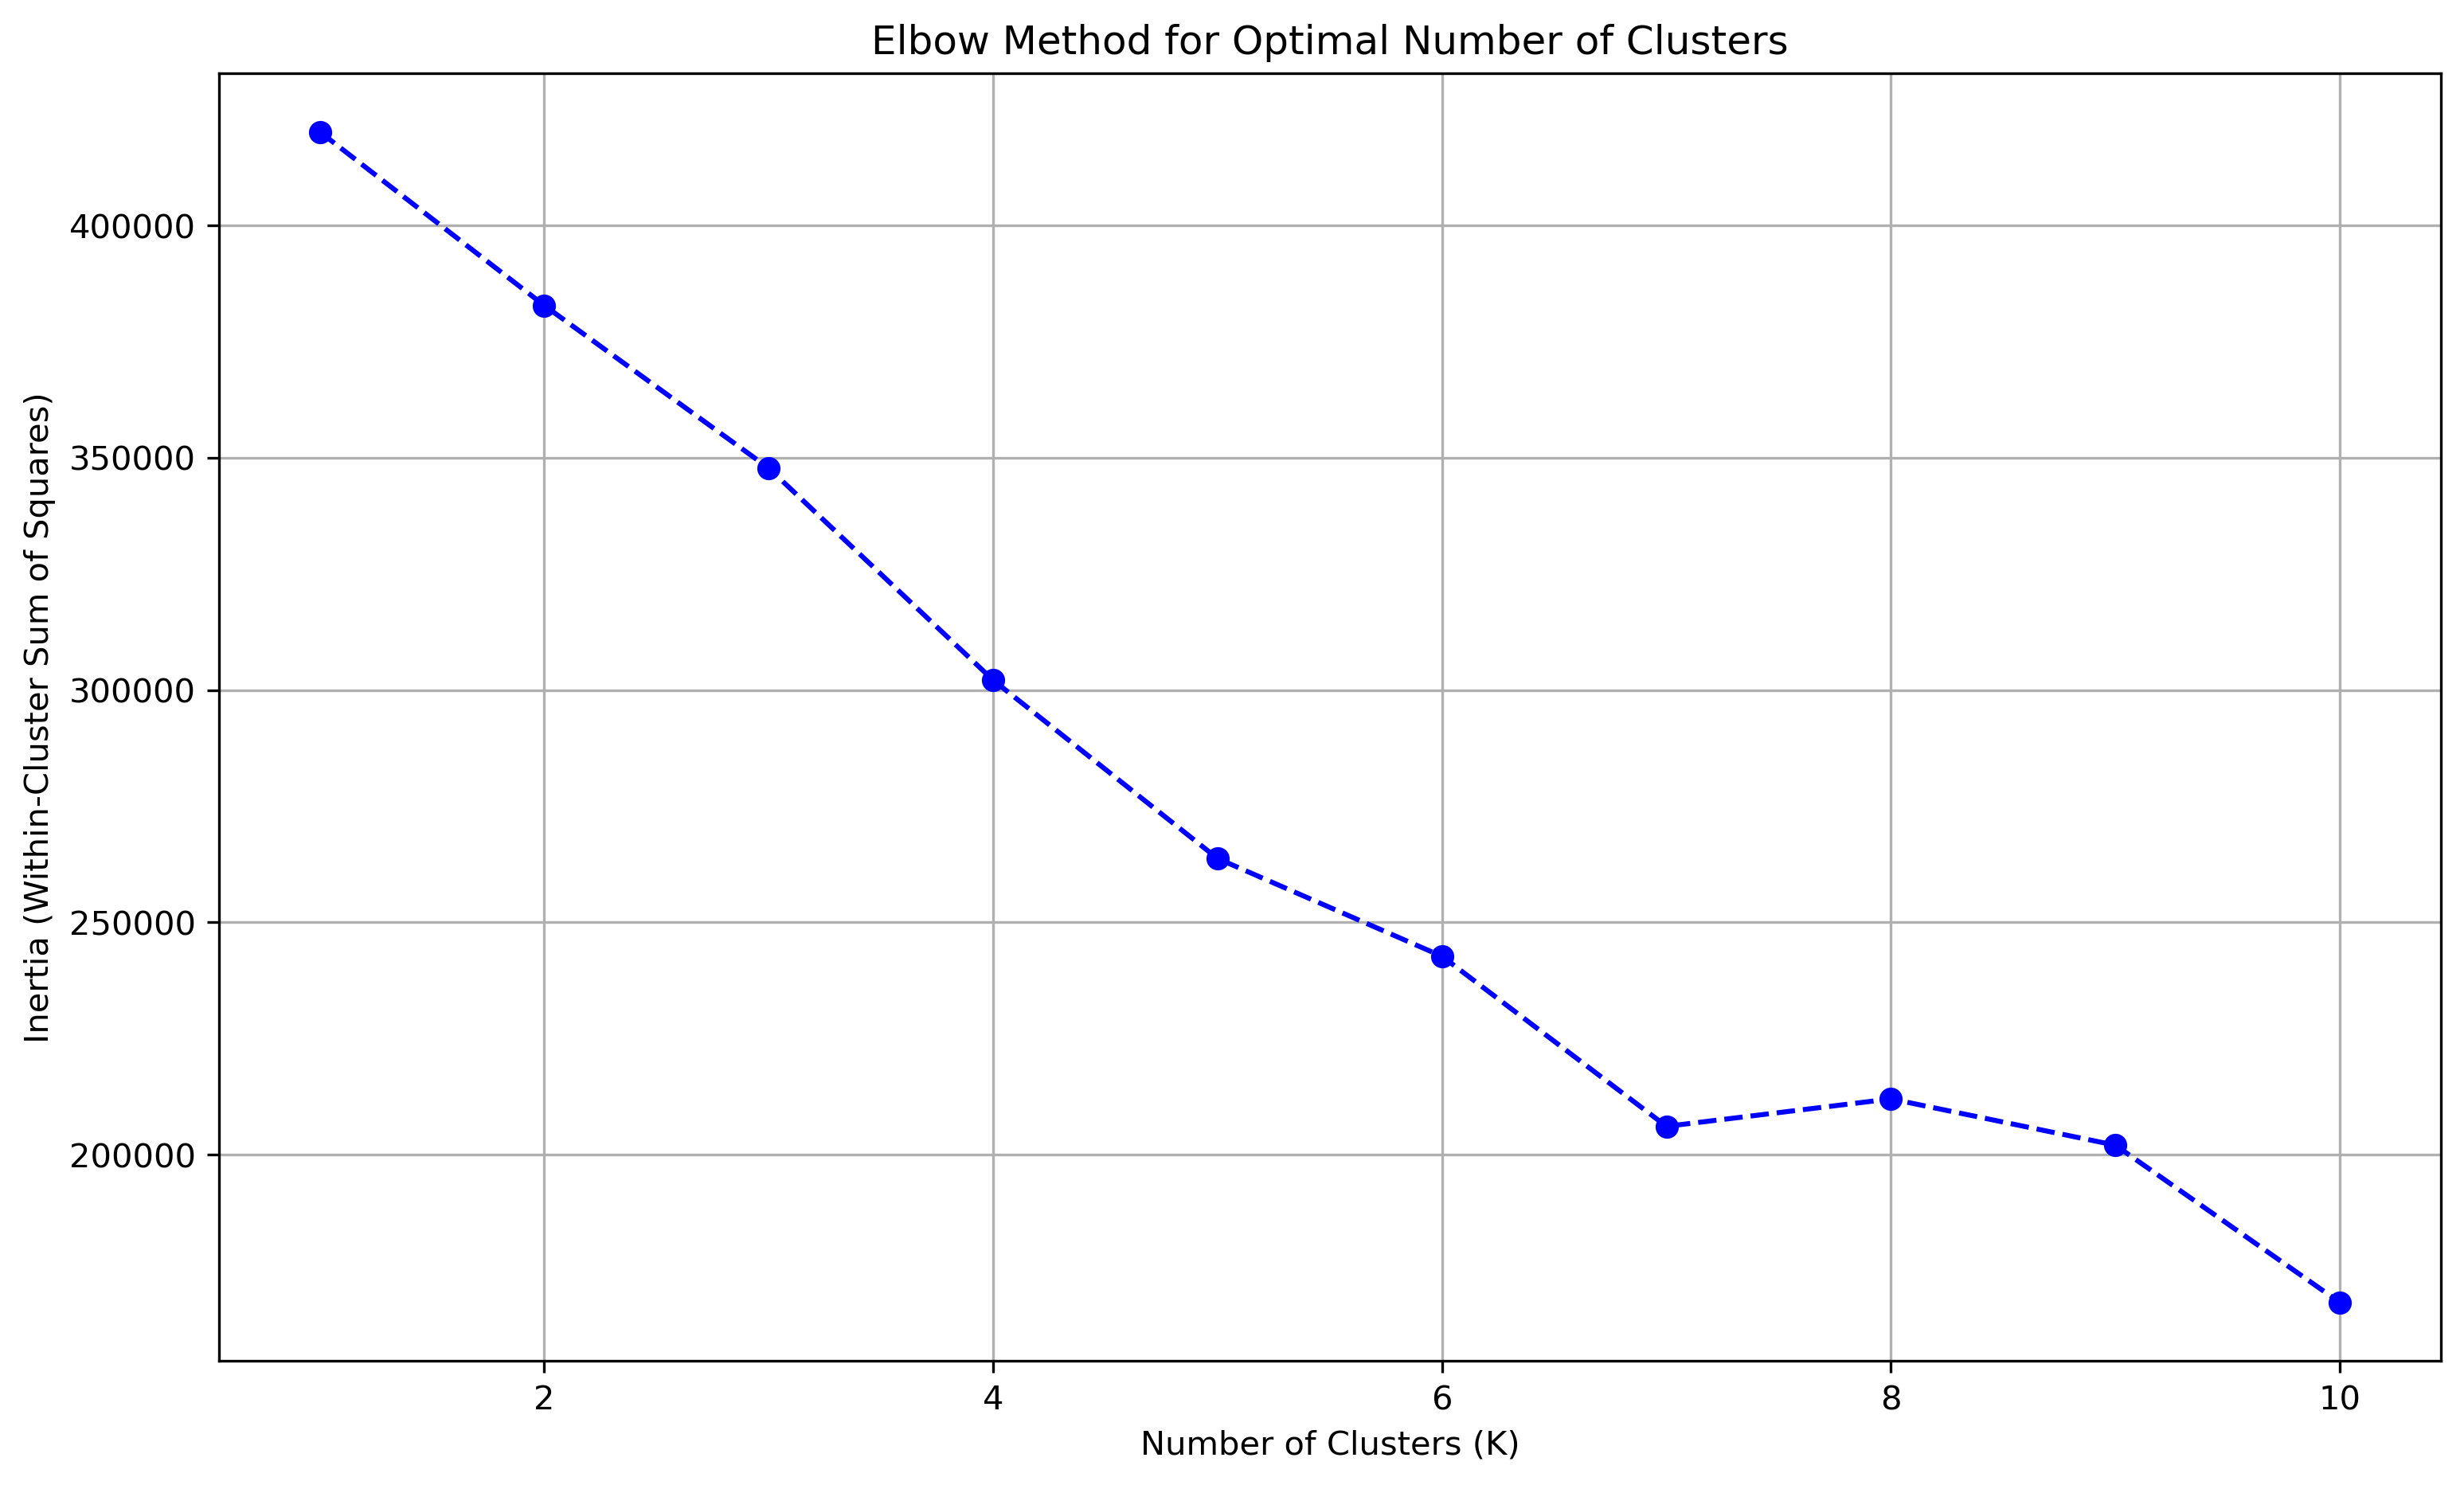

In [30]:
# Elbow method to decide the K value for clustering. We only want to use physical and sub-review factors for clustering. We add the final cluster labels to the original dataset.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cluster_data = df_PCA_Cluster[['PCA_Physical_Factors_1', 'PCA_Physical_Factors_2',
       'PCA_Physical_Factors_3', 'PCA_Physical_Factors_4',
       'PCA_Sub_Review_Factors_1', 'PCA_Sub_Review_Factors_2',
       'PCA_Sub_Review_Factors_3']].dropna()
# Standardize the data
scaler = StandardScaler()
scaled_cluster_data = scaler.fit_transform(cluster_data)
# Perform KMeans clustering for a range of K values
K = 11
inertia_values = []
for k in range(1, K):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_cluster_data)
    inertia_values.append(kmeans.inertia_)
# Plot the Elbow Method
plt.figure(figsize=(12, 7), dpi=300)  # High resolution for publication
plt.plot(range(1, K), inertia_values, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


In [31]:
#=====add the clusters to dataset and print a summary table of the clusters======
# Perform KMeans clustering with the optimal number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=SEED)
kmeans.fit(scaled_cluster_data)
# Add the cluster labels to the original dataset
df_PCA_Cluster['Cluster_Labels'] = kmeans.labels_

# Print a summary table for the 7 factors in each cluster
# Create a summary table for the 7 factors in each cluster
cluster_summary = df_PCA_Cluster.groupby('Cluster_Labels').agg({
    'PCA_Physical_Factors_1': ['mean', ],
    'PCA_Physical_Factors_2': ['mean', ],
    'PCA_Physical_Factors_3': ['mean', ],
    'PCA_Physical_Factors_4': ['mean', ],
    'PCA_Sub_Review_Factors_1': ['mean', ],
    'PCA_Sub_Review_Factors_2': ['mean', ],
    'PCA_Sub_Review_Factors_3': ['mean', ]
}).reset_index()
# Rename columns for clarity
cluster_summary.columns = ['Cluster_Labels'] + [f'{factor}_{stat}' for factor, stat in cluster_summary.columns[1:]]
# Print the summary table
cluster_summary.head()

Cluster_Labels  PCA_Physical_Factors_1_mean  PCA_Physical_Factors_2_mean  PCA_Physical_Factors_3_mean  PCA_Physical_Factors_4_mean  PCA_Sub_Review_Factors_1_mean  PCA_Sub_Review_Factors_2_mean  PCA_Sub_Review_Factors_3_mean
0               0                     0.161052                    -0.096407                     0.161175                    -0.020296                      -9.759707                       0.962360                       1.237338
1               1                     0.701463                    -0.534818                    -0.526871                    -0.445432                       0.180135                      -0.286595                       0.095130
2               2                     0.272436                     0.070275                     0.105232                     0.716235                       0.246794                       0.165465                      -0.129124
3               3                    -2.310171                     0.962023                     0.809872                    -1.089585                       0.232285                       0.011900                      -0.003077

In [32]:
# Count number of unique Airbnb_Property_IDs in each cluster
print(df_PCA_Cluster.groupby('Cluster_Labels')['Airbnb_Property_ID'].nunique())
print(df_PCA_Cluster['Airbnb_Property_ID'].count())  

Cluster_Labels
0     1326
1    20986
2    27935
3     9759
Name: Airbnb_Property_ID, dtype: int64
60006


##### Cluster 2 and 3 have the highest market share, indicating stronger competitiveness over hotels. 

In [33]:
# Merge df_chicago with df_PCA_Cluster to get the cluster labels for each listing
df_chicago = df_chicago.merge(df_PCA_Cluster[['Airbnb_Property_ID', 'Cluster_Labels']], on='Airbnb_Property_ID', how='left')

In [34]:
# Drop NaN values in 'Cluster_Labels' column
df_chicago = df_chicago.dropna(subset=['Cluster_Labels'])
print(df_chicago.columns)
df_chicago.head(20)

Index(['Property_ID', 'Date', 'Price_USD', 'Airbnb_Property_ID', 'ADR_USD', 'Airbnb_Accuracy_Rating', 'Airbnb_Checkin_Rating', 'Airbnb_Cleanliness_Rating', 'Airbnb_Communication_Rating', 'Airbnb_HOST_ID', 'Airbnb_Location_Rating', 'Airbnb_Superhost', 'Airbnb_Value_Rating', 'Amenities', 'Bathrooms', 'Bedrooms', 'City', 'Cleaning_Fee_USD', 'Count_Available_Days_LTM', 'Count_Reservation_Days_LTM', 'Country', 'Created_Date', 'Currency_USD', 'Extra_People_Fee', 'Has_Air_Con', 'Has_Gym', 'Has_Hot_Tub', 'Has_Kitchen', 'Has_Parking', 'Has_Pool', 'Host_Type', 'Last_Calendar_Update', 'Latitude', 'Longitude', 'Listing_Type', 'Location_Type', 'Max_Guests', 'Metropolitan_Statistical_Area', 'Minimum_Stay', 'Neighborhood', 'Number_of_Photos', 'Number_of_Reviews', 'Occupancy_Rate', 'Overall_Rating', 'Pets_Allowed', 'Price_Tier', 'Published_Monthly_Rate_USD', 'Published_Nightly_Rate_USD', 'Published_Weekly_Rate_USD', 'Response_Rate', 'Response_Time', 'Revenue_USD', 'Revenue_Potential_USD',
       'Secu

Property_ID       Date  Price_USD  Airbnb_Property_ID     ADR_USD  Airbnb_Accuracy_Rating  Airbnb_Checkin_Rating  Airbnb_Cleanliness_Rating  Airbnb_Communication_Rating  Airbnb_HOST_ID  Airbnb_Location_Rating Airbnb_Superhost  Airbnb_Value_Rating                                                                                                                                                                                                                                                                                                                                                                                                                                            Amenities  Bathrooms  Bedrooms     City  Cleaning_Fee_USD  Count_Available_Days_LTM  Count_Reservation_Days_LTM        Country Created_Date Currency_USD  Extra_People_Fee Has_Air_Con Has_Gym Has_Hot_Tub Has_Kitchen Has_Parking Has_Pool  Host_Type Last_Calendar_Update  Latitude  Longitude     Listing_Type  \
13  abnb_1000071427632382596 2022-08-01   308.0000        1.000071e+18  294.509709                    10.0                   10.0                        9.0                         10.0       1118796.0                    10.0             True                  9.0  ["ac","city_view","dedicated_workspace","dishes_and_silverware","dishwasher","dryer","essentials","fire_extinguisher","fire_pit","first_aid_kit","gym","hair_dryer","hangers","heating","hot_water","hottub","internet","iron","kitchen","lockbox","microwave","oven","parking","pool","pool_table","refrigerator_or_freezer","sauna","self_checkin","shampoo","smoke_detector","stove","toaster","tv","washer","wine_glasses","wireless_internet"]        2.0       2.0  Chicago              90.0                       7.0                       206.0  United States   2023-10-14          usd               NaN        True    True        True        True        True     True  21+ Units  2024-11-04 06:03:47  41.87121  -87.63161  Entire home/apt   
14  abnb_1000071427632382596 2022-09-01   318.0000        1.000071e+18  294.509709                    10.0                   10.0                        9.0                         10.0       1118796.0                    10.0             True                  9.0  ["ac","city_view","dedicated_workspace","dishes_and_silverware","dishwasher","dryer","essentials","fire_extinguisher","fire_pit","first_aid_kit","gym","hair_dryer","hangers","heating","hot_water","hottub","internet","iron","kitchen","lockbox","microwave","oven","parking","pool","pool_table","refrigerator_or_freezer","sauna","self_checkin","shampoo","smoke_detector","stove","toaster","tv","washer","wine_glasses","wireless_internet"]        2.0       2.0  Chicago              90.0                       7.0                       206.0  United States   2023-10-14          usd               NaN        True    True        True        True        True     True  21+ Units  2024-11-04 06:03:47  41.87121  -87.63161  Entire home/apt   
15  abnb_1000071427632382596 2022-10-01   266.0000        1.000071e+18  294.509709                    10.0                   10.0                        9.0                         10.0       1118796.0                    10.0             True                  9.0  ["ac","city_view","dedicated_workspace","dishes_and_silverware","dishwasher","dryer","essentials","fire_extinguisher","fire_pit","first_aid_kit","gym","hair_dryer","hangers","heating","hot_water","hottub","internet","iron","kitchen","lockbox","microwave","oven","parking","pool","pool_table","refrigerator_or_freezer","sauna","self_checkin","shampoo","smoke_detector","stove","toaster","tv","washer","wine_glasses","wireless_internet"]        2.0       2.0  Chicago              90.0                       7.0                       206.0  United States   2023-10-14          usd               NaN        True    True        True        True        True     True  21+ Units  2024-11-04 06:03:47  41.87121  -87.63161  Entire home/apt   
16  abnb_10000714

#### GIS for 4 different clusters

In [ ]:
def save_map_as_image(map_path, period):
    print("Saving map as image...")
    try:
        # Set up Chrome options
        chrome_options = Options()
        chrome_options.add_argument("--headless")
        chrome_options.add_argument("--window-size=1920,1080")

        # Initialize the driver
        driver = webdriver.Chrome(options=chrome_options)

        # Load the map
        driver.get(f"file://{map_path}")

        # Wait for the map to load
        import time
        time.sleep(5)  # Adjust this time based on your map's loading speed

        # Define the output file path
        output_file_path = os.path.join(CLUSTER_GIS_OUTPUT, f"airbnb_cluster_map_{period}.png")
        print(f"Saving map to: {output_file_path}")

        # Save the map as an image
        driver.save_screenshot(output_file_path)

        # Close the driver
        driver.quit()
        print("Map saved successfully.")
    except Exception as e:
        print(f"Error saving map: {e}")

def save_plot_as_image(fig, period):
    print("Saving plot as image...")
    try:
        # Define the output file path
        output_file_path = os.path.join(CLUSTER_GIS_OUTPUT, f"airbnb_adr_trend_{period}.png")
        print(f"Saving plot to: {output_file_path}")

        # Save the plot as an image
        fig.write_image(output_file_path)
        print("Plot saved successfully.")
    except Exception as e:
        print(f"Error saving plot: {e}")
        
# Define distinct colors for clusters
cluster_colors = {
    0: "cyan",  # Urban Apartment Units, Location & Cleanliness Focused (1b1b)
    1: 'pink',  # Minimalist 1B1B Rentals, General Quality Over Location
    2: "purple", # Kitchen-Centric Homes, Care about the general review quality but not cleaniness. Location has moderate effect.
    3: "crimson"  # Flexible Kitchen-Centric Homes, Priotirizing the general review quality, don't require the singe sub-rating to be very high.
}

# Define your directory paths
ROOT = os.getcwd()  # Get the current working directory
CLUSTER_GIS_OUTPUT = os.path.join(ROOT, "Cluster_GIS_Output")

# Create the folder if it does not exist
if not os.path.exists(CLUSTER_GIS_OUTPUT):
    os.makedirs(CLUSTER_GIS_OUTPUT)

# Loop to save maps for all periods
for i, period in enumerate(sorted(df_chicago['Period'].unique())):
    print(f"Processing period: {period}")
    
    # Filter data for the selected period
    filtered_data = df_chicago[df_chicago['Period'] == period]
    print(f"Filtered data shape: {filtered_data.shape}")
    
    # Create Folium Map centered on a sample location
    airbnb_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)  # Example: Chicago

    # Add Heatmap Layer
    heat_data = filtered_data[['Latitude', 'Longitude']].dropna().values.tolist()
    HeatMap(heat_data, radius=15, blur=10, max_zoom=13).add_to(airbnb_map)

    # Define a color scale for clusters
    colormap = cm.LinearColormap(
        colors=['blue', 'green', 'orange', 'red'],
        vmin=0,
        vmax=3,
        caption='Cluster Labels'
    )
    airbnb_map.add_child(colormap)

    # Add Circle Markers for listings
    for _, row in filtered_data.iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=3,
            color=cluster_colors.get(row['Cluster_Labels'], "black"),
            fill=True,
            fill_color=cluster_colors.get(row['Cluster_Labels'], "black"),
            fill_opacity=0.9,
            popup=f"Date: {row['Date'].date()}<br>ADR: ${row['ADR_USD']:.2f}<br>Cluster: {row['Cluster_Labels']}"
        ).add_to(airbnb_map)

    # **Add a categorical legend for clusters**
    legend_html = '''
    <div style="position: fixed; bottom: 50px; left: 50px; width: 150px; height: auto;
                background-color: white; z-index:9999; font-size:14px; padding: 10px;
                border-radius: 5px; box-shadow: 2px 2px 5px rgba(0,0,0,0.5);">
        <b>Cluster Legend</b><br>
        <span style="color:blue;">⬤ Cluster 0</span><br>
        <span style="color:green;">⬤ Cluster 1</span><br>
        <span style="color:orange;">⬤ Cluster 2</span><br>
        <span style="color:red;">⬤ Cluster 3</span><br>
    </div>
    '''

    # Save Map as HTML
    map_path = os.path.join(CLUSTER_GIS_OUTPUT, f"airbnb_cluster_map_{period}.html")
    airbnb_map.save(map_path)
    
    # Save Map as Image using Selenium
    save_map_as_image(map_path, period)
    
    # Create Time Series Plot
    time_series_data = df_chicago.groupby('Period')['ADR_USD'].mean().reset_index()
    time_series_data['Date'] = pd.to_datetime(time_series_data['Period'])
    fig = px.line(time_series_data, x='Date', y='ADR_USD',
                  title="Airbnb Average Daily Rate Trends Over Time",
                  labels={'ADR_USD': 'Average Daily Rate (USD)', 'Date': 'Date'},
                  template="plotly_white")
    
    # Save Time Series Plot as Image
    save_plot_as_image(fig, period)

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Interactive Airbnb GIS Analysis", style={'text-align': 'center'}),

    # Period Selection Slider
    html.Label("Select Six-Month Period:"),
    dcc.Slider(
        id="period_selection",
        min=0,
        max=len(df_chicago['Period'].unique()) - 1,
        value=0,
        marks={i: period for i, period in enumerate(sorted(df_chicago['Period'].unique()))},
        step=None
    ),

    # Display Map
    html.Iframe(id="map", width="100%", height="600"),

    # Time Series Chart
    dcc.Graph(id="time_series_chart")
])

@app.callback(
    [Output("map", "srcDoc"), Output("time_series_chart", "figure")],
    [Input("period_selection", "value")]
)
def update_map(selected_period_index):
    print(f"Updating map and plot for period index: {selected_period_index}")
    
    try:
        # Get the selected period
        periods = sorted(df_chicago['Period'].unique())
        print(f"Available periods: {periods}")
        
        selected_period = periods[selected_period_index]
        print(f"Selected period: {selected_period}")
        
        # Filter data for the selected period
        filtered_data = df_chicago[df_chicago['Period'] == selected_period]
        print(f"Filtered data shape: {filtered_data.shape}")
        
        # Create Folium Map centered on a sample location
        airbnb_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)  # Example: Chicago

        # Add Heatmap Layer
        heat_data = filtered_data[['Latitude', 'Longitude']].dropna().values.tolist()
        HeatMap(heat_data, radius=15, blur=10, max_zoom=13).add_to(airbnb_map)

        # Define a color scale for clusters
        colormap = cm.LinearColormap(
            colors=['blue', 'green', 'orange', 'red'],
            vmin=0,
            vmax=3,
            caption='Cluster Labels'
        )
        airbnb_map.add_child(colormap)

        # Add Circle Markers for listings
        for _, row in filtered_data.iterrows():
            folium.CircleMarker(
                location=[row['Latitude'], row['Longitude']],
                radius=3,
                color=cluster_colors.get(row['Cluster_Labels'], "black"),
                fill=True,
                fill_color=cluster_colors.get(row['Cluster_Labels'], "black"),
                fill_opacity=0.9,
                popup=f"Date: {row['Date'].date()}<br>ADR: ${row['ADR_USD']:.2f}<br>Cluster: {row['Cluster_Labels']}"
            ).add_to(airbnb_map)

        # **Add a categorical legend for clusters**
        legend_html = '''
        <div style="position: fixed; bottom: 50px; left: 50px; width: 150px; height: auto;
                    background-color: white; z-index:9999; font-size:14px; padding: 10px;
                    border-radius: 5px; box-shadow: 2px 2px 5px rgba(0,0,0,0.5);">
            <b>Cluster Legend</b><br>
            <span style="color:blue;">⬤ Cluster 0</span><br>
            <span style="color:green;">⬤ Cluster 1</span><br>
            <span style="color:orange;">⬤ Cluster 2</span><br>
            <span style="color:red;">⬤ Cluster 3</span><br>
        </div>
        '''

        # Save Map as HTML
        map_path = os.path.join(CLUSTER_GIS_OUTPUT, f"airbnb_cluster_map_{selected_period}.html")
        airbnb_map.save(map_path)

        # Load the HTML content for the map
        with open(map_path, "r", encoding="utf-8") as f:
            map_html = f.read()

        # Save Map as Image using Selenium
        save_map_as_image(map_path, selected_period)

        # Create Time Series Plot
        time_series_data = df_chicago.groupby('Period')['ADR_USD'].mean().reset_index()
        time_series_data['Date'] = pd.to_datetime(time_series_data['Period'])
        fig = px.line(time_series_data, x='Date', y='ADR_USD',
                      title="Airbnb Average Daily Rate Trends Over Time",
                      labels={'ADR_USD': 'Average Daily Rate (USD)', 'Date': 'Date'},
                      template="plotly_white")

        # Save Time Series Plot as Image
        save_plot_as_image(fig, selected_period)

        print("Map and plot updated successfully.")
        return map_html, fig
    except Exception as e:
        print(f"Error updating map and plot: {e}")

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


Processing period: 2014-07
Filtered data shape: (1182, 60)
Saving map as image...
Saving map to: /Users/zhangshuyi/Desktop/Airbnb_Analysis/Cluster_GIS_Output/airbnb_cluster_map_2014-07.png
Map saved successfully.
Saving plot as image...
Saving plot to: /Users/zhangshuyi/Desktop/Airbnb_Analysis/Cluster_GIS_Output/airbnb_adr_trend_2014-07.png
Plot saved successfully.
Processing period: 2015-01
Filtered data shape: (2368, 60)
Saving map as image...
Saving map to: /Users/zhangshuyi/Desktop/Airbnb_Analysis/Cluster_GIS_Output/airbnb_cluster_map_2015-01.png
Map saved successfully.
Saving plot as image...
Saving plot to: /Users/zhangshuyi/Desktop/Airbnb_Analysis/Cluster_GIS_Output/airbnb_adr_trend_2015-01.png
Plot saved successfully.
Processing period: 2015-07
Filtered data shape: (2522, 60)
Saving map as image...
Saving map to: /Users/zhangshuyi/Desktop/Airbnb_Analysis/Cluster_GIS_Output/airbnb_cluster_map_2015-07.png
Map saved successfully.
Saving plot as image...
Saving plot to: /Users/zhan

Updating map and plot for period index: 0
Available periods: ['2014-07', '2015-01', '2015-07', '2016-01', '2016-07', '2017-01', '2017-07', '2018-01', '2018-07', '2019-01', '2019-07', '2020-01', '2020-07', '2021-01', '2021-07', '2022-01', '2022-07', '2023-01', '2023-07', '2024-01', '2024-07']
Selected period: 2014-07
Updating map and plot for period index: 0
Filtered data shape: (391, 67)
Available periods: ['2014-07', '2015-01', '2015-07', '2016-01', '2016-07', '2017-01', '2017-07', '2018-01', '2018-07', '2019-01', '2019-07', '2020-01', '2020-07', '2021-01', '2021-07', '2022-01', '2022-07', '2023-01', '2023-07', '2024-01', '2024-07']
Selected period: 2014-07
Filtered data shape: (391, 67)
Saving map as image...
Saving map as image...
Saving map to: /Users/zhangshuyi/Desktop/Airbnb_Analysis/Cluster_GIS_Output/airbnb_cluster_map_2014-07.pngSaving map to: /Users/zhangshuyi/Desktop/Airbnb_Analysis/Cluster_GIS_Output/airbnb_cluster_map_2014-07.png

Map saved successfully.
Map saved successf

# Causal Forest
- num of photos, review rating, metropolian area, max guests... 
- To be continued......

price_surge
0    328881
1     76354
Name: count, dtype: int64
price_drop
0    346325
1     58910
Name: count, dtype: int64


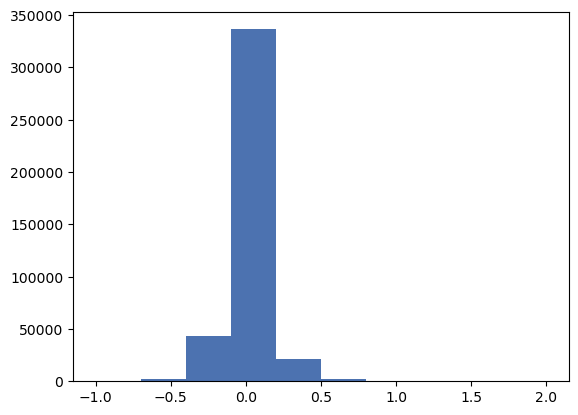

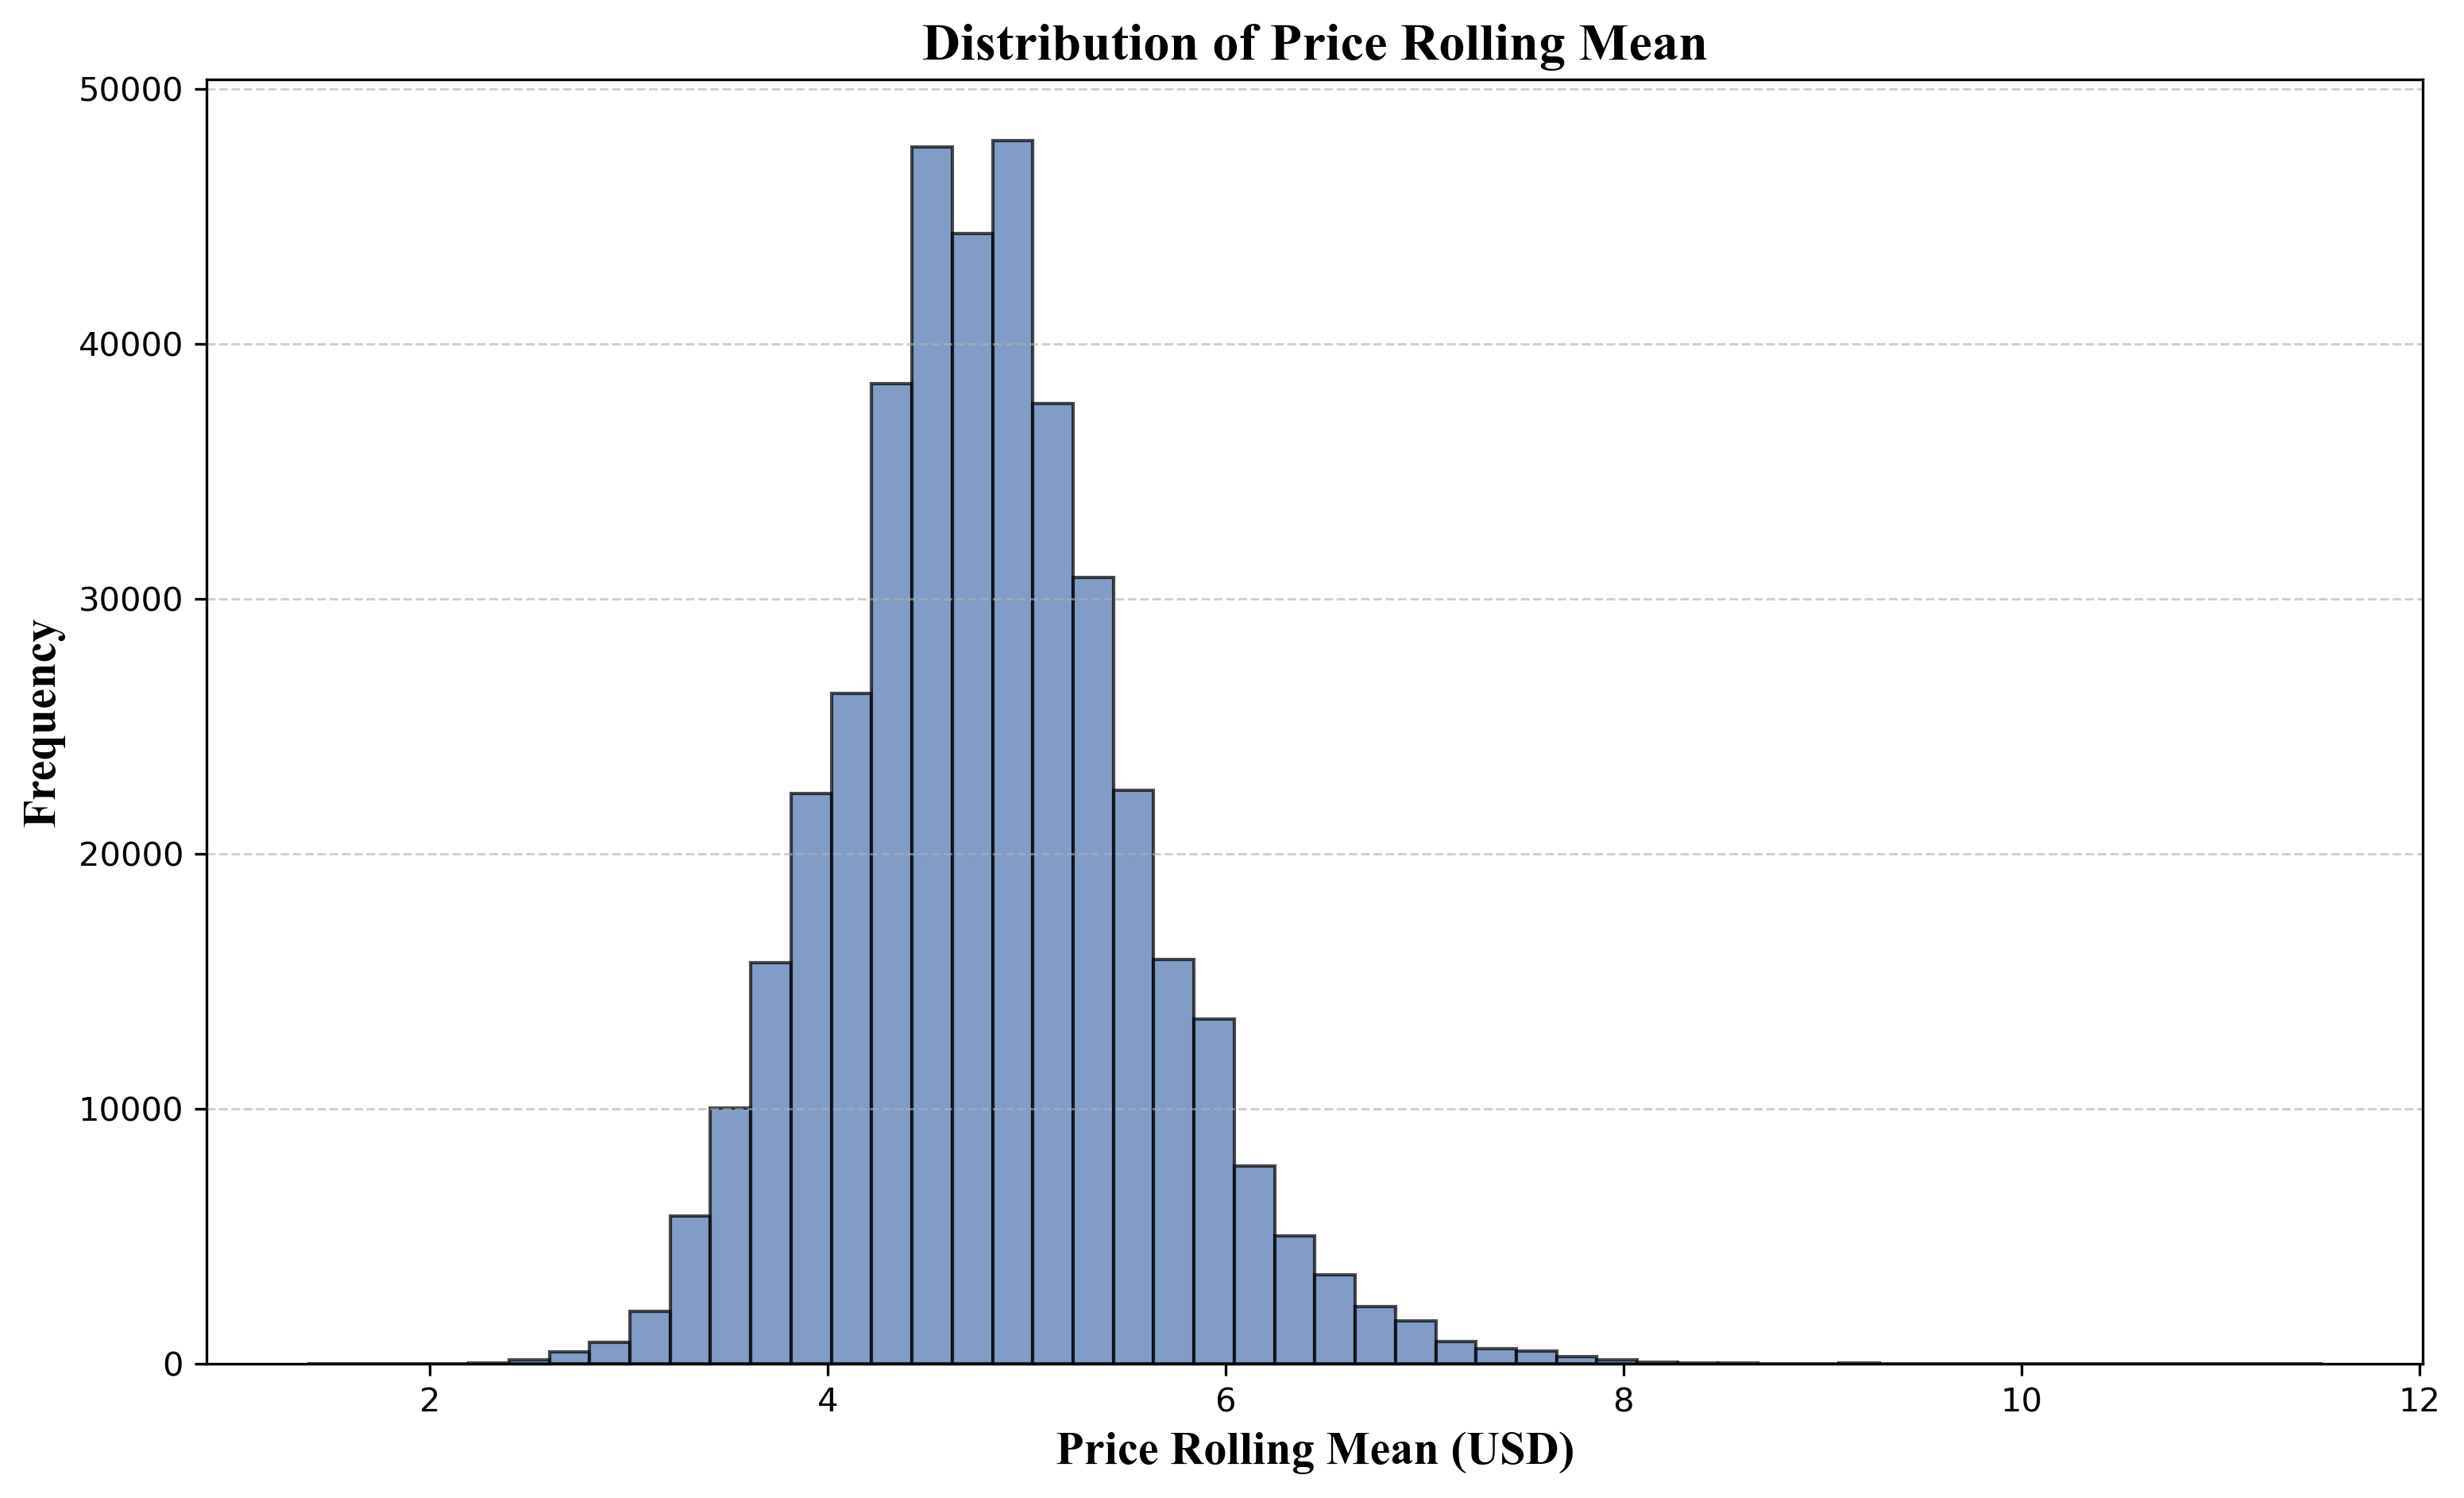

In [36]:
# Apply causal forest to the data. Estimate the heterogeneous treatment effect of the cluster labels on the price change. 
# The treatment (T) is the sudden price surge or drop in the market. 
# The outcome (Y) is the occupancy rate of the listing, the ADR, and the Revenue
# The moderator covariates (X) are the cluster labels,
# The other control variables (W) are the other features in the dataset, which is included in the W_col
 
# First, generate price surge and drop for each Airbnb_Property_ID over time (in the past 3 months).
# Define: price_surge: the price increase in percentage in the past 3 months is higher than 1 s.d. from the mean of the same household in the past 12 months. Price drop is the opposite.

window_size = 3  # 3 months
threshold = 1  # 1 standard deviations
# Calculate the rolling mean and standard deviation for each Airbnb_Property_ID
df_chicago['price_rolling_mean'] = df_chicago.groupby(['Airbnb_Property_ID','Property_ID'])['Price_USD'].transform(lambda x: x.rolling(window=window_size).mean())
df_chicago['price_rolling_std'] = df_chicago.groupby(['Airbnb_Property_ID','Property_ID'])['Price_USD'].transform(lambda x: x.rolling(window=window_size).std())
# Calculate the price surge and drop as dummy variables
df_chicago['price_surge'] = np.where((df_chicago['Price_USD'] - df_chicago['price_rolling_mean']) > threshold * df_chicago['price_rolling_std'], 1, 0)
df_chicago['price_drop'] = np.where((df_chicago['Price_USD'] - df_chicago['price_rolling_mean']) < -threshold * df_chicago['price_rolling_std'], 1, 0)

# price_change_pct is the percentage change in price from the rolling mean
df_chicago['price_change_pct'] = (df_chicago['Price_USD'] - df_chicago['price_rolling_mean']) / df_chicago['price_rolling_mean']
# Drop where 'price_change_pct' > 1
plt.hist(df_chicago['price_change_pct'])
df_chicago = df_chicago[df_chicago['price_change_pct'] <= 1]
# histogram of 'price_change_pct'


# Drop the rolling mean and std columns
# Generate the lag of price surge and drop for each Airbnb_Property_ID, which is whether the price surge or drop happened in the past month
df_chicago['price_surge_lag'] = df_chicago.groupby(['Airbnb_Property_ID','Property_ID'])['price_surge'].shift(1)
df_chicago['price_drop_lag'] = df_chicago.groupby(['Airbnb_Property_ID','Property_ID'])['price_drop'].shift(1)
# print(df_chicago[['price_surge', 'price_drop', 'price_surge_lag', 'price_drop_lag']].head(20))

# Some summary hists and prints
print(df_chicago['price_surge'].value_counts())
print(df_chicago['price_drop'].value_counts())
figure, ax = plt.subplots(figsize=(12, 7), dpi=300)  # High resolution for publication
plt.hist(np.log(df_chicago['price_rolling_mean'] + 1).dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Price Rolling Mean (USD)', fontsize=14, fontweight='bold', fontname='Times New Roman')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', fontname='Times New Roman')
plt.title('Distribution of Price Rolling Mean', fontsize=16, fontweight='bold', fontname='Times New Roman')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.show()

In [37]:
df_chicago.head()

Property_ID       Date  Price_USD  Airbnb_Property_ID     ADR_USD  Airbnb_Accuracy_Rating  Airbnb_Checkin_Rating  Airbnb_Cleanliness_Rating  Airbnb_Communication_Rating  Airbnb_HOST_ID  Airbnb_Location_Rating Airbnb_Superhost  Airbnb_Value_Rating                                                                                                                                                                                                                                                                                                                                                                                                                                            Amenities  Bathrooms  Bedrooms     City  Cleaning_Fee_USD  Count_Available_Days_LTM  Count_Reservation_Days_LTM        Country Created_Date Currency_USD  Extra_People_Fee Has_Air_Con Has_Gym Has_Hot_Tub Has_Kitchen Has_Parking Has_Pool  Host_Type Last_Calendar_Update  Latitude  Longitude     Listing_Type  \
15  abnb_1000071427632382596 2022-10-01   266.0000        1.000071e+18  294.509709                    10.0                   10.0                        9.0                         10.0       1118796.0                    10.0             True                  9.0  ["ac","city_view","dedicated_workspace","dishes_and_silverware","dishwasher","dryer","essentials","fire_extinguisher","fire_pit","first_aid_kit","gym","hair_dryer","hangers","heating","hot_water","hottub","internet","iron","kitchen","lockbox","microwave","oven","parking","pool","pool_table","refrigerator_or_freezer","sauna","self_checkin","shampoo","smoke_detector","stove","toaster","tv","washer","wine_glasses","wireless_internet"]        2.0       2.0  Chicago              90.0                       7.0                       206.0  United States   2023-10-14          usd               NaN        True    True        True        True        True     True  21+ Units  2024-11-04 06:03:47  41.87121  -87.63161  Entire home/apt   
16  abnb_1000071427632382596 2022-11-01   262.5333        1.000071e+18  294.509709                    10.0                   10.0                        9.0                         10.0       1118796.0                    10.0             True                  9.0  ["ac","city_view","dedicated_workspace","dishes_and_silverware","dishwasher","dryer","essentials","fire_extinguisher","fire_pit","first_aid_kit","gym","hair_dryer","hangers","heating","hot_water","hottub","internet","iron","kitchen","lockbox","microwave","oven","parking","pool","pool_table","refrigerator_or_freezer","sauna","self_checkin","shampoo","smoke_detector","stove","toaster","tv","washer","wine_glasses","wireless_internet"]        2.0       2.0  Chicago              90.0                       7.0                       206.0  United States   2023-10-14          usd               NaN        True    True        True        True        True     True  21+ Units  2024-11-04 06:03:47  41.87121  -87.63161  Entire home/apt   
17  abnb_1000071427632382596 2022-12-01   233.0000        1.000071e+18  294.509709                    10.0                   10.0                        9.0                         10.0       1118796.0                    10.0             True                  9.0  ["ac","city_view","dedicated_workspace","dishes_and_silverware","dishwasher","dryer","essentials","fire_extinguisher","fire_pit","first_aid_kit","gym","hair_dryer","hangers","heating","hot_water","hottub","internet","iron","kitchen","lockbox","microwave","oven","parking","pool","pool_table","refrigerator_or_freezer","sauna","self_checkin","shampoo","smoke_detector","stove","toaster","tv","washer","wine_glasses","wireless_internet"]        2.0       2.0  Chicago              90.0                       7.0                       206.0  United States   2023-10-14          usd               NaN        True    True        True        True        True     True  21+ Units  2024-11-04 06:03:47  41.87121  -87.63161  Entire home/apt   
18  abnb_10000714

In [38]:
# Crime data of Chicago
# Get from: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data;
# Select from 2022-01-01 to 2024-10-01: https://data.cityofchicago.org/resource/ijzp-q8t2.csv?$where=date%20between%20%272022-01-01T00:00:00%27%20and%20%272024-10-01T23:59:59%27

crime_df = pd.read_csv(os.path.join(DATA, "chicago_crime_data.csv"))
crime_df = crime_df[['date', 'primary_type', 'latitude', 'longitude']]
# Rename the columns to match the Airbnb dataset
crime_df.columns = ['Date', 'Primary_Type', 'Latitude', 'Longitude']
crime_df['Date'] = pd.to_datetime(crime_df['Date'])
crime_df = crime_df.dropna()

# Define a list of severe crime types
severe_crimes = ['HOMICIDE', 'CRIMINAL SEXUAL ASSAULT', 'ROBBERY', 'AGGRAVATED ASSAULT']

# Filter the dataset for severe crimes
severe_crime_df = crime_df[crime_df['Primary_Type'].isin(severe_crimes)]
severe_crime_df.head()

Date             Primary_Type   Latitude  Longitude
7  2024-10-01 23:30:00                  ROBBERY  41.692541 -87.703400
9  2024-10-01 23:30:00  CRIMINAL SEXUAL ASSAULT  41.968329 -87.720025
34 2024-10-01 22:07:00                  ROBBERY  41.844253 -87.724944
57 2024-10-01 21:47:00                  ROBBERY  41.917426 -87.726571
61 2024-10-01 21:41:00                 HOMICIDE  41.966387 -87.653864

##### If there is a significant price drop, in each of the cluster, how much it influence Y? And how does it vary between different clusters?
- T: price_surge_lag & price_drop_lag
- Y: occupancy rate, ADR, revenue
- W: others all take as control variables

Running analysis on Chicago dataset...

Analyzing Occupancy_Rate with treatment price_surge_lag


/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' i

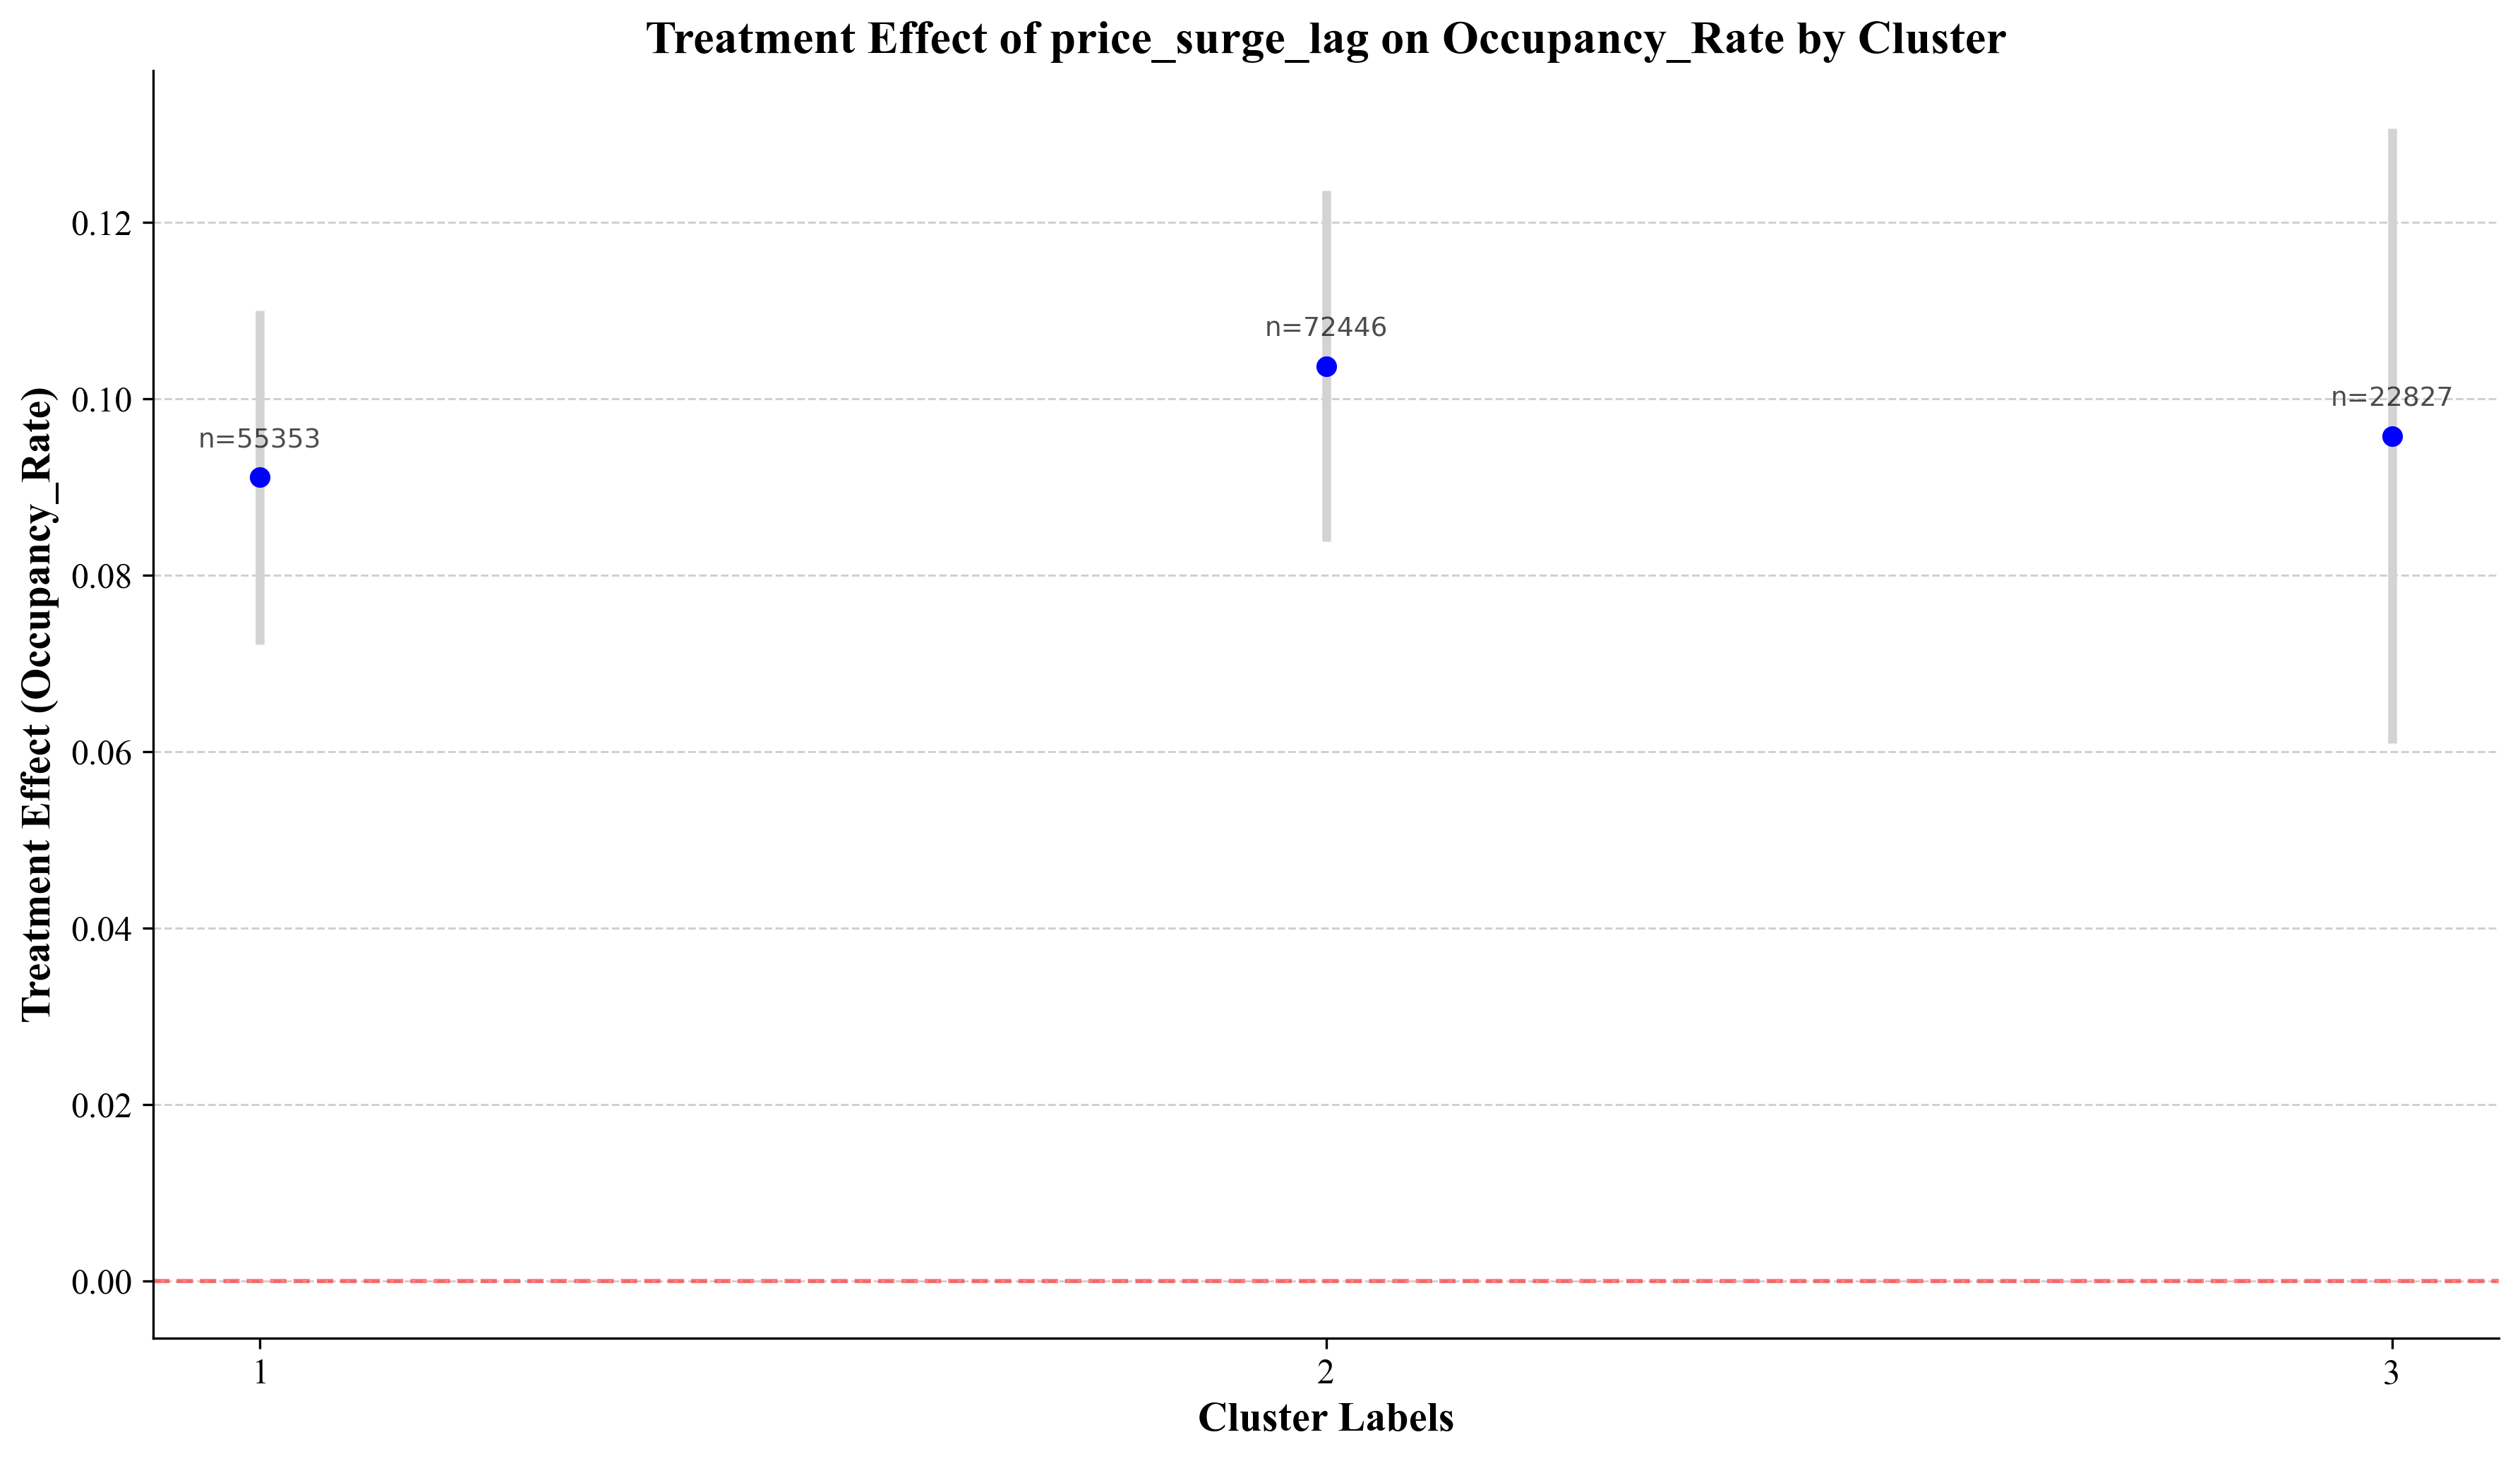

Cluster 3.0: Treatment Effect = 0.0958 (std = 0.0349, n = 22827)
Cluster 2.0: Treatment Effect = 0.1037 (std = 0.0199, n = 72446)
Cluster 1.0: Treatment Effect = 0.0911 (std = 0.0189, n = 55353)

Analyzing Occupancy_Rate with treatment price_drop_lag


/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' i

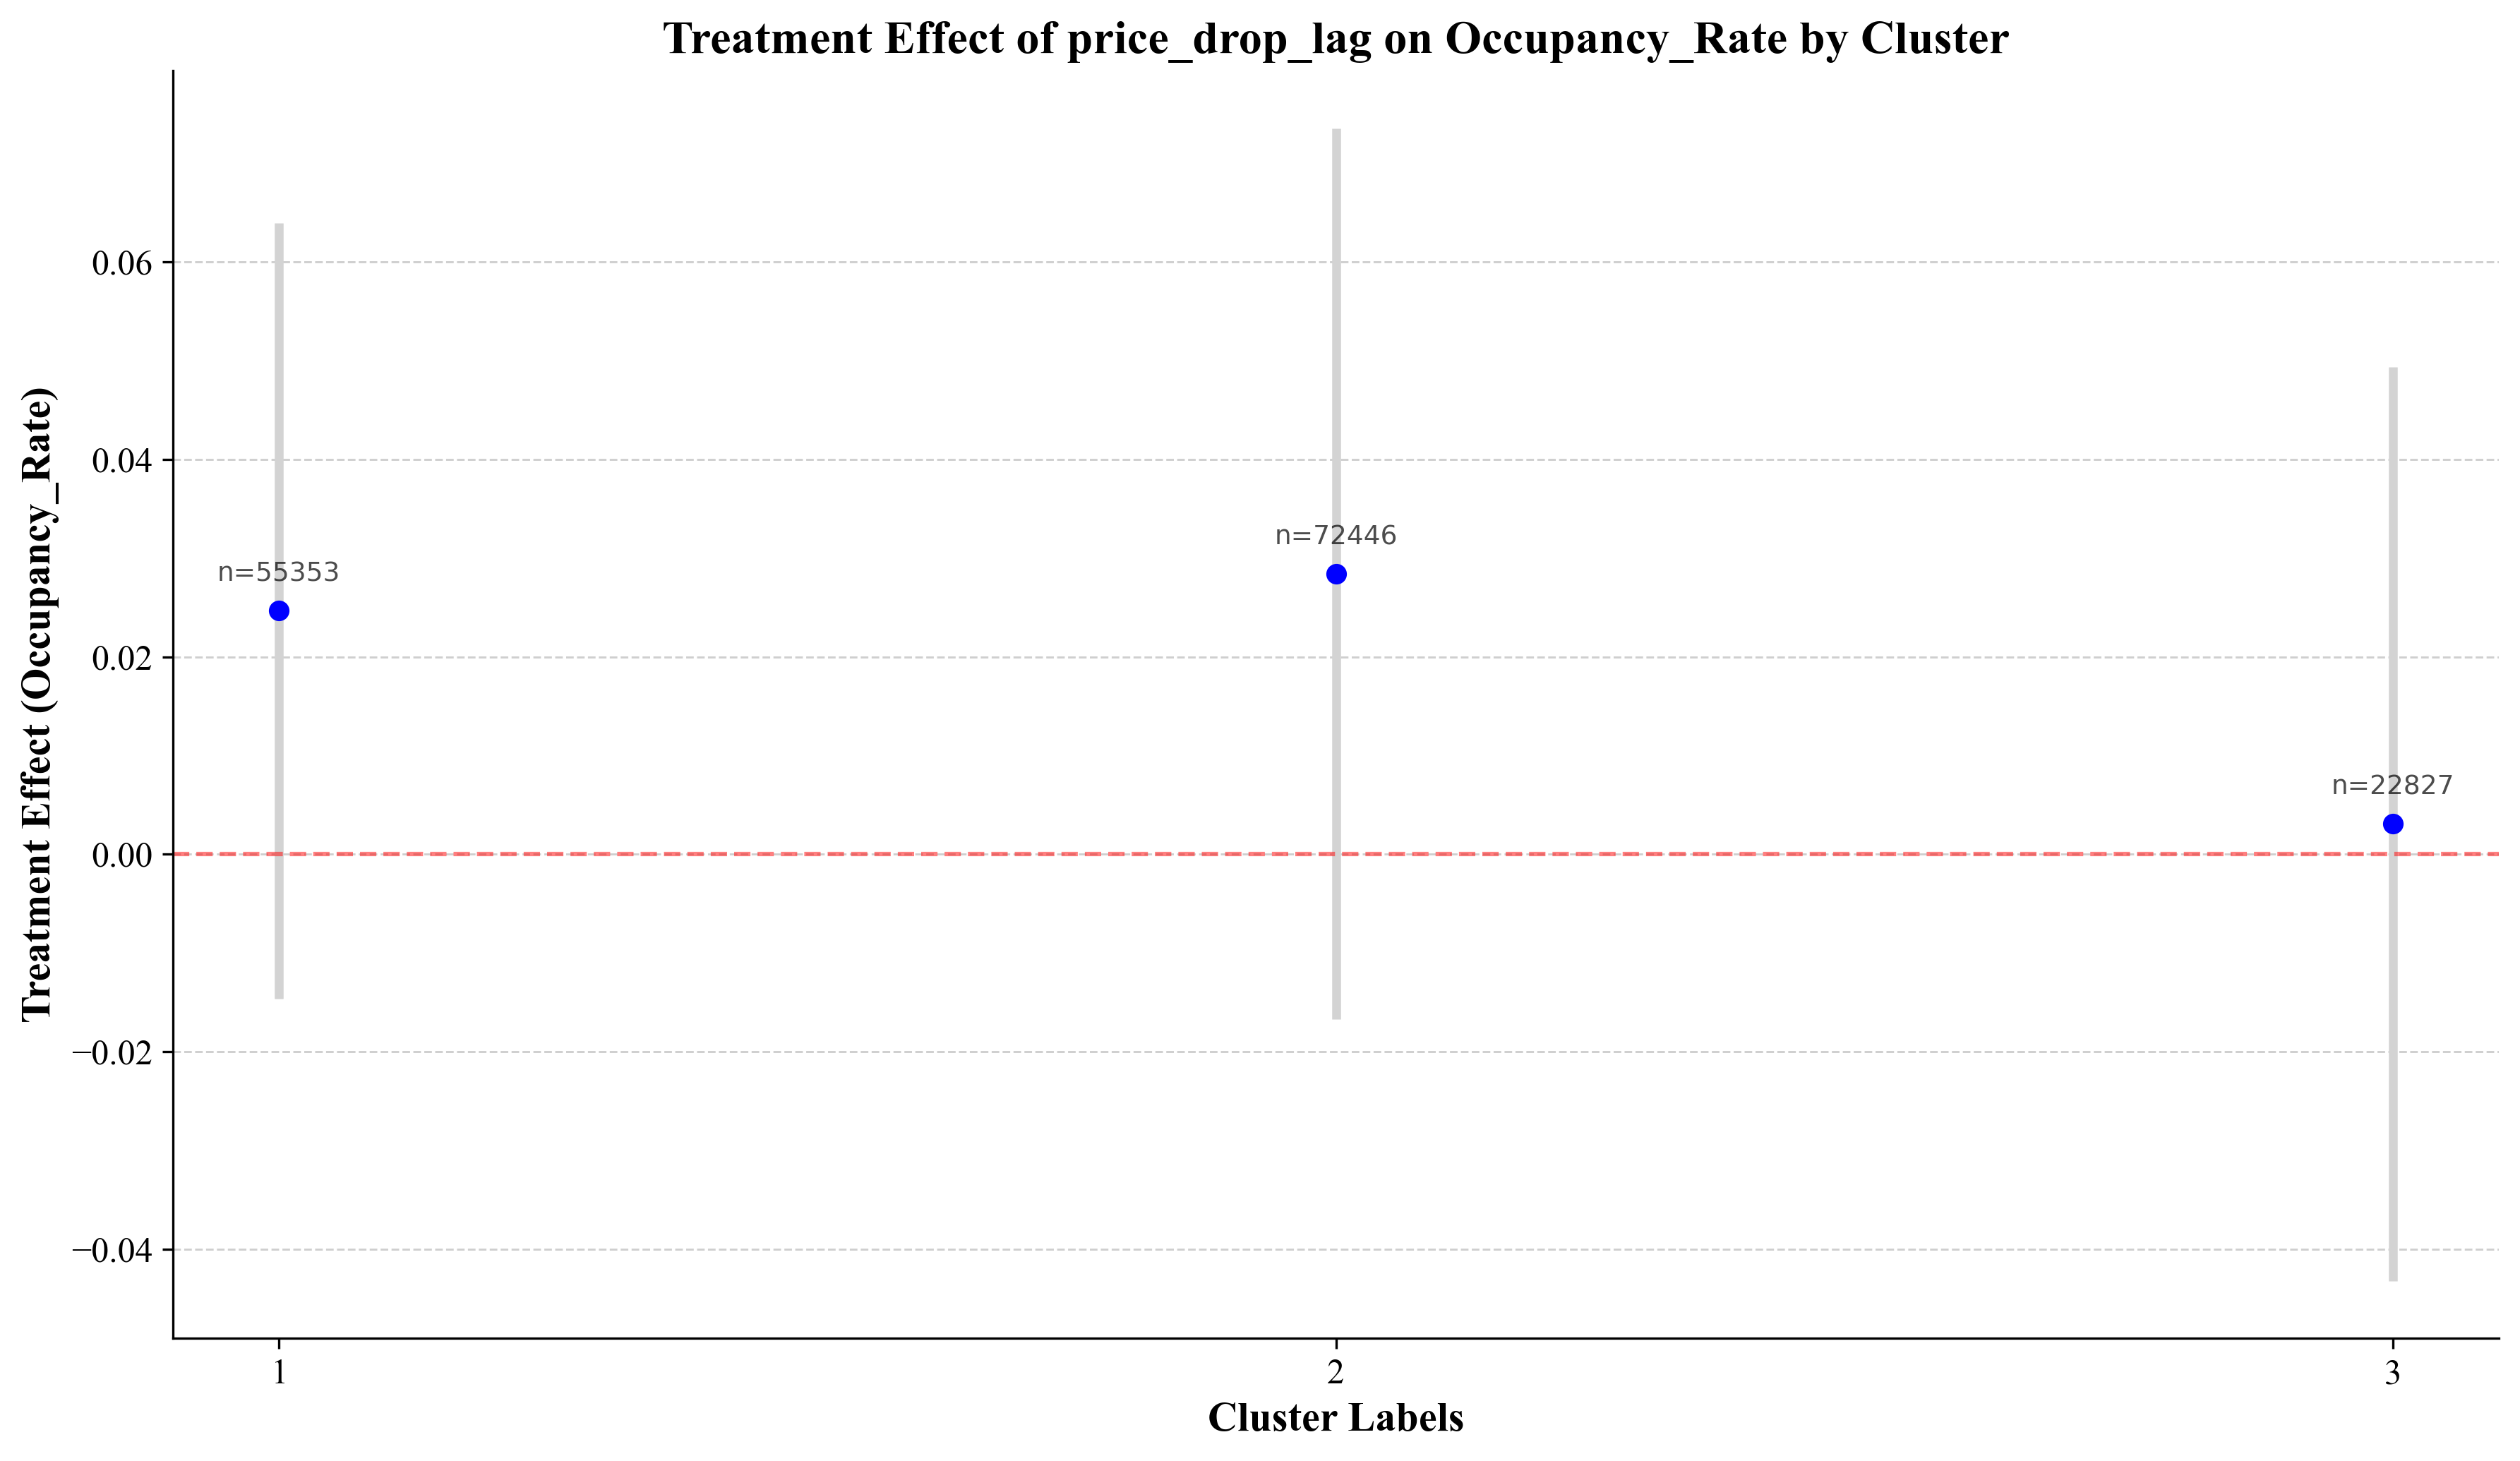

Cluster 3.0: Treatment Effect = 0.0031 (std = 0.0463, n = 22827)
Cluster 2.0: Treatment Effect = 0.0284 (std = 0.0451, n = 72446)
Cluster 1.0: Treatment Effect = 0.0247 (std = 0.0393, n = 55353)

Analyzing ADR_USD with treatment price_surge_lag


/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' i

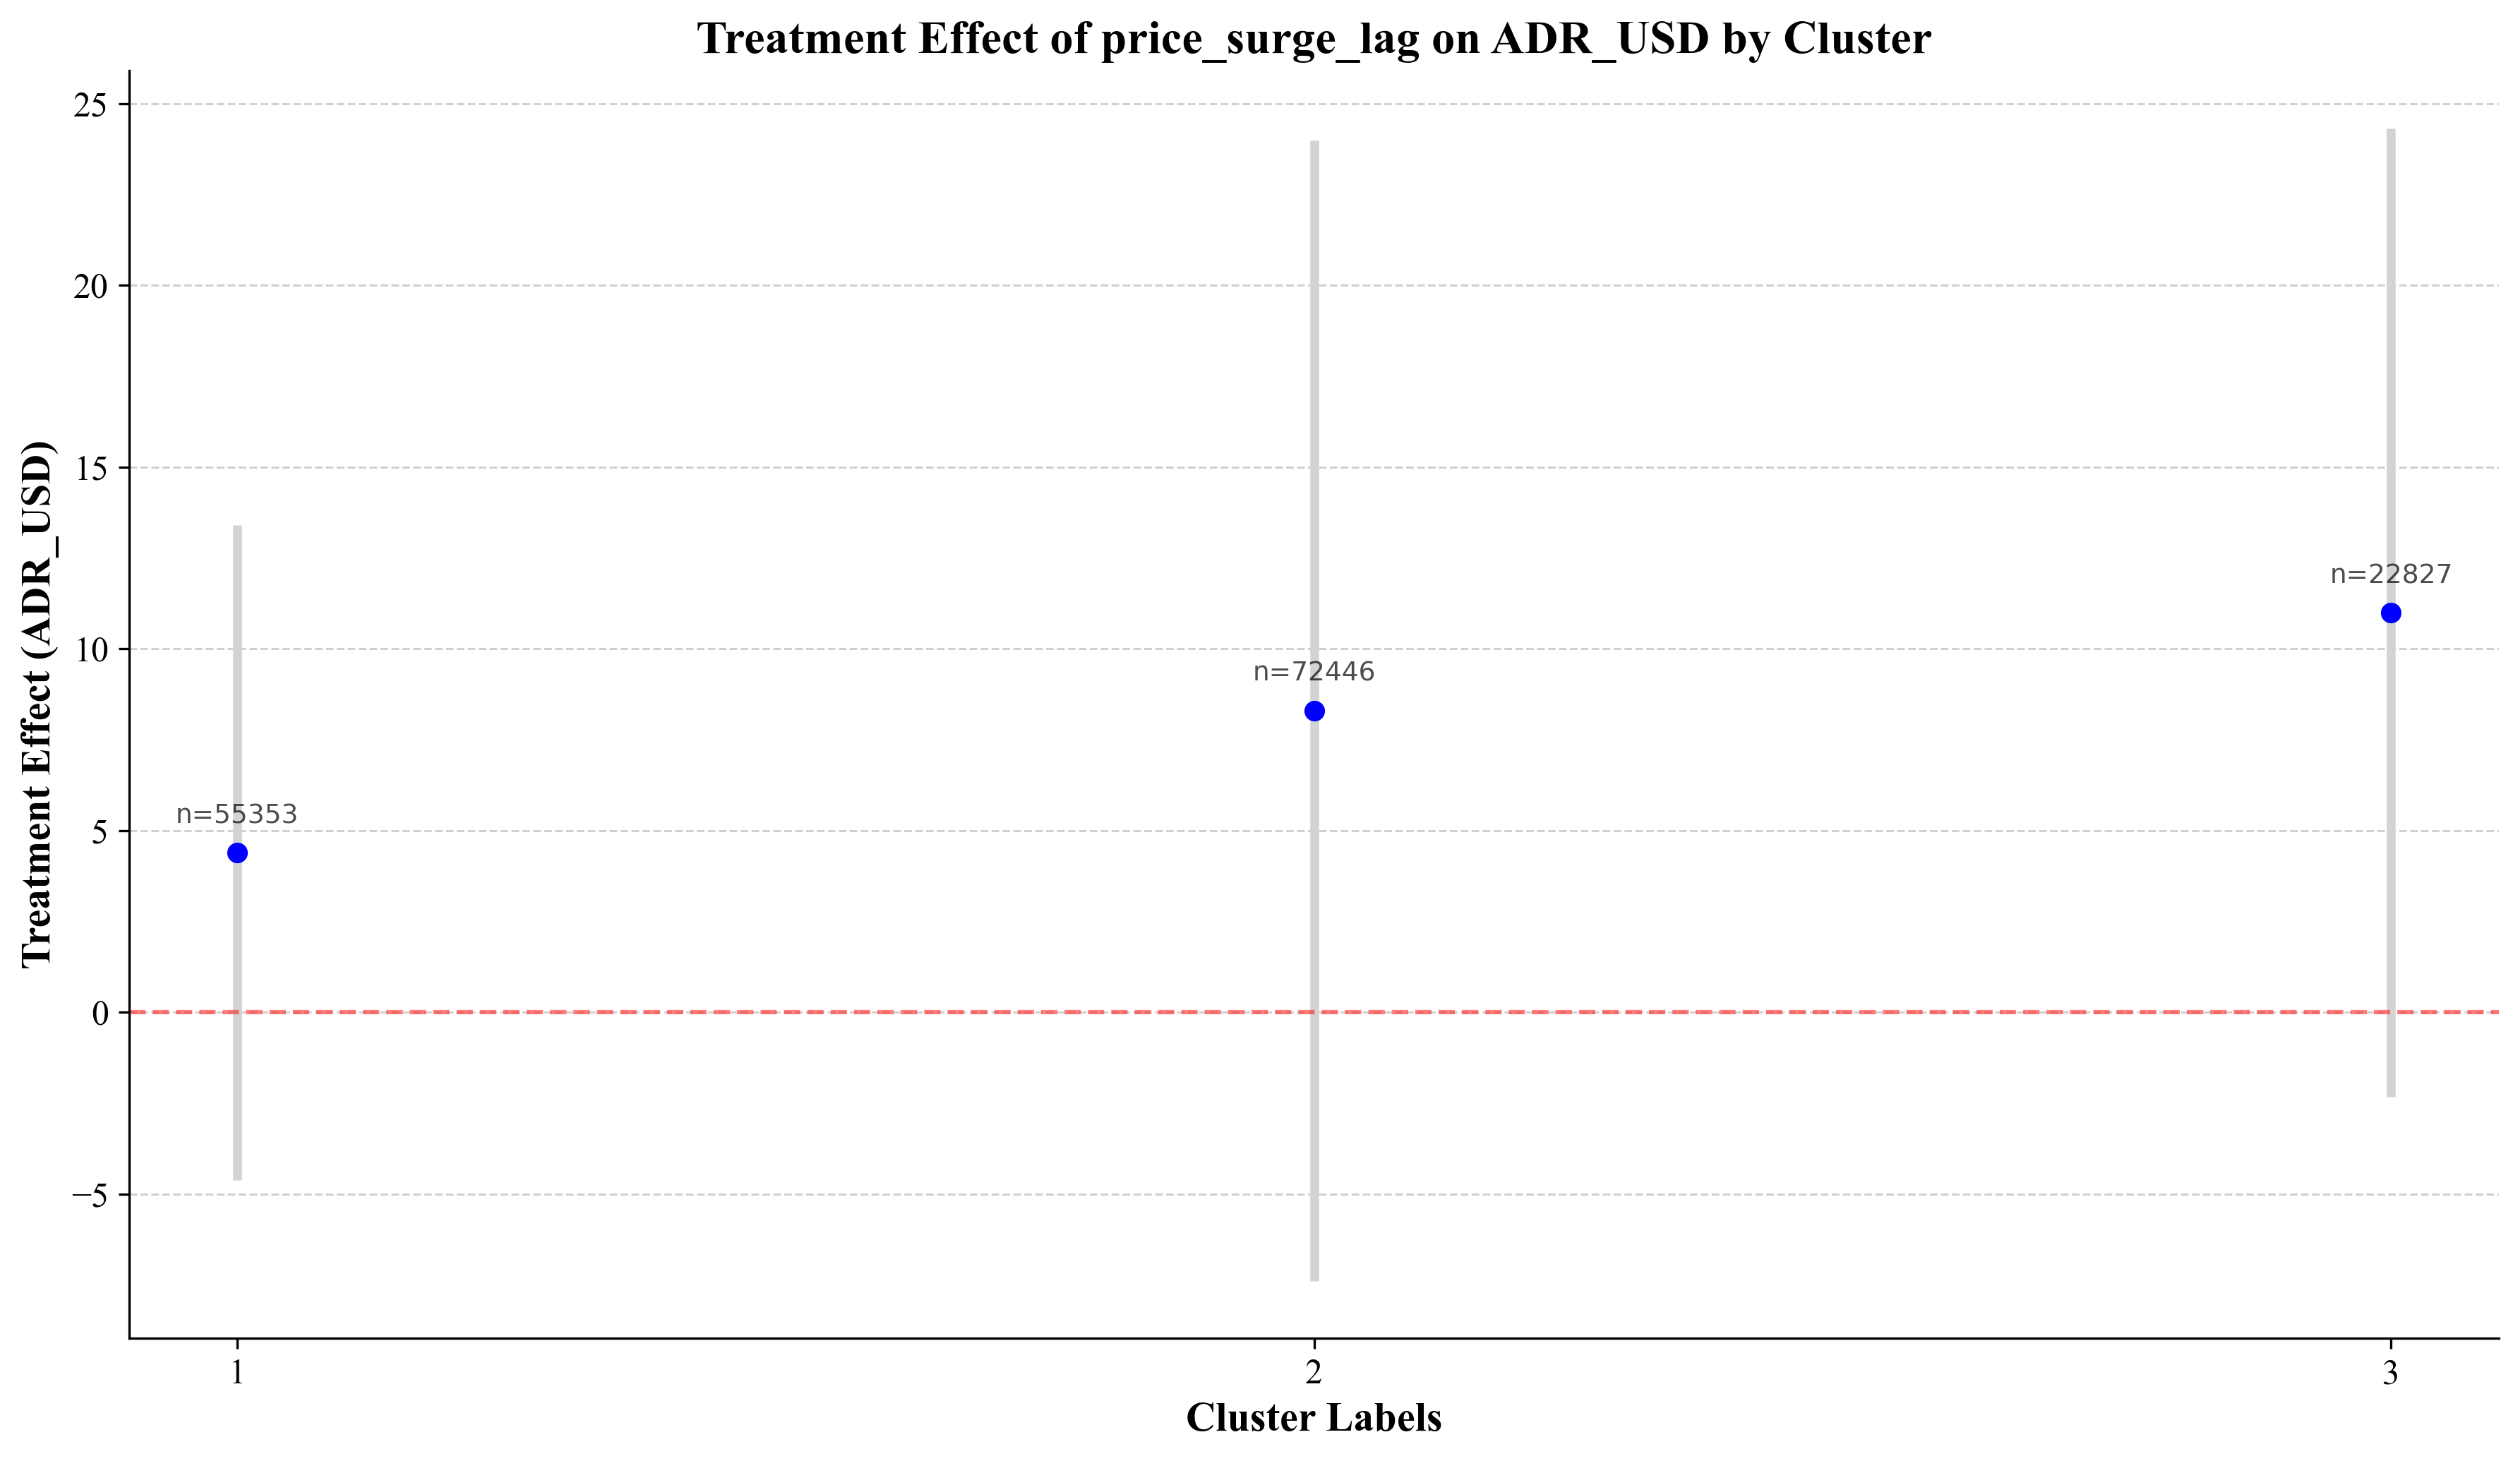

Cluster 3.0: Treatment Effect = 10.9979 (std = 13.3201, n = 22827)
Cluster 2.0: Treatment Effect = 8.3024 (std = 15.6871, n = 72446)
Cluster 1.0: Treatment Effect = 4.3881 (std = 9.0123, n = 55353)

Analyzing ADR_USD with treatment price_drop_lag


/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' i

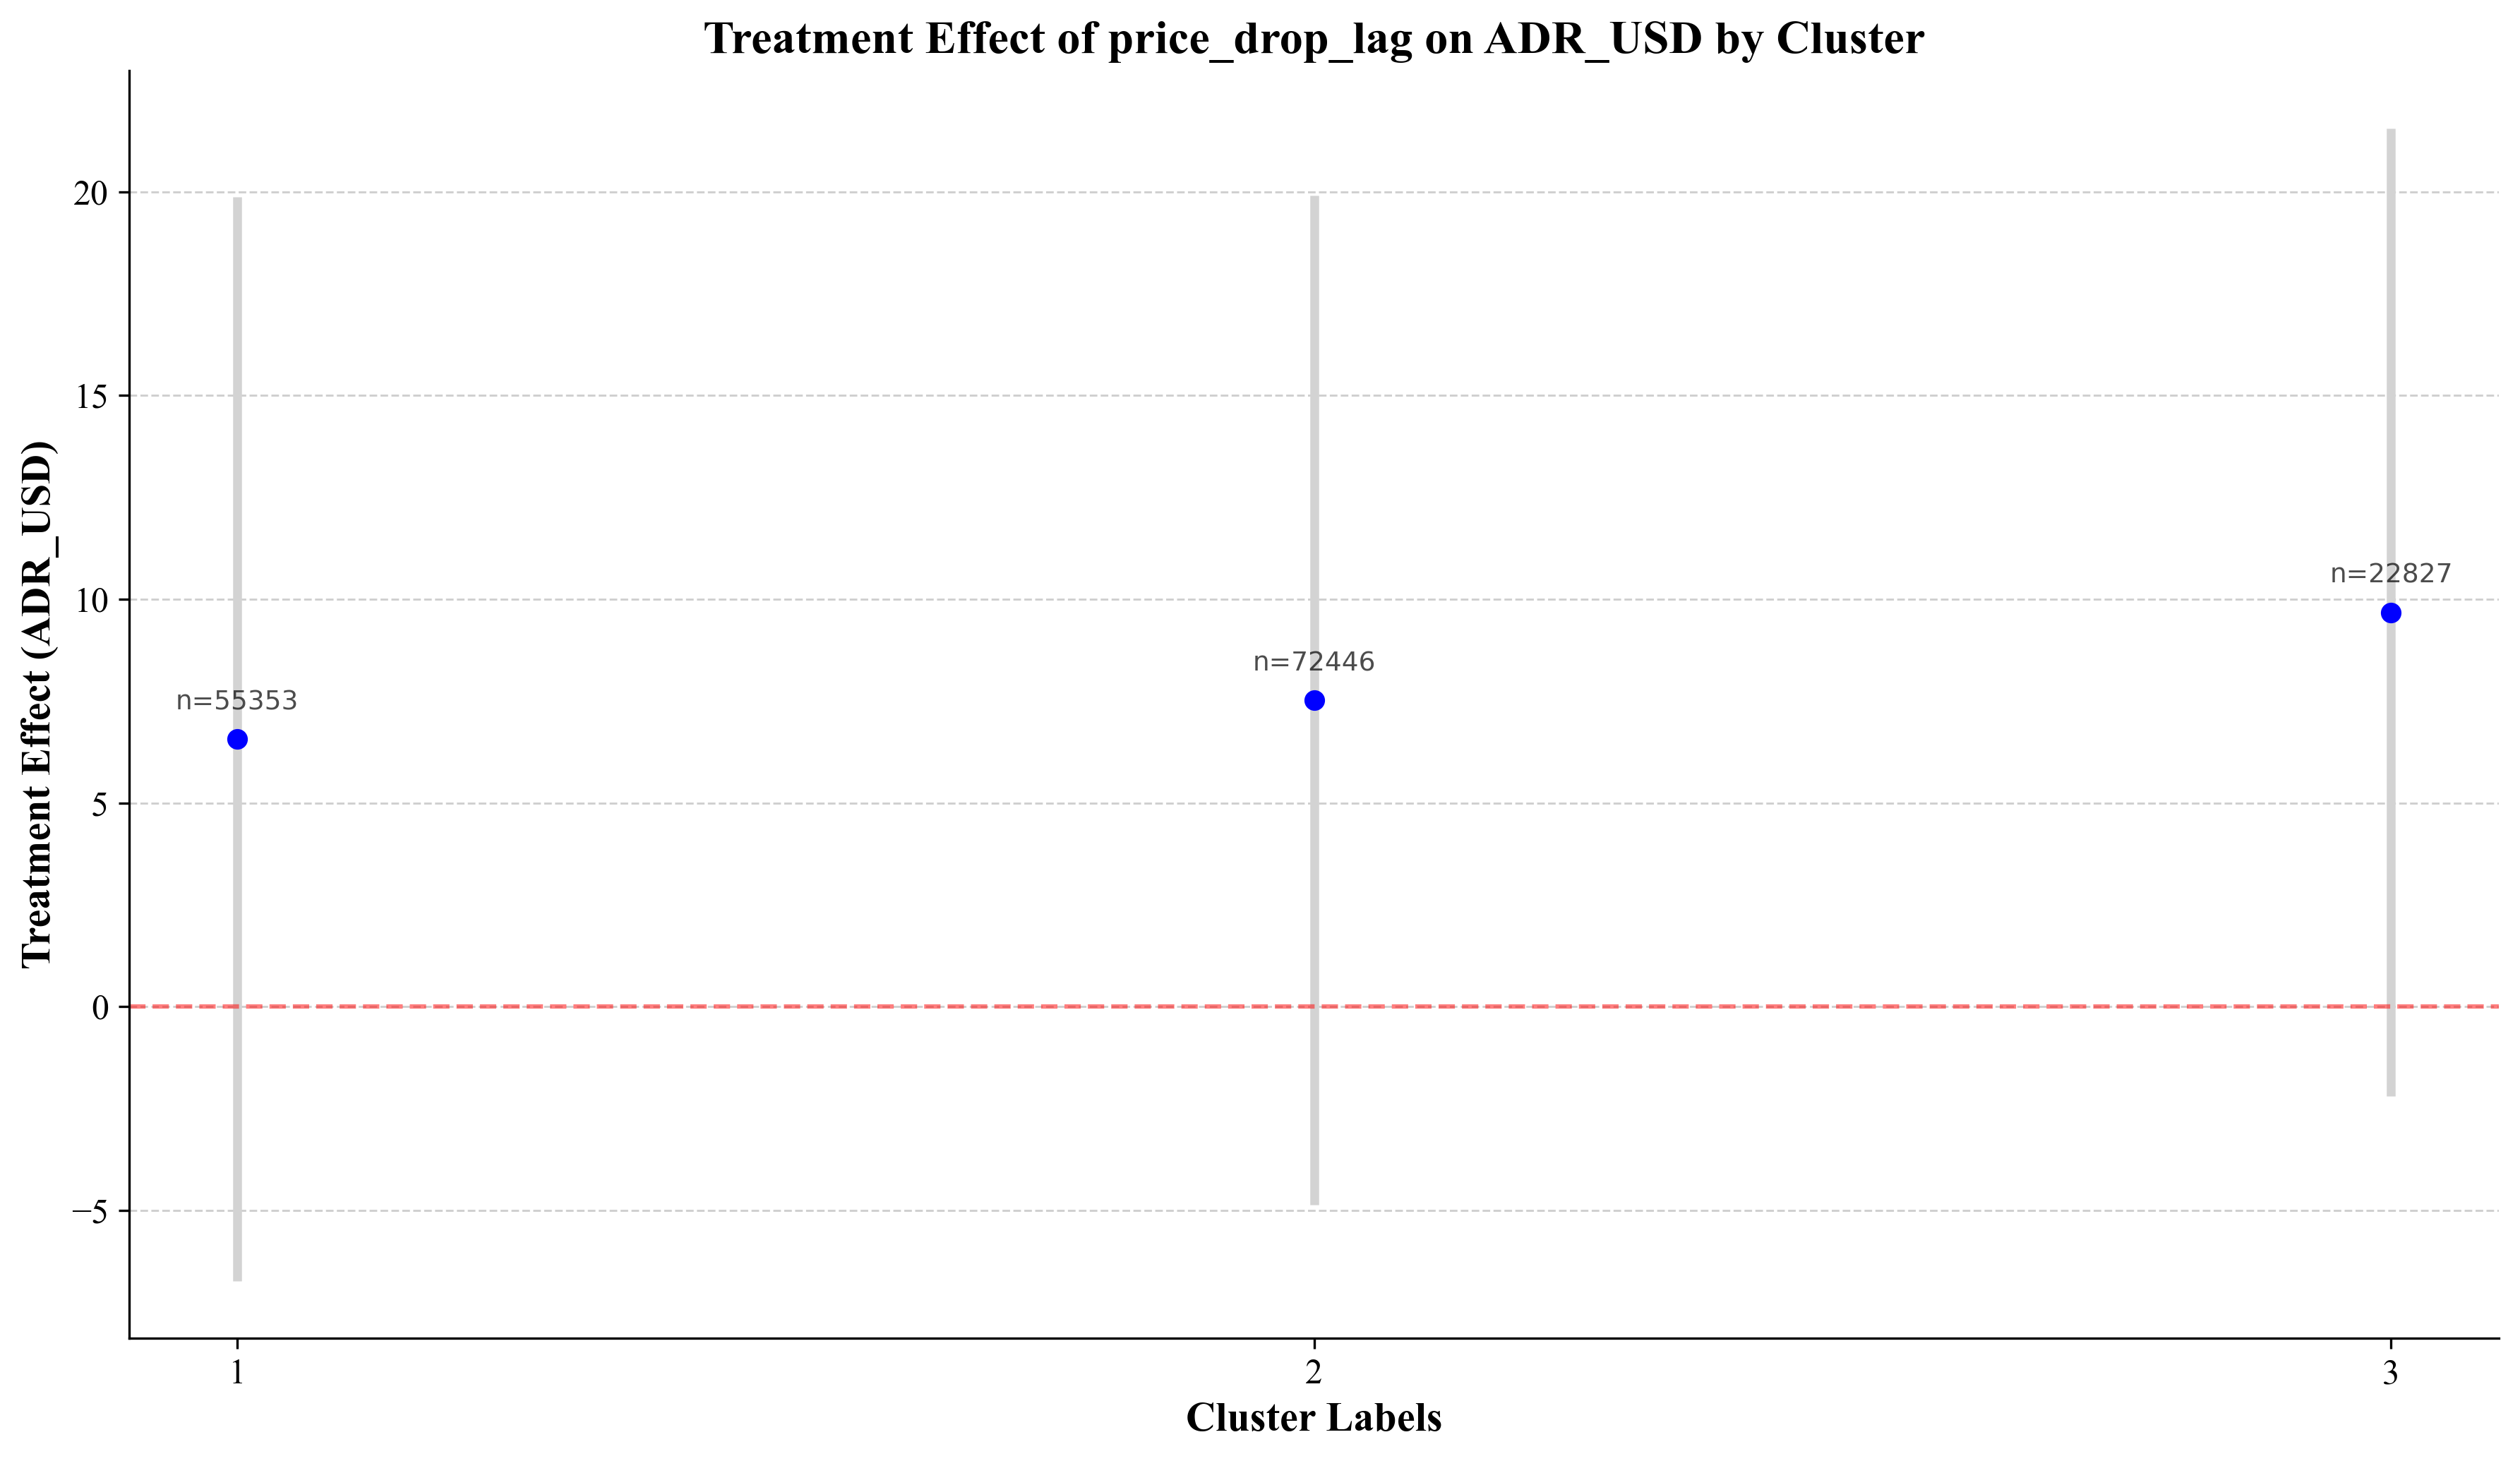

Cluster 3.0: Treatment Effect = 9.6799 (std = 11.8811, n = 22827)
Cluster 2.0: Treatment Effect = 7.5186 (std = 12.3873, n = 72446)
Cluster 1.0: Treatment Effect = 6.5731 (std = 13.2974, n = 55353)

Analyzing Revenue_USD with treatment price_surge_lag


/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' i

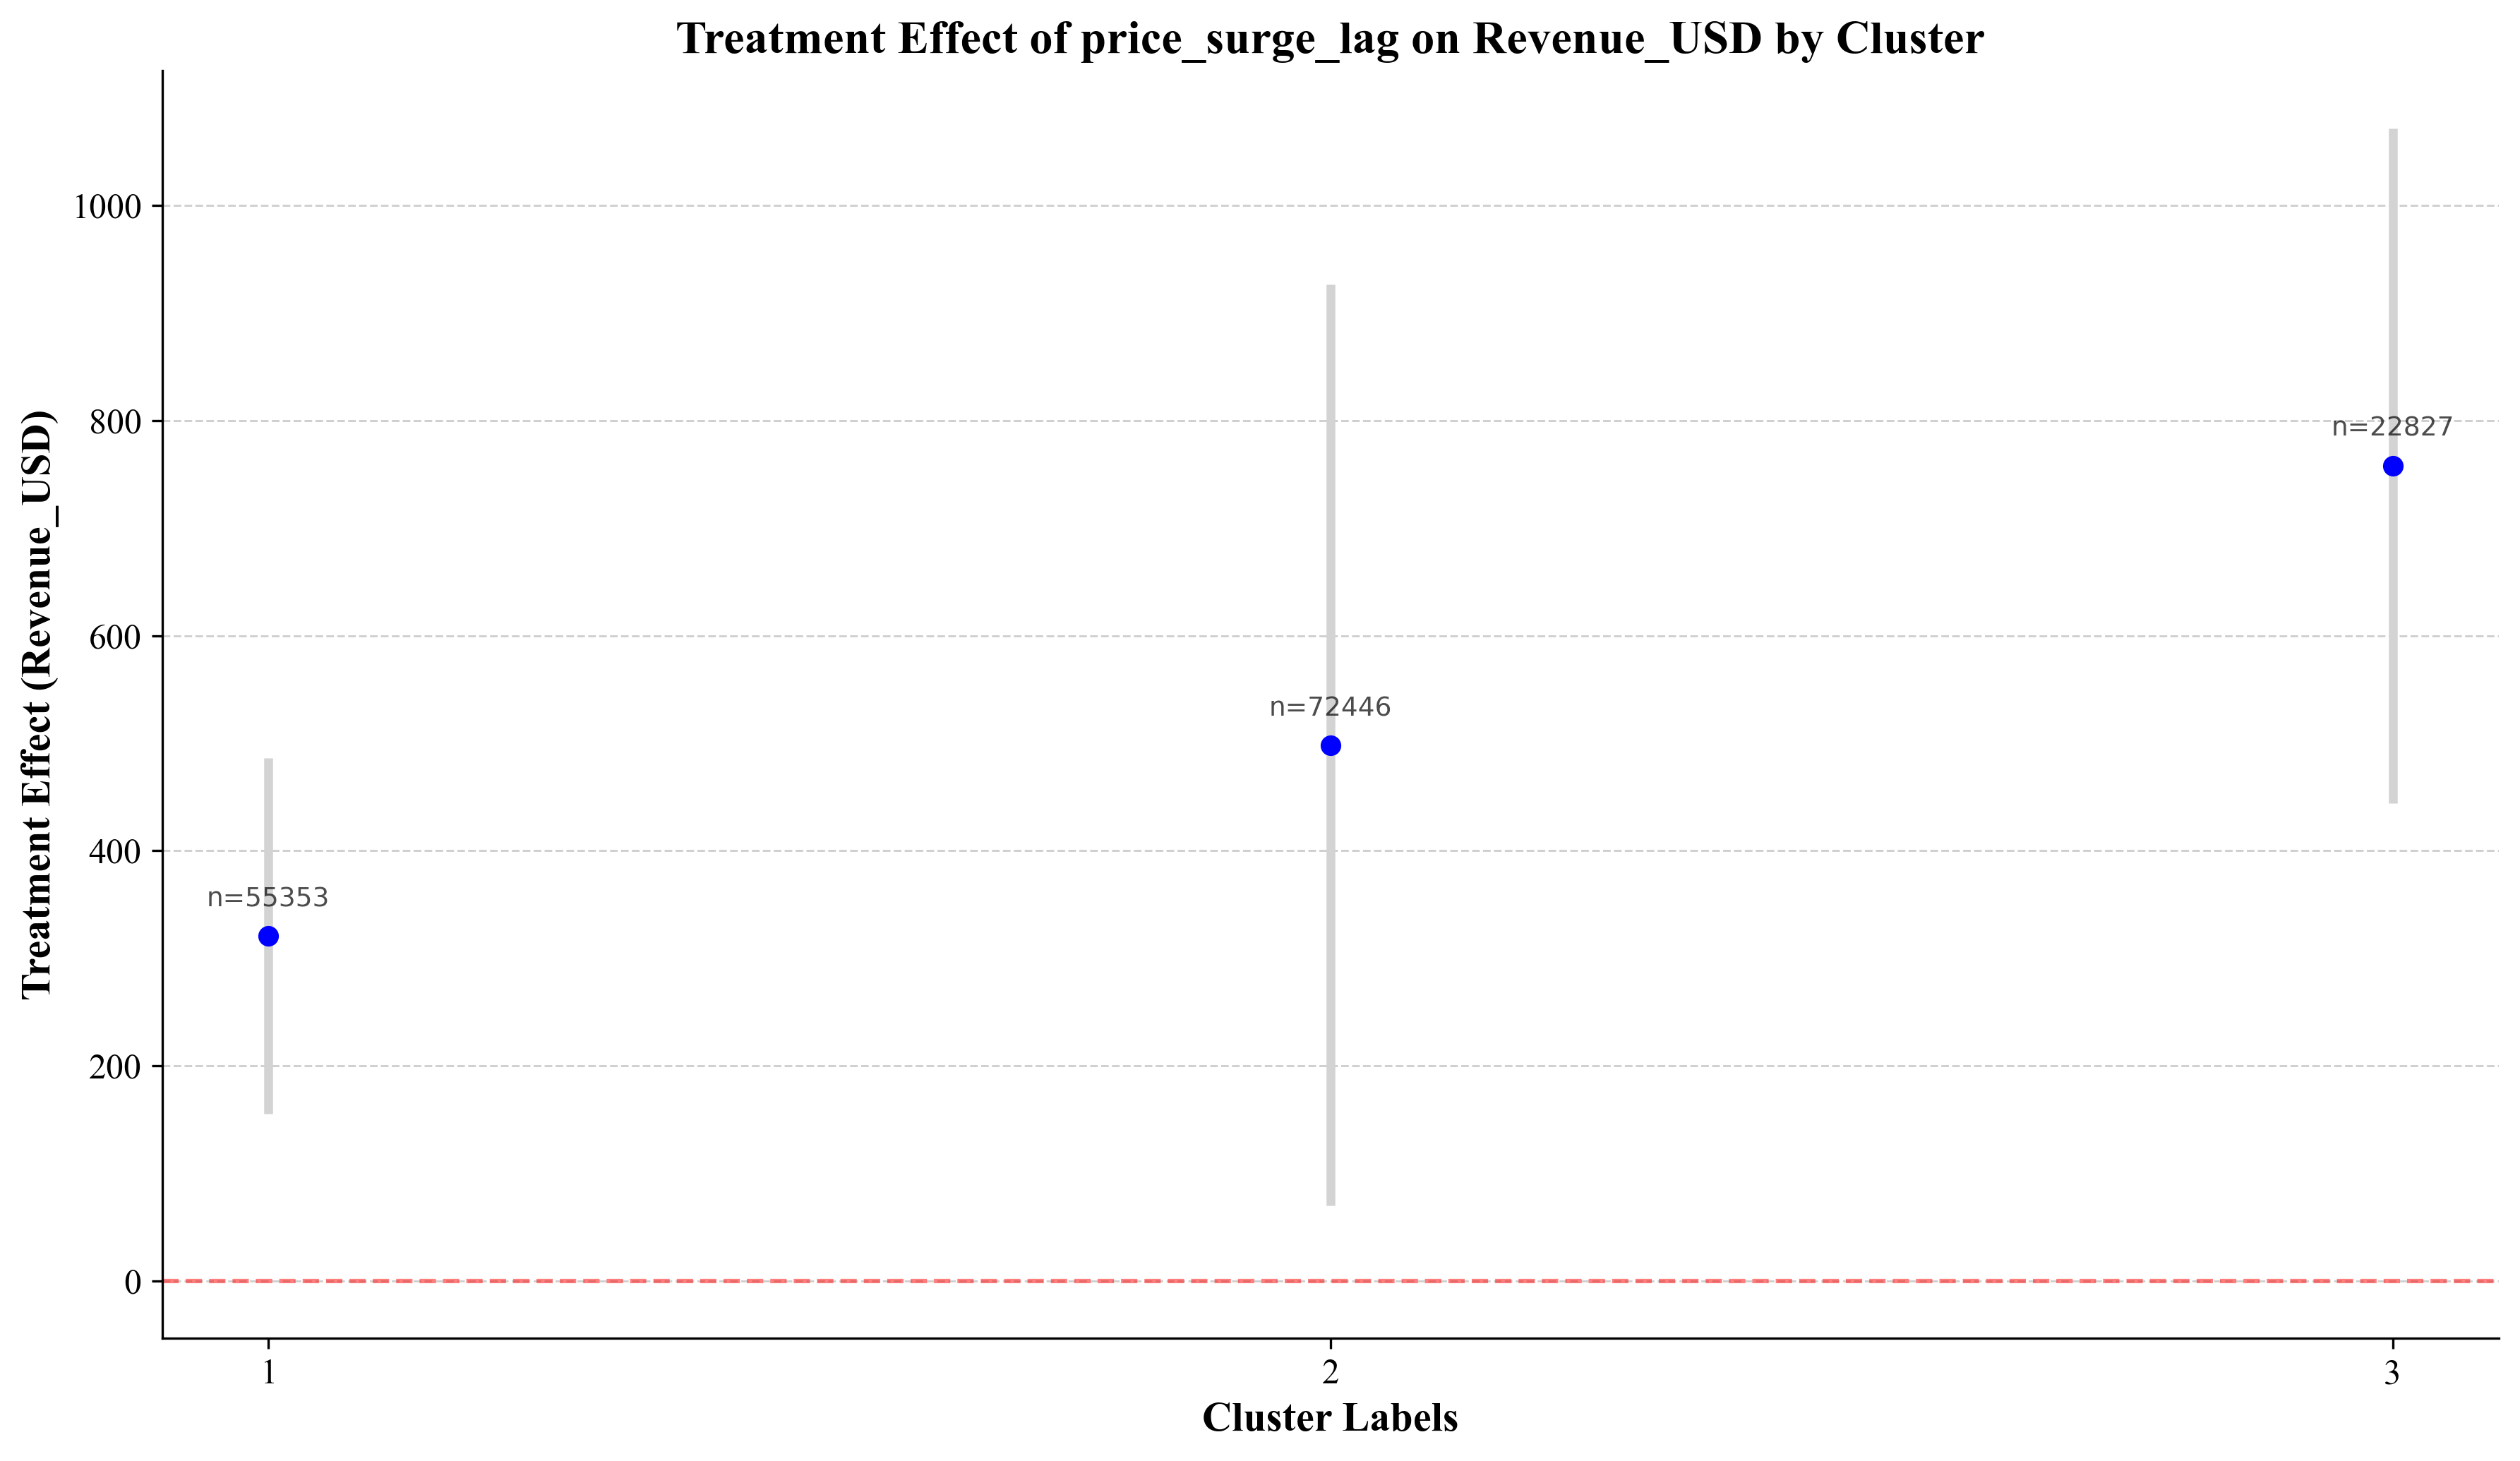

Cluster 3.0: Treatment Effect = 758.1579 (std = 313.7763, n = 22827)
Cluster 2.0: Treatment Effect = 498.0707 (std = 428.3278, n = 72446)
Cluster 1.0: Treatment Effect = 320.5341 (std = 165.5770, n = 55353)

Analyzing Revenue_USD with treatment price_drop_lag


/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' i

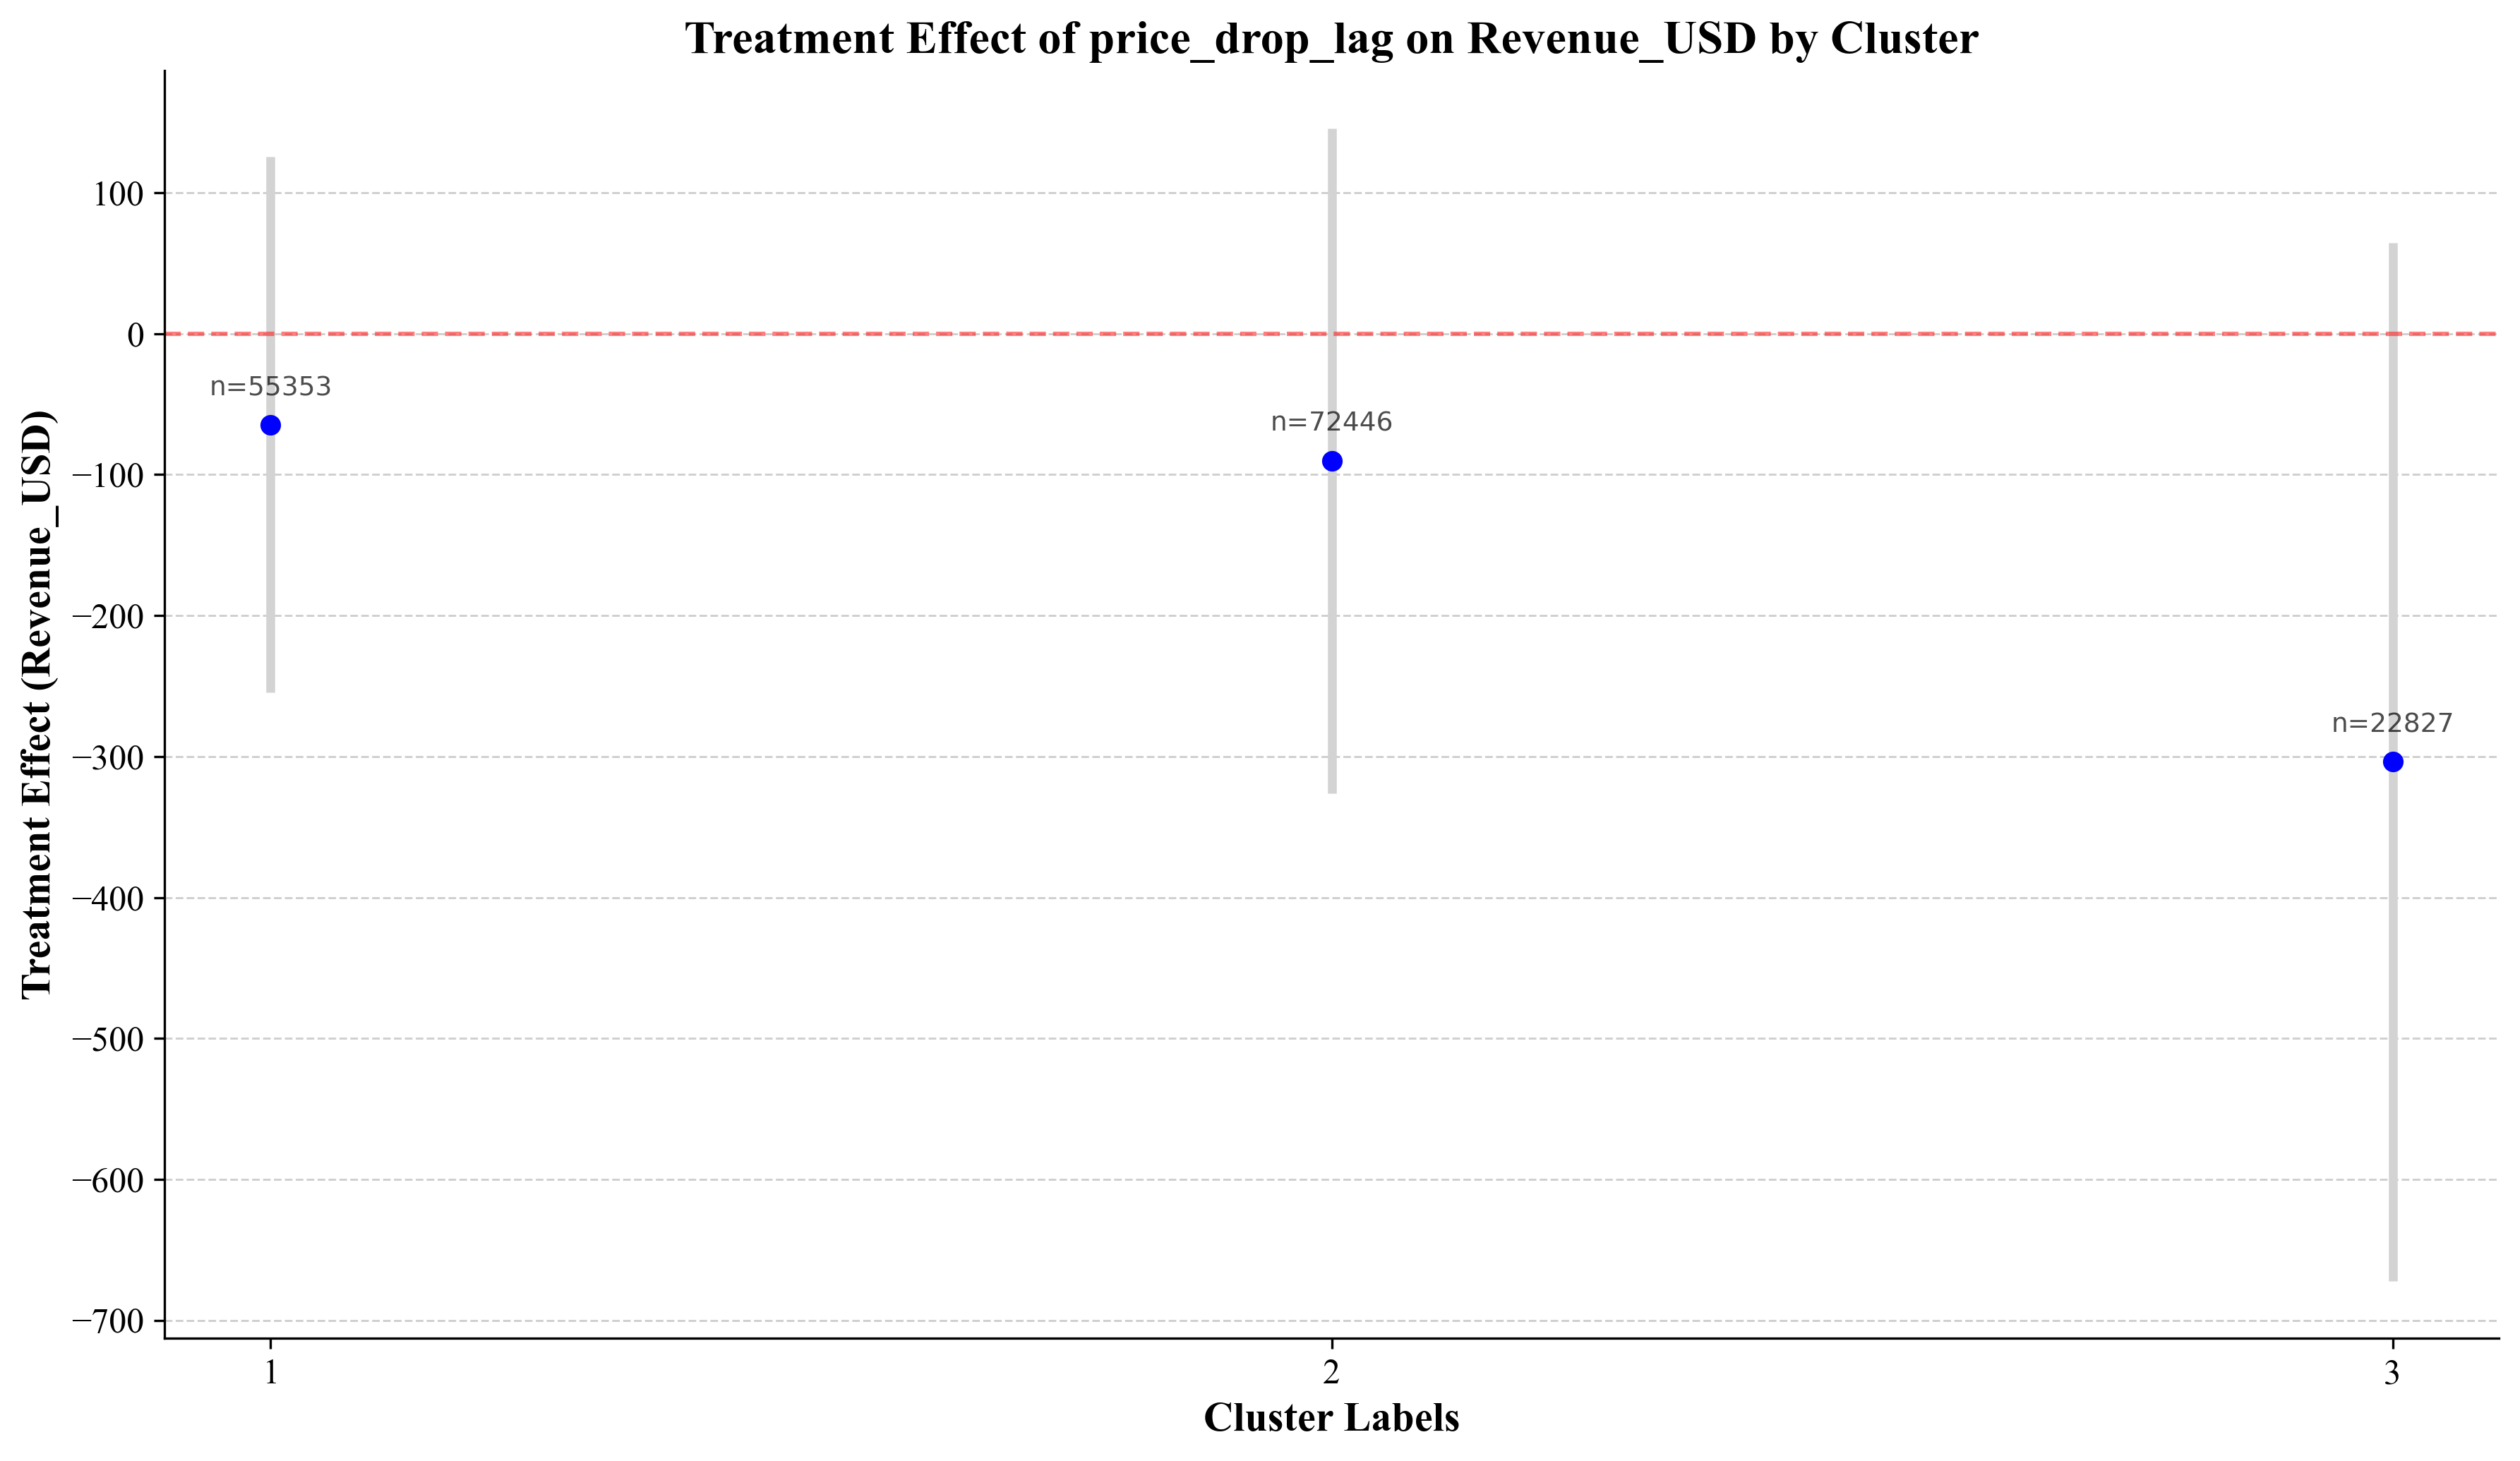

Cluster 3.0: Treatment Effect = -303.7207 (std = 368.1336, n = 22827)
Cluster 2.0: Treatment Effect = -90.1111 (std = 235.7777, n = 72446)
Cluster 1.0: Treatment Effect = -64.6295 (std = 189.9006, n = 55353)


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from econml.dml import LinearDML
from sklearn.linear_model import Lasso, LogisticRegression

# Define constants for column names
OUTCOME_COLUMNS = {
    'occupancy': 'Occupancy_Rate',
    'adr': 'ADR_USD',
    'revenue': 'Revenue_USD'
}

TREATMENT_COLUMNS = {
    'price_surge': 'price_surge_lag',
    'price_drop': 'price_drop_lag',
}

COVARIATE_COLUMNS = [
    'Max_Guests', 'Minimum_Stay', 'Number_of_Photos', 
    'Number_of_Reviews', 'Response_Rate', 'Response_Time'
]

def estimate_treatment_effects(
    df, 
    y_col, 
    t_col, 
    w_cols, 
    clusters_col='Cluster_Labels', 
    min_samples=50,
    skip_clusters=None,
    alpha=0.2, 
    seed=42
):
    """
    Estimate treatment effects using LinearDML for each cluster and plot the results.

    Parameters:
    ----------
    df : pandas.DataFrame
        DataFrame containing the data.
    y_col : str
        The outcome variable column name.
    t_col : str
        The treatment variable column name.
    w_cols : list
        List of covariate column names.
    clusters_col : str, optional
        The column name for cluster labels. Default is 'Cluster_Labels'.
    min_samples : int, optional
        Minimum number of samples required for a cluster. Default is 50.
    skip_clusters : list or None, optional
        List of cluster IDs to skip. Default is None.
    alpha : float, optional
        Alpha parameter for Lasso regression. Default is 0.2.
    seed : int, optional
        Random seed for reproducibility. Default is 42.

    Returns:
    -------
    dict
        Dictionary containing treatment effect statistics for each cluster.
    """
    # Initialize models with parameters
    outcome_model = Lasso(alpha=alpha, random_state=seed)
    treatment_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=seed)

    # Initialize the LinearDML model
    linear_dml = LinearDML(
        model_y=outcome_model,
        model_t=treatment_model,
        discrete_treatment=True,
        random_state=seed
    )

    # Set default skip_clusters if None
    if skip_clusters is None:
        skip_clusters = [0]  # Default to skip cluster 0
    
    # Dictionary to store results
    results = {}

    # Get unique clusters excluding ones to skip
    unique_clusters = [c for c in df[clusters_col].unique() if c not in skip_clusters]
    
    # Iterate over each unique cluster
    for cluster in unique_clusters:
        # Filter data for the current cluster
        cluster_data = df[df[clusters_col] == cluster]

        # Drop rows with missing values in the specified columns
        cluster_data = cluster_data.dropna(subset=[y_col, t_col] + w_cols)

        # Check if there are enough samples for the current cluster
        if len(cluster_data) < min_samples:
            print(f"Not enough samples for Cluster {cluster}. Skipping...")
            continue

        try:
            # Fit the LinearDML model
            linear_dml.fit(
                Y=cluster_data[y_col],
                T=cluster_data[t_col],
                X=cluster_data[w_cols]
            )

            # Estimate the treatment effect
            treatment_effect = linear_dml.effect(cluster_data[w_cols])

            # Store the results
            results[cluster] = {
                'treatment_effect': treatment_effect,
                'mean': np.mean(treatment_effect),
                'std': np.std(treatment_effect),
                'sample_size': len(cluster_data)
            }
        except Exception as e:
            print(f"Error processing cluster {cluster}: {str(e)}")
            continue

    # Only create plot if we have results
    if results:
        _plot_treatment_effects(results, y_col, t_col)
    else:
        print(f"No valid results to plot for {y_col} with treatment {t_col}")

    # Print the treatment effect for each cluster
    for cluster, result in results.items():
        print(f"Cluster {cluster}: Treatment Effect = {result['mean']:.4f} "
              f"(std = {result['std']:.4f}, n = {result['sample_size']})")

    return results


def _plot_treatment_effects(results, y_col, t_col):
    """
    Helper function to plot treatment effects.
    
    Parameters:
    ----------
    results : dict
        Dictionary containing treatment effect results.
    y_col : str
        The outcome variable column name.
    t_col : str
        The treatment variable column name.
    """
    # Sort clusters for consistent plots
    sorted_clusters = sorted(results.keys())
    
    plt.figure(figsize=(12, 7), dpi=300)  # High resolution for publication
    
    plt.errorbar(
        sorted_clusters,
        [results[cluster]['mean'] for cluster in sorted_clusters],
        yerr=[results[cluster]['std'] for cluster in sorted_clusters],
        fmt='o',
        color='b',
        ecolor='lightgray',
        elinewidth=3,
        capsize=0
    )
    
    # Add horizontal line at y=0 for reference
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
    
    # Set plot labels and styling
    plt.xlabel('Cluster Labels', fontsize=14, fontweight='bold', fontname='Times New Roman')
    plt.ylabel(f'Treatment Effect ({y_col})', fontsize=14, fontweight='bold', fontname='Times New Roman')
    plt.title(f'Treatment Effect of {t_col} on {y_col} by Cluster', 
              fontsize=16, fontweight='bold', fontname='Times New Roman')
    
    plt.xticks(sorted_clusters, fontsize=12, fontname='Times New Roman')
    plt.yticks(fontsize=12, fontname='Times New Roman')
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
    
    # Remove top and right spines for cleaner look
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Add sample size annotation
    for i, cluster in enumerate(sorted_clusters):
        plt.annotate(
            f"n={results[cluster]['sample_size']}", 
            xy=(cluster, results[cluster]['mean']),
            xytext=(0, 10),
            textcoords='offset points',
            ha='center',
            fontsize=9,
            alpha=0.7
        )
    
    plt.tight_layout()
    plt.show()


def run_all_analyses(df, outcome_cols=None, treatment_cols=None, covariate_cols=None):
    """
    Run treatment effect analyses for all combinations of outcomes and treatments.
    
    Parameters:
    ----------
    df : pandas.DataFrame
        DataFrame containing the data.
    outcome_cols : dict or None, optional
        Dictionary of outcome column names. Default uses global OUTCOME_COLUMNS.
    treatment_cols : dict or None, optional
        Dictionary of treatment column names. Default uses global TREATMENT_COLUMNS.
    covariate_cols : list or None, optional
        List of covariate column names. Default uses global COVARIATE_COLUMNS.
        
    Returns:
    -------
    dict
        Nested dictionary containing all results.
    """
    # Use default columns if not provided
    outcome_cols = outcome_cols or OUTCOME_COLUMNS
    treatment_cols = treatment_cols or TREATMENT_COLUMNS
    covariate_cols = covariate_cols or COVARIATE_COLUMNS
    
    # Dictionary to store all results
    all_results = {}
    
    # Iterate through all combinations
    for outcome_name, y_col in outcome_cols.items():
        all_results[outcome_name] = {}
        for treatment_name, t_col in treatment_cols.items():
            print(f"\n{'='*50}")
            print(f"Analyzing {y_col} with treatment {t_col}")
            print(f"{'='*50}")
            
            results = estimate_treatment_effects(
                df, 
                y_col=y_col, 
                t_col=t_col, 
                w_cols=covariate_cols
            )
            
            all_results[outcome_name][treatment_name] = results
    
    return all_results

try:
    df_chicago
    print("Running analysis on Chicago dataset...")
    all_results = run_all_analyses(df_chicago)
except NameError:
    print("df_chicago not found. Please load your data before running this script.")

##### As the observations of cluster 0 is too small, it is dropped in the data analysis.

### If a crime occurs, how much does the price need to drop to keep Y “constant”?
- X: delta price
- T: crime related variable (if in the past month, crime happened within 1 mile radius, code as 1; otherwise, code as 0)
- Y: occupancy rate, ADR, revenue
- W: others all take as control variables

##### Define severe crime:
​In criminal justice, the term "severe crime" is often synonymous with "violent crime," encompassing offenses that involve force or the threat of force against individuals. According to the Federal Bureau of Investigation (FBI), violent crimes include:​
ucr.fbi.gov

- Murder and Nonnegligent Manslaughter: The willful (nonnegligent) killing of one human being by another.​
- Rape: Penetration, no matter how slight, of the vagina or anus with any body part or object, or oral penetration by a sex organ of another person, without the consent of the victim.​
- Robbery: The taking or attempting to take anything of value from the care, custody, or control of a person or persons by force or threat of force or violence and/or by putting the victim in fear.​
- Aggravated Assault: An unlawful attack by one person upon another wherein the offender uses a weapon or displays it in a threatening manner, or the victim suffers obvious severe or aggravated bodily injury.​

In [40]:
df_chicago.head()

Property_ID       Date  Price_USD  Airbnb_Property_ID     ADR_USD  Airbnb_Accuracy_Rating  Airbnb_Checkin_Rating  Airbnb_Cleanliness_Rating  Airbnb_Communication_Rating  Airbnb_HOST_ID  Airbnb_Location_Rating Airbnb_Superhost  Airbnb_Value_Rating                                                                                                                                                                                                                                                                                                                                                                                                                                            Amenities  Bathrooms  Bedrooms     City  Cleaning_Fee_USD  Count_Available_Days_LTM  Count_Reservation_Days_LTM        Country Created_Date Currency_USD  Extra_People_Fee Has_Air_Con Has_Gym Has_Hot_Tub Has_Kitchen Has_Parking Has_Pool  Host_Type Last_Calendar_Update  Latitude  Longitude     Listing_Type  \
15  abnb_1000071427632382596 2022-10-01   266.0000        1.000071e+18  294.509709                    10.0                   10.0                        9.0                         10.0       1118796.0                    10.0             True                  9.0  ["ac","city_view","dedicated_workspace","dishes_and_silverware","dishwasher","dryer","essentials","fire_extinguisher","fire_pit","first_aid_kit","gym","hair_dryer","hangers","heating","hot_water","hottub","internet","iron","kitchen","lockbox","microwave","oven","parking","pool","pool_table","refrigerator_or_freezer","sauna","self_checkin","shampoo","smoke_detector","stove","toaster","tv","washer","wine_glasses","wireless_internet"]        2.0       2.0  Chicago              90.0                       7.0                       206.0  United States   2023-10-14          usd               NaN        True    True        True        True        True     True  21+ Units  2024-11-04 06:03:47  41.87121  -87.63161  Entire home/apt   
16  abnb_1000071427632382596 2022-11-01   262.5333        1.000071e+18  294.509709                    10.0                   10.0                        9.0                         10.0       1118796.0                    10.0             True                  9.0  ["ac","city_view","dedicated_workspace","dishes_and_silverware","dishwasher","dryer","essentials","fire_extinguisher","fire_pit","first_aid_kit","gym","hair_dryer","hangers","heating","hot_water","hottub","internet","iron","kitchen","lockbox","microwave","oven","parking","pool","pool_table","refrigerator_or_freezer","sauna","self_checkin","shampoo","smoke_detector","stove","toaster","tv","washer","wine_glasses","wireless_internet"]        2.0       2.0  Chicago              90.0                       7.0                       206.0  United States   2023-10-14          usd               NaN        True    True        True        True        True     True  21+ Units  2024-11-04 06:03:47  41.87121  -87.63161  Entire home/apt   
17  abnb_1000071427632382596 2022-12-01   233.0000        1.000071e+18  294.509709                    10.0                   10.0                        9.0                         10.0       1118796.0                    10.0             True                  9.0  ["ac","city_view","dedicated_workspace","dishes_and_silverware","dishwasher","dryer","essentials","fire_extinguisher","fire_pit","first_aid_kit","gym","hair_dryer","hangers","heating","hot_water","hottub","internet","iron","kitchen","lockbox","microwave","oven","parking","pool","pool_table","refrigerator_or_freezer","sauna","self_checkin","shampoo","smoke_detector","stove","toaster","tv","washer","wine_glasses","wireless_internet"]        2.0       2.0  Chicago              90.0                       7.0                       206.0  United States   2023-10-14          usd               NaN        True    True        True        True        True     True  21+ Units  2024-11-04 06:03:47  41.87121  -87.63161  Entire home/apt   
18  abnb_10000714

In [43]:
# Function to calculate crime occurrence within radius for properties
def calculate_crime_proximity(property_df, crime_df, radius_miles=1.5):
    """
    Calculate if crimes occurred within a specified radius of each property
    within the past month of each property's listing date
    
    Parameters:
    - property_df: DataFrame containing property data with latitude, longitude, and date columns
    - crime_df: DataFrame containing crime data with latitude, longitude, and date columns
    - radius_miles: Radius in miles to check for crimes (default: 1.5)
    
    Returns:
    - Series indicating whether crimes occurred (1) or not (0) within the radius and time window
    """
    print("Calculating crime proximity for each property...")
    
    # If crime_df is empty, return all zeros
    if len(crime_df) == 0:
        print("No crime data available. Setting all crime_nearby values to 0.")
        return pd.Series(0, index=property_df.index)
    
    # Make a copy of the property dataframe to avoid modifying the original
    prop_df = property_df.copy()
    
    # Convert radius from miles to kilometers (1 mile ≈ 1.60934 km)
    radius_km = radius_miles * 1.60934
    
    # Create a new column to store crime occurrence (0 or 1)
    prop_df['crime_nearby'] = 0
    
    # Earth's radius in kilometers
    R = 6371.0
    
    # Vectorized Haversine function for better performance
    def haversine_vectorized(lat1, lon1, lat2_array, lon2_array):
        lat1_rad = np.radians(lat1)
        lon1_rad = np.radians(lon1)
        lat2_rad = np.radians(lat2_array)
        lon2_rad = np.radians(lon2_array)
        
        dlon = lon2_rad - lon1_rad
        dlat = lat2_rad - lat1_rad
        
        a = np.sin(dlat/2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon/2)**2
        c = 2 * np.arcsin(np.sqrt(a))
        distances = R * c
        
        return distances
    
    # Process in batches to avoid memory issues
    batch_size = 100
    num_batches = (len(prop_df) + batch_size - 1) // batch_size
    
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, len(prop_df))
        
        batch_df = prop_df.iloc[start_idx:end_idx]
        
        for idx, property_row in batch_df.iterrows():
            # Define the time window (one month before the property's date)
            property_date = pd.to_datetime(property_row['Date'])
            one_month_before = property_date - timedelta(days=30)
            
            # Filter crimes within the time window
            relevant_crimes = crime_df[(crime_df['Date'] >= one_month_before) & 
                                       (crime_df['Date'] <= property_date)]
            
            # If no relevant crimes, continue to next property
            if len(relevant_crimes) == 0:
                continue
            
            # Calculate distances to all relevant crimes
            crime_lats = relevant_crimes['Latitude'].values
            crime_lons = relevant_crimes['Longitude'].values
            
            distances = haversine_vectorized(
                property_row['Latitude'], property_row['Longitude'],
                crime_lats, crime_lons
            )
            
            # If any crime is within the radius, mark as 1
            if np.any(distances <= radius_km):
                prop_df.at[idx, 'crime_nearby'] = 1
    
    crime_percentage = (prop_df['crime_nearby'].sum() / len(prop_df)) * 100
    print(f"{crime_percentage:.2f}% of property-month had crimes within {radius_miles} mile radius in the past month")
    
    return prop_df['crime_nearby']

# Function to estimate treatment effects using Causal Forest
def estimate_causal_effects(df, Y_col, T_col, X_col, W_col, seed=42):
    """
    Estimate causal effects using CausalForestDML
    
    Parameters:
    - df: DataFrame containing the data
    - Y_col: Outcome variable column name (string)
    - T_col: Treatment variable column name (string)
    - X_col: Effect modifier variable column name (string)
    - W_col: List of control variable column names
    - seed: Random seed for reproducibility
    
    Returns:
    - Fitted causal forest model
    """
    print(f"Estimating causal effects of {T_col} on {Y_col} with effect modifier {X_col}...")
    
    # Drop rows with missing values
    analysis_df = df.dropna(subset=[Y_col, T_col, X_col] + W_col)
    
    # Check if we have sufficient variation in the treatment
    t_values = analysis_df[T_col].value_counts()
    if len(t_values) < 2:
        print(f"Error: Treatment variable {T_col} has only one value. Need both treated and control cases.")
        # Return None instead of raising error
        return None
    
    # Check for minimum number of observations in treatment and control
    min_class_size = min(t_values)
    if min_class_size < 10:
        print(f"Warning: Treatment variable {T_col} has only {min_class_size} observations in the smallest group.")
        if min_class_size < 5:
            print("Error: Not enough observations for reliable estimation.")
            return None
    
    # Initialize the causal forest model with reduced complexity
    cf_model = CausalForestDML(
        model_y=RandomForestRegressor(n_estimators=50, min_samples_leaf=10, random_state=seed),
        model_t=RandomForestClassifier(n_estimators=50, min_samples_leaf=10, random_state=seed),
        discrete_treatment=True,
        n_estimators=500,  # Reduced from 2000
        min_samples_leaf=10,  # Increased from 5
        max_depth=10,  # Added max_depth to prevent overfitting
        verbose=0,
        random_state=seed,
        n_jobs=1  # Use single thread to avoid pipe errors
    )
    
    # Fit the model with try/except to catch potential errors
    try:
        cf_model.fit(
            Y=analysis_df[Y_col],
            T=analysis_df[T_col],
            X=analysis_df[[X_col]],  # Effect modifier
            W=analysis_df[W_col]     # Controls
        )
        print(f"Causal forest model fitted on {len(analysis_df)} observations")
        return cf_model
    except Exception as e:
        print(f"Error fitting causal forest model: {e}")
        return None

# Function to visualize the treatment effect by effect modifier
def plot_treatment_effect(model, df, X_col, T_col, Y_col, num_points=100, fig_size=(12, 8)):
    """
    Plot the conditional average treatment effect (CATE) by effect modifier
    
    Parameters:
    - model: Fitted causal forest model
    - df: DataFrame containing the data
    - X_col: Effect modifier column name
    - T_col: Treatment column name
    - Y_col: Outcome column name
    - num_points: Number of points to plot
    - fig_size: Figure size as a tuple (width, height)
    """
    # Check if model is None
    if model is None:
        print(f"Cannot plot treatment effect: model for {Y_col} is None")
        return None, None
    
    print(f"Plotting treatment effect of {T_col} on {Y_col} by {X_col}...")
    
    # Get the range of X values
    X_min = df[X_col].min()
    X_max = df[X_col].max()
    
    # Create evenly spaced points within the range
    X_test = np.linspace(X_min, X_max, num_points).reshape(-1, 1)
    
    # Create a DataFrame for prediction
    X_test_df = pd.DataFrame(X_test, columns=[X_col])
    
    try:
        # Predict the treatment effect
        treatment_effects = model.effect(X_test)
        
        # Calculate confidence intervals
        lower, upper = model.effect_interval(X_test)
        
        # Create the plot
        plt.figure(figsize=fig_size, dpi=150)  # Lower dpi for faster rendering
        plt.plot(X_test, treatment_effects, 'b-', label='CATE')
        plt.fill_between(X_test.flatten(), lower, upper, alpha=0.2, color='blue')
        plt.axhline(y=0, color='r', linestyle='--', label='No Effect')
        
        plt.xlabel(f'{X_col}', fontsize=14, fontweight='bold')
        plt.ylabel(f'Effect of {T_col} on {Y_col}', fontsize=14, fontweight='bold')
        plt.title(f'Heterogeneous Treatment Effect of {T_col} on {Y_col} by {X_col}', 
                fontsize=16, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # Find the delta price where the treatment effect changes sign
        sign_change_idx = np.where(np.diff(np.signbit(treatment_effects.flatten())))[0]
        
        if len(sign_change_idx) > 0:
            # Get the X value where the treatment effect crosses zero
            price_adjustment = X_test[sign_change_idx[0]][0]
            print(f"To maintain {Y_col} when crime occurs, adjust price by approximately {price_adjustment:.2f}")
        else:
            # If no sign change, find the minimum absolute effect
            min_abs_effect_idx = np.argmin(np.abs(treatment_effects))
            price_adjustment = X_test[min_abs_effect_idx][0]
            print(f"No exact neutralizing price adjustment found. Closest value: {price_adjustment:.2f}")
        
        return treatment_effects, X_test
    
    except Exception as e:
        print(f"Error predicting treatment effects: {e}")
        return None, None
    
def plot_discrete_modifier_effect(model, df, X_col, T_col, Y_col, W_col, num_points=100, fig_size=(12, 8)):
    """
    Plot the conditional average treatment effect (CATE) by discrete effect modifier
    
    Parameters:
    - model: Fitted causal forest model
    - df: DataFrame containing the data
    - X_col: Discrete effect modifier column name
    - T_col: Treatment column name
    - Y_col: Outcome column name
    - W_col: List of control variable column names
    - num_points: Number of points to plot
    - fig_size: Figure size as a tuple (width, height)
    """
    # Check if model is None
    if model is None:
        print(f"Cannot plot treatment effect: model for {Y_col} is None")
        return None, None
    
    print(f"Plotting treatment effect of {T_col} on {Y_col} by {X_col}...")
    
    # Get unique values of the discrete modifier
    unique_values = df[X_col].unique()
    
    # Initialize lists to store results
    cate_means = []
    
    for value in unique_values:
        print(f"Processing {X_col} = {value}...")
        # Filter data for the current value of the discrete modifier
        subset_df = df[df[X_col] == value]
        
        # Drop NaN values for all columns used in the model
        # This includes Y_col, T_col, X_col, and all control variables W_col
        subset_df = subset_df.dropna(subset=[Y_col, T_col, X_col] + W_col)
        
        # Skip if subset is empty after dropping NaN values
        if len(subset_df) == 0:
            print(f"Skipping {X_col} = {value}: No valid data after dropping NaN values")
            cate_means.append(np.nan)
            continue
            
        try:
            # Predict the treatment effect for this subset
            cate_mean = model.effect(subset_df[[X_col]])  # Only pass the X column
            cate_means.append(np.mean(cate_mean))
        except Exception as e:
            print(f"Error predicting effect for {X_col} = {value}: {e}")
            cate_means.append(np.nan)
    
    # Filter out NaN values for plotting
    valid_indices = ~np.isnan(cate_means)
    filtered_values = [val for i, val in enumerate(unique_values) if valid_indices[i]]
    filtered_means = [val for i, val in enumerate(cate_means) if valid_indices[i]]
    
    # Create the plot
    plt.figure(figsize=fig_size, dpi=150)
    plt.bar(filtered_values, filtered_means, color='b', alpha=0.7)
    
    plt.xlabel(f'{X_col}', fontsize=14, fontweight='bold')
    plt.ylabel(f'Effect of {T_col} on {Y_col}', fontsize=14, fontweight='bold')
    plt.title(f'Heterogeneous Treatment Effect of {T_col} on {Y_col} by {X_col}', 
            fontsize=16, fontweight='bold')
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return filtered_means, filtered_values


In [44]:
# Main execution function
"""
Main function to execute the causal analysis workflow
"""
# Load property data (this would be your hotel/rental data)
# This is a placeholder - replace with your actual data loading code
print("Loading property data...")

# For demonstration, create dummy data
# In a real scenario, load your actual property dataset
np.random.seed(42)
start_date = datetime(2022, 1, 1)
end_date = datetime(2024, 10, 1)

# Load the crime data from the CSV file
df_chicago_sub = df_chicago[df_chicago['Date'] >= start_date]
df_chicago_sub = df_chicago_sub[df_chicago_sub['Date'] <= end_date]

# Calculate crime proximity for each property
df_chicago_sub['crime_nearby'] = calculate_crime_proximity(df_chicago_sub, severe_crime_df)
# First, let's create a month-year field to help with grouping
df_chicago_sub['Year_Month'] = pd.to_datetime(df_chicago_sub['Date']).dt.to_period('M')

Loading property data...
Calculating crime proximity for each property...
1.65% of property-month had crimes within 1.5 mile radius in the past month



Analyzing Occupancy_Rate
Estimating causal effects of crime_nearby on Occupancy_Rate with effect modifier Cluster_Labels...


/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' i

Causal forest model fitted on 53201 observations
Plotting treatment effect of crime_nearby on Occupancy_Rate by Cluster_Labels...
  Processing Cluster_Labels = 0.0...
  Processing Cluster_Labels = 1.0...
  Processing Cluster_Labels = 2.0...


/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' i

  Processing Cluster_Labels = 3.0...

Summary of Treatment Effects by Cluster:
Cluster    Effect     Std Dev    Sample Size 
------------------------------------------
0.0        0.0488     0.0000     150         
1.0        0.0488     0.0000     19526       
2.0        0.0047     0.0000     25631       
3.0        -0.0664    0.0000     7894        


/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/var/folders/qf/_z697sgn3jx3215w7ykp1p1r0000gn/T/ipykernel_52774/2166099320.py:97: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



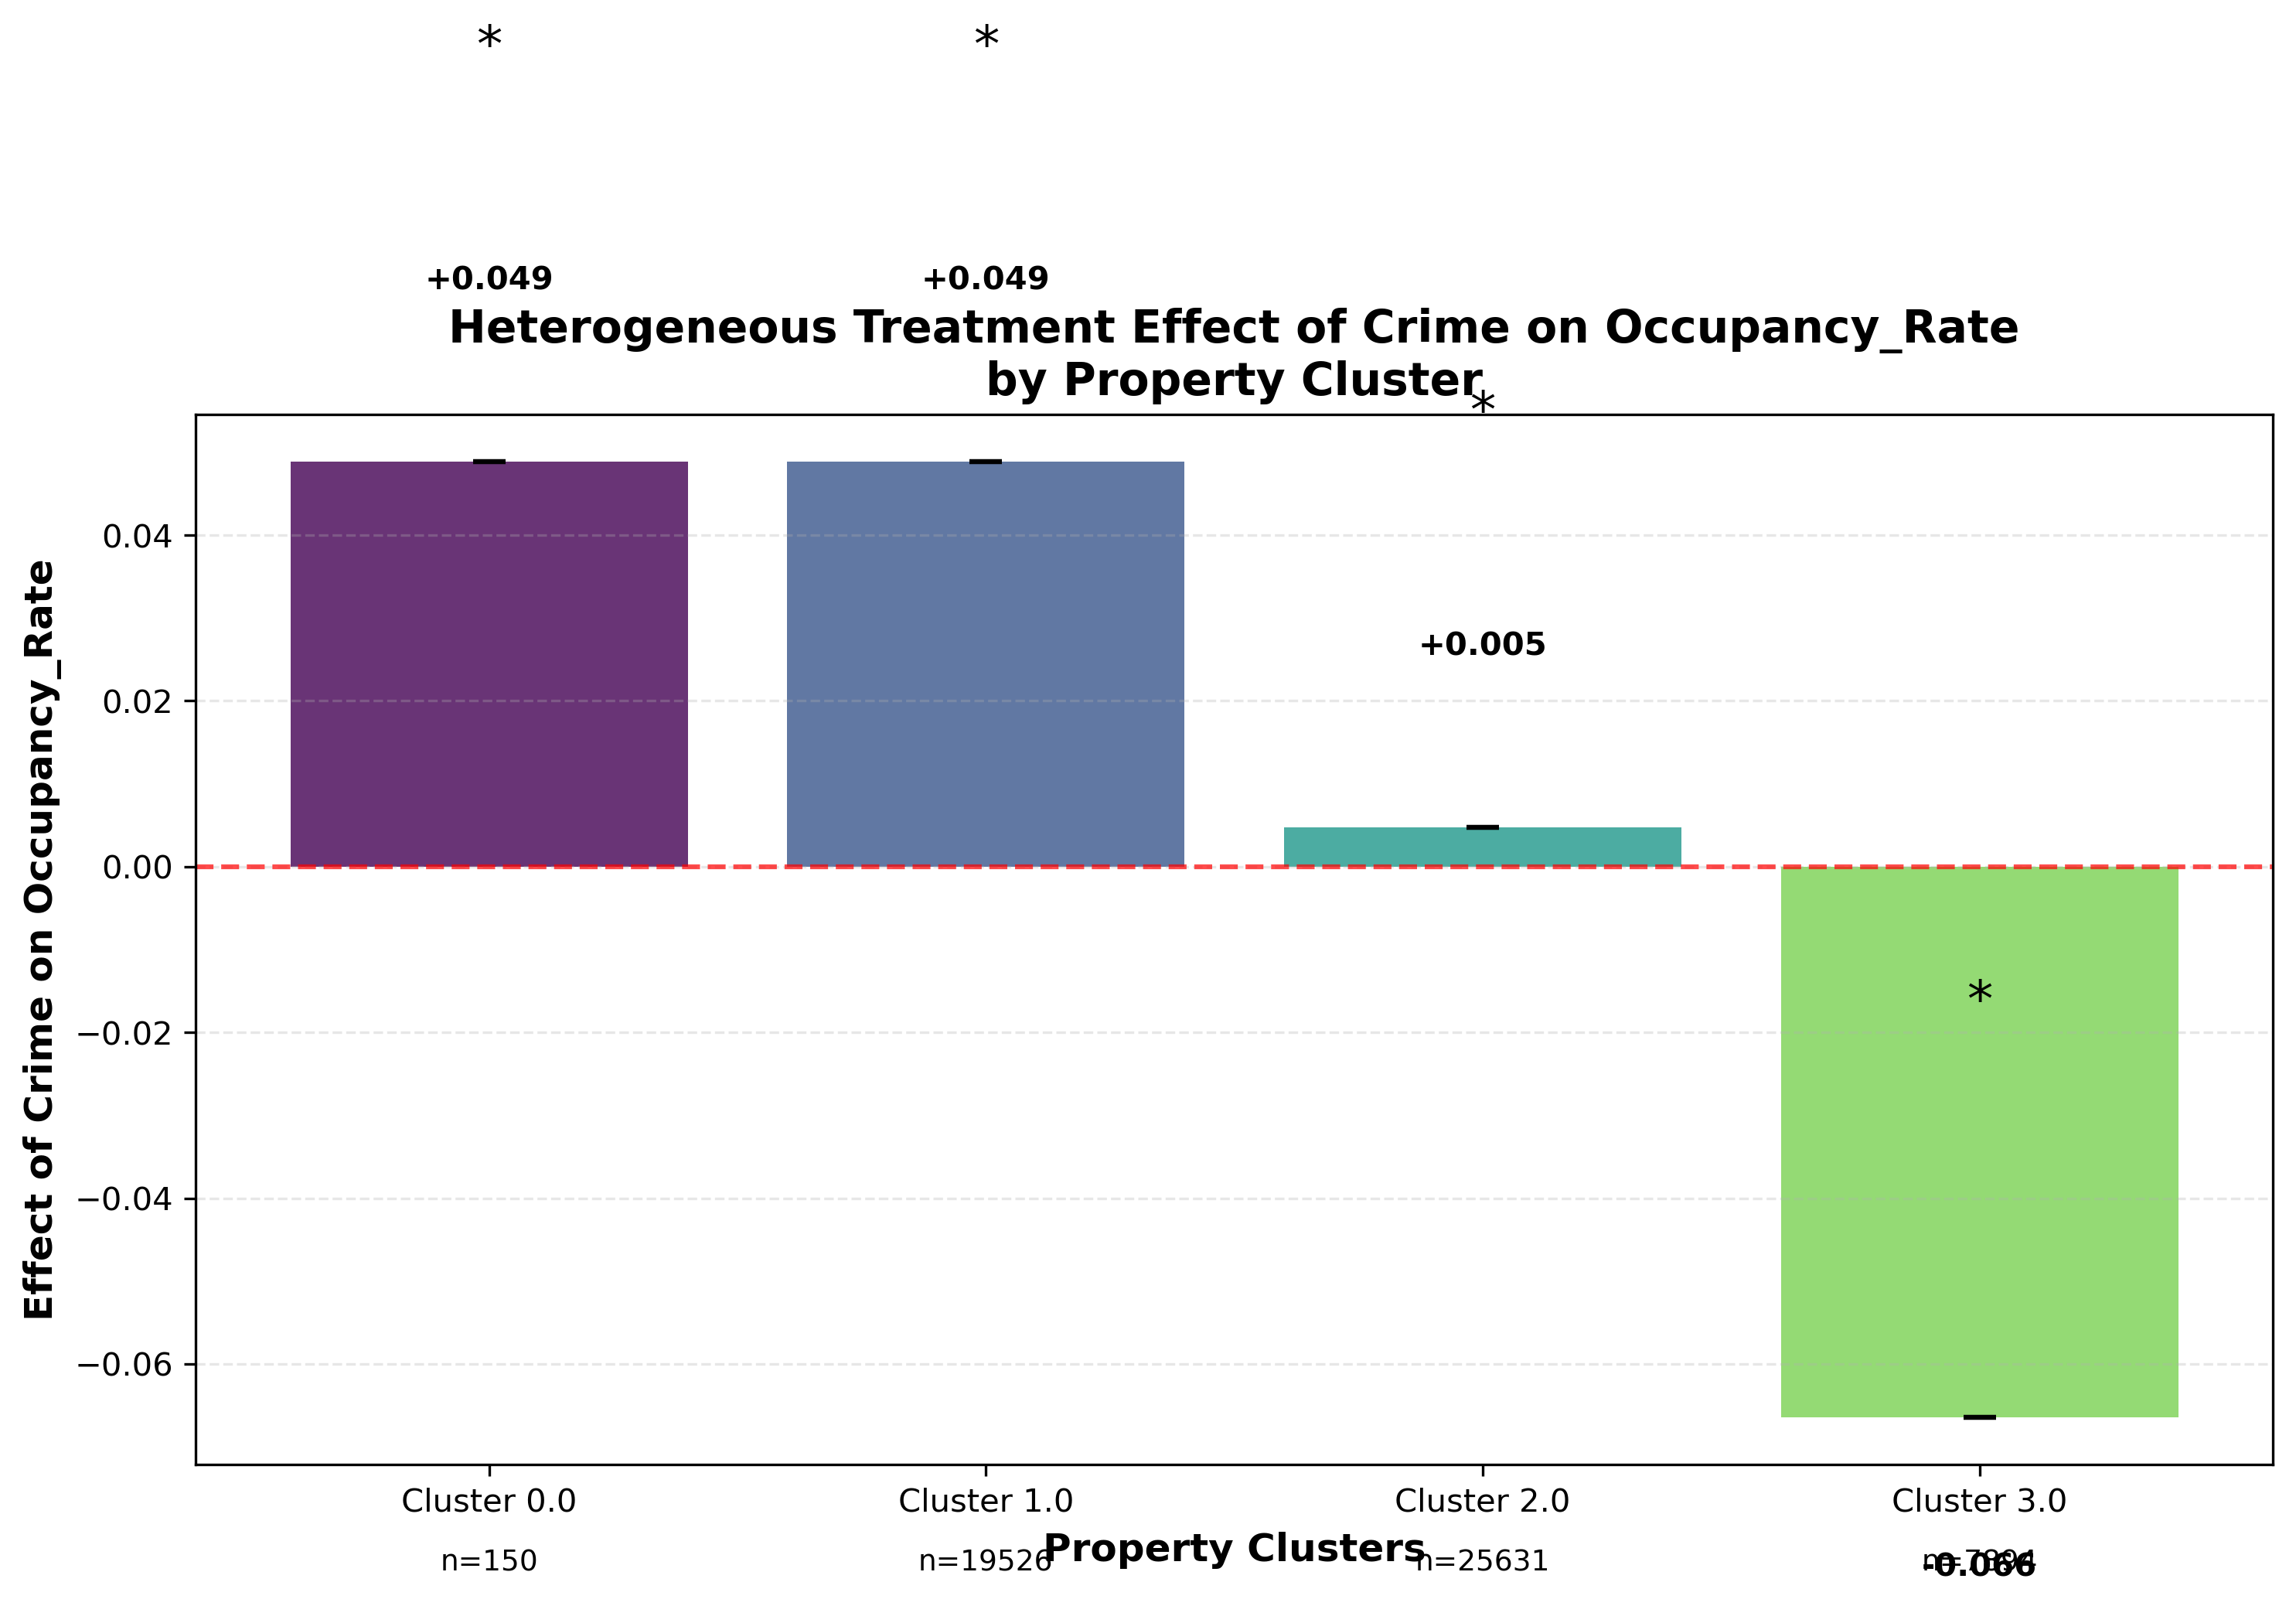


Average Treatment Effect of Crime on Occupancy_Rate: 0.0090
Largest positive effect in Cluster 0.0: 0.0488
Largest negative effect in Cluster 3.0: -0.0664

Analyzing ADR_USD
Estimating causal effects of crime_nearby on ADR_USD with effect modifier Cluster_Labels...


/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' i

Causal forest model fitted on 53201 observations
Plotting treatment effect of crime_nearby on ADR_USD by Cluster_Labels...
  Processing Cluster_Labels = 0.0...
  Processing Cluster_Labels = 1.0...
  Processing Cluster_Labels = 2.0...


/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' i

  Processing Cluster_Labels = 3.0...

Summary of Treatment Effects by Cluster:
Cluster    Effect     Std Dev    Sample Size 
------------------------------------------
0.0        1.3779     0.0000     150         
1.0        1.3779     0.0000     19526       
2.0        2.9910     0.0000     25631       
3.0        7.3532     0.0000     7894        


/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/var/folders/qf/_z697sgn3jx3215w7ykp1p1r0000gn/T/ipykernel_52774/2166099320.py:97: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



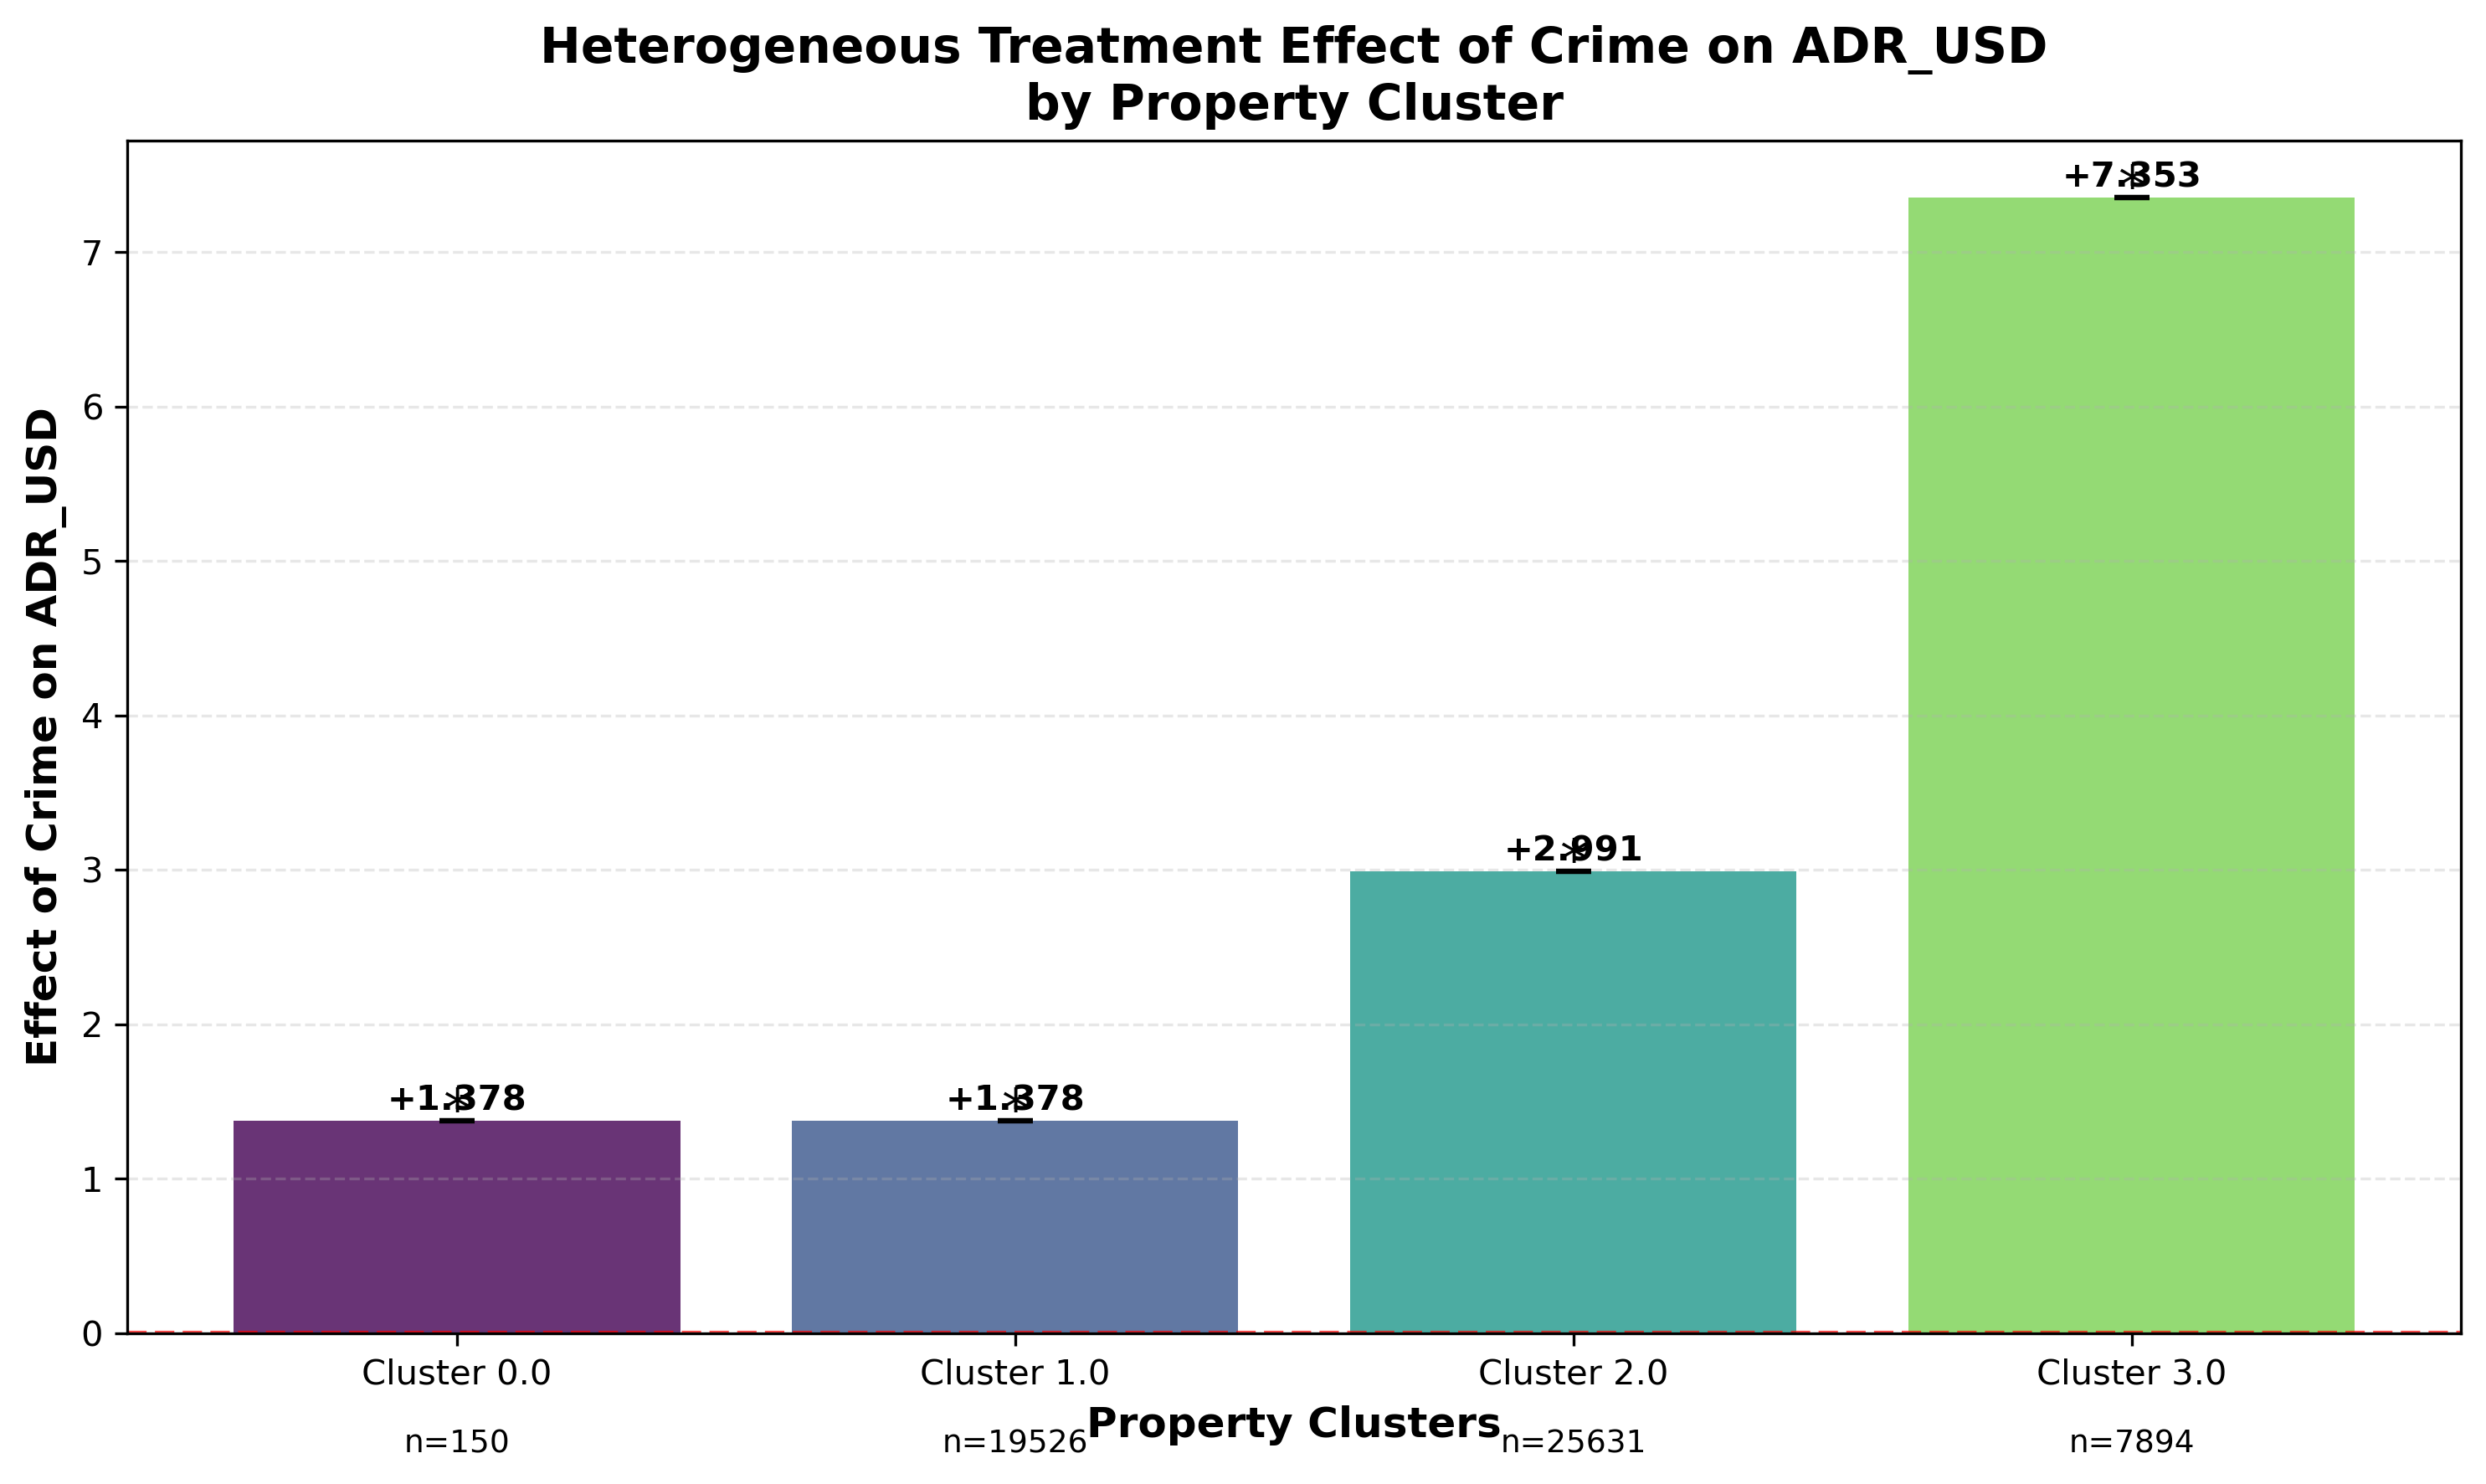


Average Treatment Effect of Crime on ADR_USD: 3.2750
Largest positive effect in Cluster 3.0: 7.3532
Largest negative effect in Cluster 1.0: 1.3779

Analyzing Revenue_USD
Estimating causal effects of crime_nearby on Revenue_USD with effect modifier Cluster_Labels...


/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' i

Causal forest model fitted on 53201 observations
Plotting treatment effect of crime_nearby on Revenue_USD by Cluster_Labels...
  Processing Cluster_Labels = 0.0...
  Processing Cluster_Labels = 1.0...
  Processing Cluster_Labels = 2.0...


/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' i

  Processing Cluster_Labels = 3.0...

Summary of Treatment Effects by Cluster:
Cluster    Effect     Std Dev    Sample Size 
------------------------------------------
0.0        185.3658   0.0000     150         
1.0        185.3658   0.0000     19526       
2.0        190.8307   0.0000     25631       
3.0        -195.3875  0.0000     7894        


/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhangshuyi/anaconda3/envs/py39/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/var/folders/qf/_z697sgn3jx3215w7ykp1p1r0000gn/T/ipykernel_52774/2166099320.py:97: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



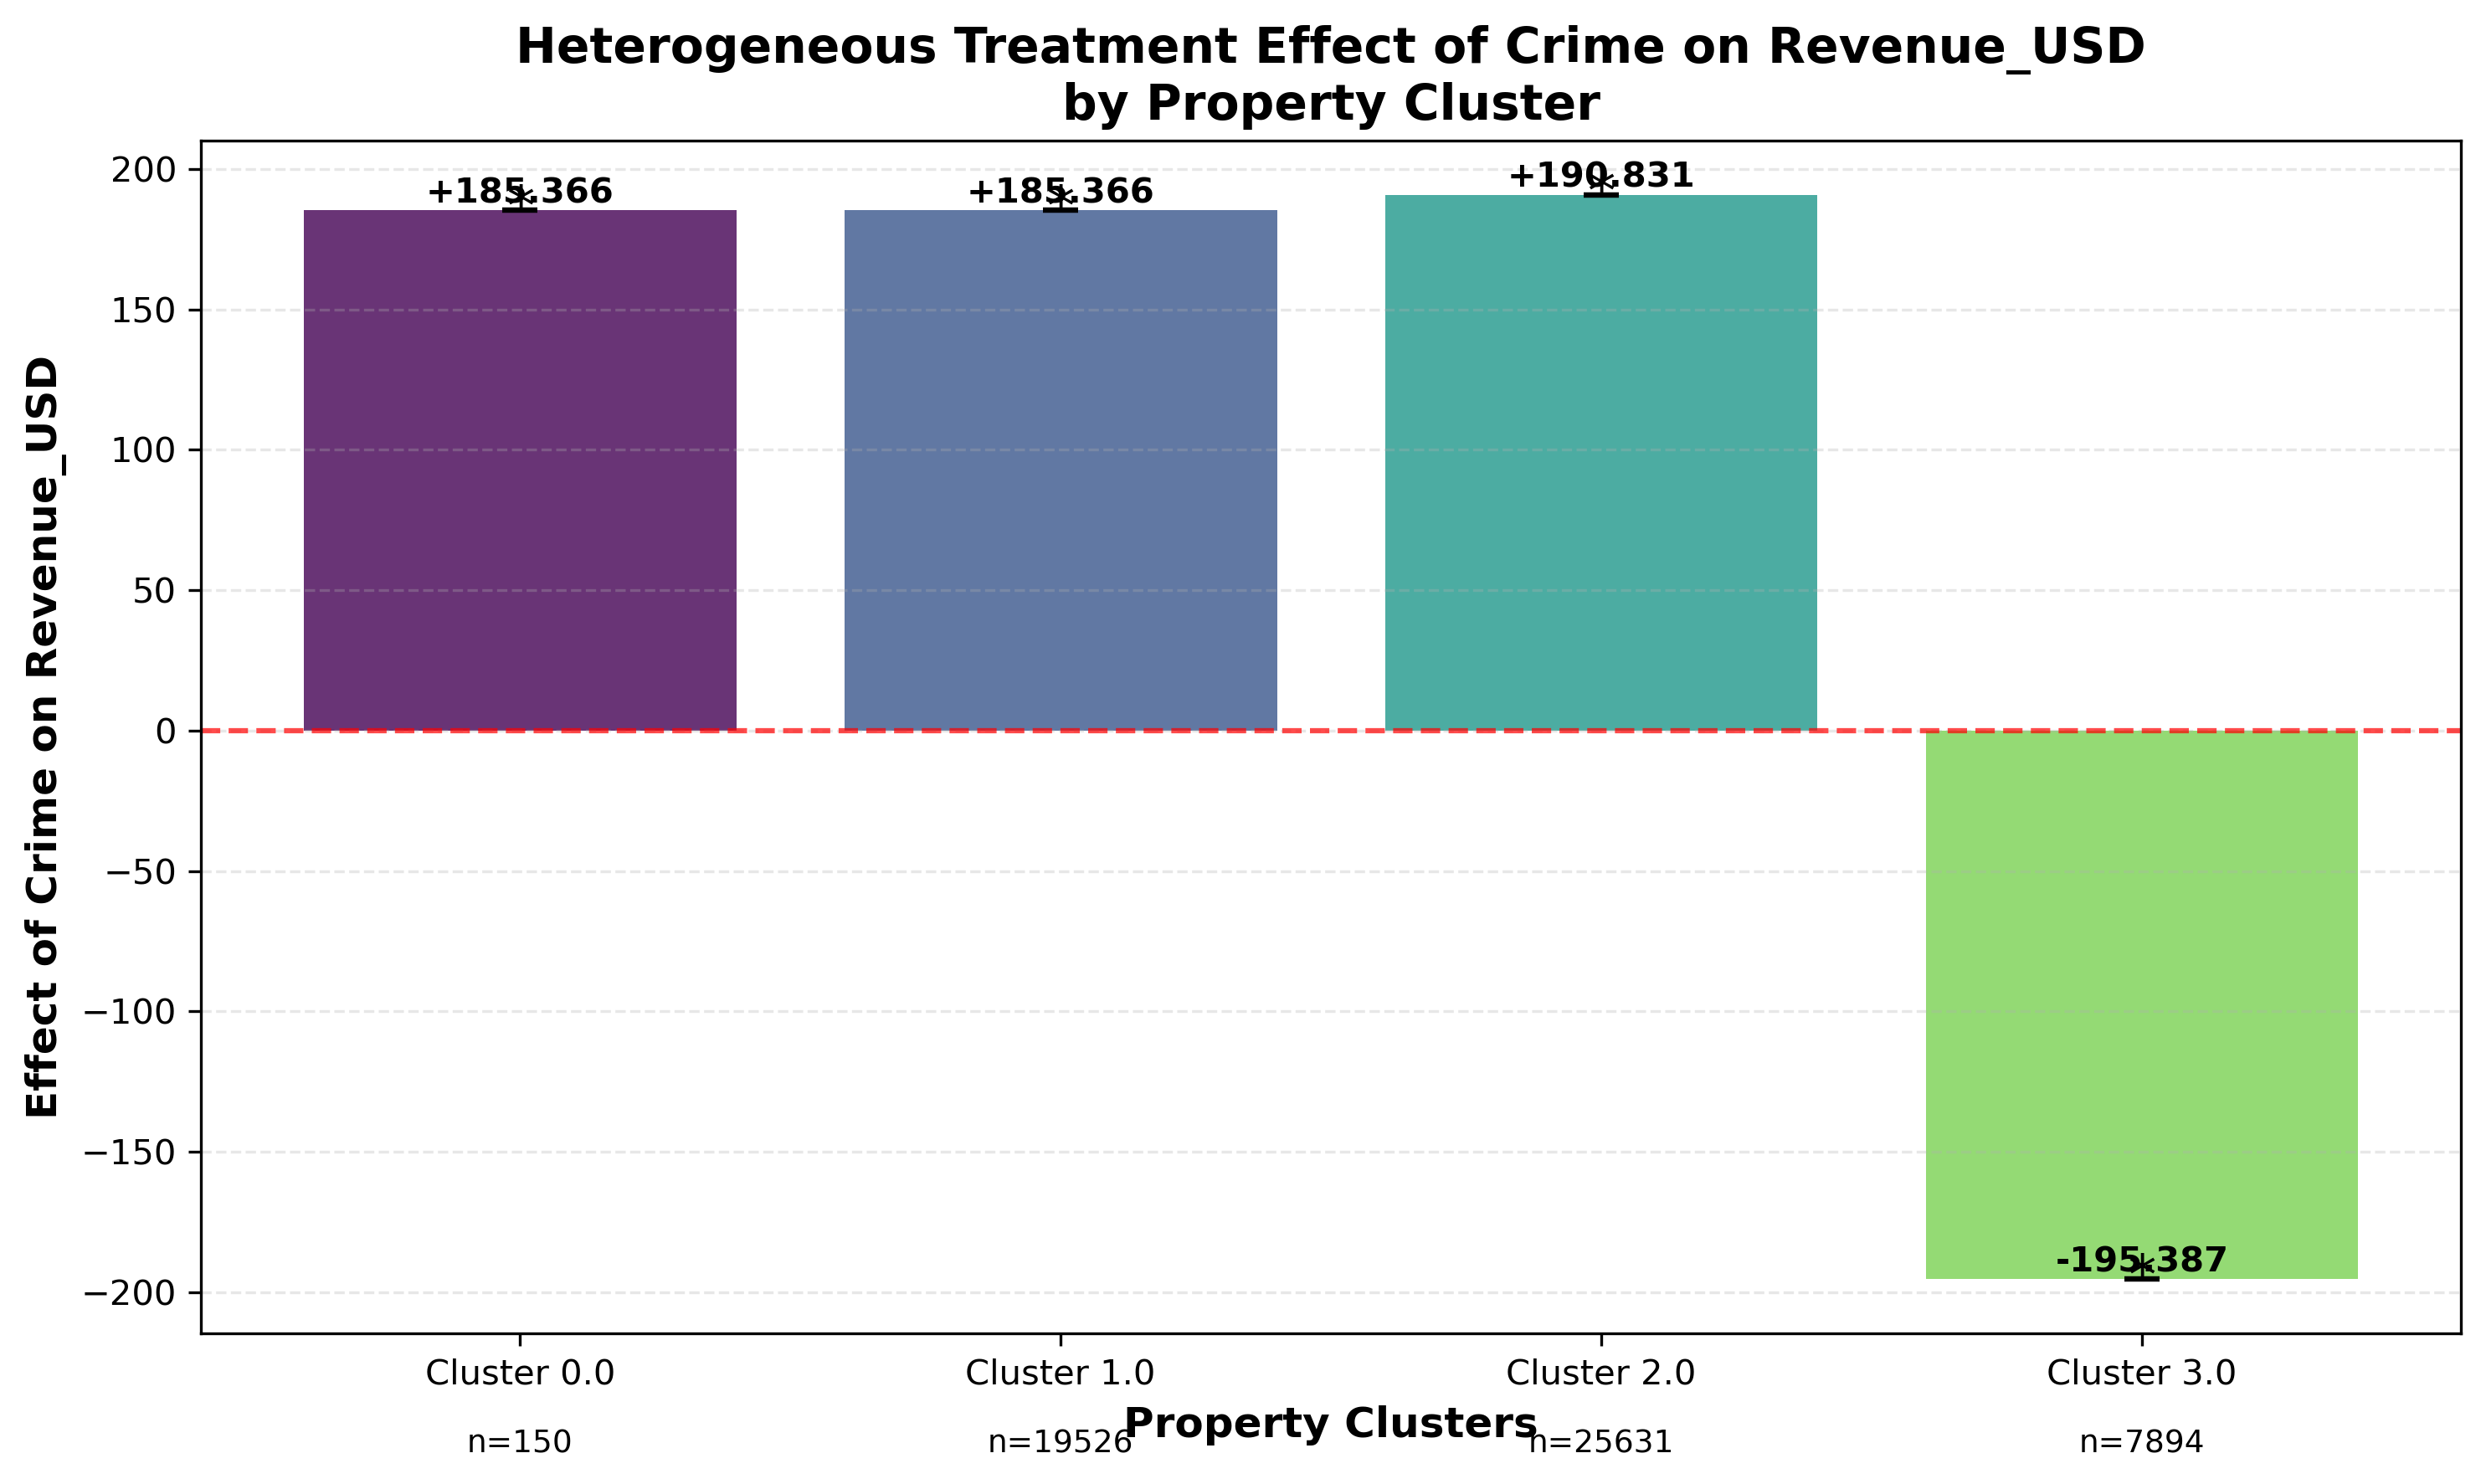


Average Treatment Effect of Crime on Revenue_USD: 91.5437
Largest positive effect in Cluster 2.0: 190.8307
Largest negative effect in Cluster 3.0: -195.3875

SUMMARY OF CAUSAL EFFECTS ANALYSIS

Occupancy_Rate:
  Average Treatment Effect: 0.0090
  Proportion of clusters with negative effects: 1/4 (25.0%)

ADR_USD:
  Average Treatment Effect: 3.2750
  Proportion of clusters with negative effects: 0/4 (0.0%)

Revenue_USD:
  Average Treatment Effect: 91.5437
  Proportion of clusters with negative effects: 1/4 (25.0%)


In [45]:
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


# Define variables for causal analysis
Y_cols = ['Occupancy_Rate', 'ADR_USD', 'Revenue_USD']
T_col = 'crime_nearby'
X_col = 'Cluster_Labels'  # Discrete effect modifier
W_col = ['Max_Guests', 'Minimum_Stay', 'Number_of_Photos', 
         'Number_of_Reviews', 'Response_Rate', 'Response_Time']

# Function to plot discrete modifier effects with enhanced visualization
def plot_discrete_modifier_effect(model, df, X_col, T_col, Y_col, W_col, 
                                 fig_size=(10, 6), palette='viridis'):
    """
    Plot the conditional average treatment effect (CATE) by discrete effect modifier
    with enhanced visualization for publication quality.
    
    Parameters:
    - model: Fitted causal forest model
    - df: DataFrame containing the data
    - X_col: Discrete effect modifier column name
    - T_col: Treatment column name
    - Y_col: Outcome column name
    - W_col: List of control variable column names
    - fig_size: Figure size as a tuple (width, height)
    - palette: Color palette for the plot
    
    Returns:
    - tuple: (treatment effects, unique values)
    """
    # Check if model is None
    if model is None:
        print(f"Cannot plot treatment effect: model for {Y_col} is None")
        return None, None
    
    print(f"Plotting treatment effect of {T_col} on {Y_col} by {X_col}...")
    
    # Get unique values of the discrete modifier
    unique_values = sorted(df[X_col].unique())
    
    # Initialize lists to store results
    cate_means = []
    cate_stds = []
    sample_sizes = []
    
    for value in unique_values:
        print(f"  Processing {X_col} = {value}...")
        # Filter data for the current value of the discrete modifier
        subset_df = df[df[X_col] == value]
        
        # Drop NaN values for all columns used in the model
        subset_df = subset_df.dropna(subset=[Y_col, T_col, X_col] + W_col)
        
        # Skip if subset is empty after dropping NaN values
        if len(subset_df) == 0:
            print(f"  Skipping {X_col} = {value}: No valid data after dropping NaN values")
            cate_means.append(np.nan)
            cate_stds.append(np.nan)
            sample_sizes.append(0)
            continue
            
        try:
            # Predict the treatment effect for this subset
            cate_estimates = model.effect(subset_df[[X_col]])
            cate_means.append(np.mean(cate_estimates))
            cate_stds.append(np.std(cate_estimates))
            sample_sizes.append(len(subset_df))
        except Exception as e:
            print(f"  Error predicting effect for {X_col} = {value}: {e}")
            cate_means.append(np.nan)
            cate_stds.append(np.nan)
            sample_sizes.append(0)
    
    # Filter out NaN values for plotting
    valid_indices = ~np.isnan(cate_means)
    filtered_values = [val for i, val in enumerate(unique_values) if valid_indices[i]]
    filtered_means = [val for i, val in enumerate(cate_means) if valid_indices[i]]
    filtered_stds = [val for i, val in enumerate(cate_stds) if valid_indices[i]]
    filtered_sizes = [val for i, val in enumerate(sample_sizes) if valid_indices[i]]
    
    # Display summary statistics
    print("\nSummary of Treatment Effects by Cluster:")
    print(f"{'Cluster':<10} {'Effect':<10} {'Std Dev':<10} {'Sample Size':<12}")
    print("-" * 42)
    for i, val in enumerate(filtered_values):
        print(f"{val:<10} {filtered_means[i]:<10.4f} {filtered_stds[i]:<10.4f} {filtered_sizes[i]:<12}")
    
    # Convert values to strings for cleaner display
    str_values = [f"Cluster {v}" for v in filtered_values]
    
    # Create the publication-quality plot
    plt.figure(figsize=fig_size, dpi=300)
    
    # Create bars with error bars
    colors = plt.cm.get_cmap(palette)(np.linspace(0, 0.8, len(filtered_means)))
    bars = plt.bar(str_values, filtered_means, color=colors, alpha=0.8)
    plt.errorbar(str_values, filtered_means, yerr=filtered_stds, fmt='none', 
                 ecolor='black', capsize=5, elinewidth=1.5, capthick=1.5)
    
    # Add a horizontal line at y=0
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
    
    # Add value labels on top of bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        sign = '+' if height > 0 else ''
        plt.text(bar.get_x() + bar.get_width()/2., 
                 height + (0.02 * np.sign(height)), 
                 f'{sign}{height:.3f}', 
                 ha='center', va='bottom', fontweight='bold')
    
    # Add sample size labels below x-axis
    for i, val in enumerate(str_values):
        plt.text(i, -0.08, f"n={filtered_sizes[i]}", 
                 ha='center', va='top', transform=plt.gca().get_xaxis_transform(), 
                 fontsize=9, fontweight='normal')
    
    # Enhance aesthetics
    plt.xlabel(f'Property Clusters', fontsize=12, fontweight='bold')
    plt.ylabel(f'Effect of Crime on {Y_col}', fontsize=12, fontweight='bold')
    plt.title(f'Heterogeneous Treatment Effect of Crime on {Y_col}\nby Property Cluster', 
             fontsize=14, fontweight='bold')
    
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    
    # Add significance indicators
    for i, (mean, std) in enumerate(zip(filtered_means, filtered_stds)):
        # Consider effect significant if mean > 2*std (rough p<0.05 approximation)
        if abs(mean) > 2 * std:
            plt.text(i, filtered_means[i] + np.sign(filtered_means[i]) * filtered_stds[i] + 0.05, 
                     '*', ha='center', va='center', fontsize=16)
    
    plt.savefig(f'cate_{Y_col}_by_{X_col}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return filtered_means, filtered_values

# Remove all the NaN values in the relevant columns
df_chicago_sub_clean = df_chicago_sub.dropna(subset=[T_col, X_col] + W_col + Y_cols)

# Results dictionary to store all models and effects
results = {}

# Analyze each outcome variable
for Y_col in Y_cols:
    print(f"\n{'='*50}\nAnalyzing {Y_col}\n{'='*50}")
    
    # Estimate causal effects
    cf_model = estimate_causal_effects(df_chicago_sub_clean, Y_col, T_col, X_col, W_col)
    
    # Only proceed with visualization if model was successfully created
    if cf_model is not None:
        # Visualize treatment effect
        treatment_effects, cluster_values = plot_discrete_modifier_effect(
            cf_model, df_chicago_sub_clean, X_col, T_col, Y_col, W_col
        )
        
        # Store results if visualization was successful
        if treatment_effects is not None:
            results[Y_col] = {
                'model': cf_model,
                'treatment_effects': treatment_effects,
                'cluster_values': cluster_values
            }
            
            # Calculate and display average treatment effect
            ate = np.mean(treatment_effects)
            print(f"\nAverage Treatment Effect of Crime on {Y_col}: {ate:.4f}")
            
            # Identify clusters with largest positive and negative effects
            max_effect_idx = np.argmax(treatment_effects)
            min_effect_idx = np.argmin(treatment_effects)
            
            print(f"Largest positive effect in Cluster {cluster_values[max_effect_idx]}: {treatment_effects[max_effect_idx]:.4f}")
            print(f"Largest negative effect in Cluster {cluster_values[min_effect_idx]}: {treatment_effects[min_effect_idx]:.4f}")
    else:
        print(f"Skipping visualization for {Y_col} due to model fitting failure")

# Summarize overall findings
print("\n" + "="*50)
print("SUMMARY OF CAUSAL EFFECTS ANALYSIS")
print("="*50)

for Y_col in results:
    print(f"\n{Y_col}:")
    ate = np.mean(results[Y_col]['treatment_effects'])
    print(f"  Average Treatment Effect: {ate:.4f}")
    
    # Calculate percentage of clusters with negative effects
    neg_effects = sum(1 for effect in results[Y_col]['treatment_effects'] if effect < 0)
    total_clusters = len(results[Y_col]['treatment_effects'])
    print(f"  Proportion of clusters with negative effects: {neg_effects}/{total_clusters} ({neg_effects/total_clusters:.1%})")

### Run Linear Regression model to explore:
##### 'Max_Guests', 'Minimum_Stay', 'Number_of_Photos', 'Number_of_Reviews', 'Response_Rate', 'Response_Time' & their interaction with 'Occupancy_Rate', 'ADR_USD', 'Revenue_USD' as dependent variables

In [46]:
df_chicago_sub.head()
df_chicago_sub.shape

(248064, 69)

In [47]:
# Regression Analysis
# x_list = ['price_change_pct', 'Num_Crimes', 'price_change_pct * Num_Crimes', 'Max_Guests', 'Minimum_Stay',
#           'Price_Tier', 'Number_of_Photos', 'Number_of_Reviews', 'Response_Rate', 'Response_Time']
x_list = ['price_surge', 'crime_nearby', 'price_surge * crime_nearby', 'Max_Guests', 'Minimum_Stay',
          'Price_Tier', 'Number_of_Photos', 'Number_of_Reviews', 'Response_Rate', 'Response_Time']
w_list = ['i(Cluster_Labels)'] 
y_list = ['Occupancy_Rate', "Revenue_USD", "ADR_USD"] # Add more variables here as Y
#labels = {"Number_of_Reviews":"\# Reviews"}
results = []
for y in y_list:
    for x in x_list:
        labels = {x: x}
    # fit = pf.feols(fml=f"{y} ~ {' + '.join(x_list)} + {' + '.join(w_list)}", data=airbnb_df)
    # fit = pf.feols(fml=f"{y} ~ {' + '.join(x_list)} + {' + '.join(w_list)} | month", data=airbnb_reg_df)
    fit = pf.feols(fml=f"{y} ~ {' + '.join(x_list)} + {' + '.join(w_list)} | Month + Zipcode", data=df_chicago_sub)
    results.append(fit)

# Save the table to a tex file
table_tex = pf.etable(results,
        #   labels=labels,
          type='tex')
with open(os.path.join(TABLES,'sample_regression_analysis_table.tex'), 'w') as f:
    f.write(table_tex)

#report
pf.etable(results, labels=labels)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


GT(_tbl_data=   level_0                          level_1                       0                           1                        2
0     coef                      price_surge     0.051* <br> (0.017)     288.653* <br> (102.644)    14.266** <br> (4.010)
1     coef                     crime_nearby   0.044*** <br> (0.002)    335.084*** <br> (29.888)   33.165*** <br> (0.497)
2     coef                       Max_Guests     -0.000 <br> (0.001)    382.097*** <br> (53.469)   28.914*** <br> (0.118)
3     coef                     Minimum_Stay  -0.001*** <br> (0.000)      -6.175*** <br> (0.854)   -0.481*** <br> (0.005)
4     coef            Price_Tier[T.economy]     -0.002 <br> (0.011)     177.169** <br> (52.683)   17.317*** <br> (0.190)
5     coef             Price_Tier[T.luxury]     -0.034 <br> (0.017)  1010.663*** <br> (206.662)  109.843*** <br> (0.423)
6     coef           Price_Tier[T.midscale]      0.006 <br> (0.015)     303.083** <br> (75.770)   18.781*** <br> (0.254)
7     coef            Price_Tier[T.upscale]     -0.023 <br> (0.018)      257.998* <br> (88.202)   20.833*** <br> (0.315)
8     coef                 Number_of_Photos   0.001*** <br> (0.000)       7.872*** <br> (0.765)    1.104*** <br> (0.017)
9     coef                Number_of_Reviews   0.001*** <br> (0.000)       4.286*** <br> (0.301)    0.070*** <br> (0.002)
10    coef                    Response_Rate   0.001*** <br> (0.000)       4.470*** <br> (0.738)    0.587*** <br> (0.008)
11    coef                    Response_Time    -0.000* <br> (0.000)         -0.000 <br> (0.000)      -0.000 <br> (0.000)
12    coef         C(Cluster_Labels)[T.1.0]    0.069** <br> (0.016)   705.039*** <br> (113.497)   87.932*** <br> (1.665)
13    coef         C(Cluster_Labels)[T.2.0]    0.057** <br> (0.015)   767.448*** <br> (111.954)   89.826*** <br> (1.730)
14    coef         C(Cluster_Labels)[T.3.0]   0.074*** <br> (0.014)   723.264*** <br> (112.326)   85.466*** <br> (1.737)
15    coef  price_surge &#215; crime_nearby  -0.189*** <br> (0.015)  -1052.792*** <br> (99.553)  -57.320*** <br> (4.122)
16      fe                          Zipcode                       x                           x                        x
17      fe                            Month                       x                           x                        x
18   stats                     Observations                   52827                       52827                    52827
19   stats                        S.E. type               by: Month                   by: Month                by: Month
20   stats                    R<sup>2</sup>                   0.303                       0.355                    0.441, _body=<great_tables._gt_data.Body object at 0x2c36164a0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x2c363e620>, _spanners=Spanners([SpannerInfo(spanner_id='Occupancy_Rate', spanner_level=1, spanner_label='Occupancy_Rate', spanner_units=None, spanner_pattern=None, vars=['0'], built=None), SpannerInfo(spanner_id='Revenue_USD', spanner_level=1, spanner_label='Revenue_USD', spanner_units=None, spanner_pattern=None, vars=['1'], built=None), SpannerInfo(spanner_id='ADR_USD', spanner_level=1, spanner_label='ADR_USD', spanner_units=None, spanner_pattern=None, vars=['2'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0

In [48]:
# Regression Analysis
# x_list = ['price_change_pct', 'Num_Crimes', 'price_change_pct * Num_Crimes', 'Max_Guests', 'Minimum_Stay',
#           'Price_Tier', 'Number_of_Photos', 'Number_of_Reviews', 'Response_Rate', 'Response_Time']
x_list = ['price_drop', 'crime_nearby', 'price_drop * crime_nearby', 'Max_Guests', 'Minimum_Stay',
          'Price_Tier', 'Number_of_Photos', 'Number_of_Reviews', 'Response_Rate', 'Response_Time']
w_list = ['i(Cluster_Labels)'] 
y_list = ['Occupancy_Rate', "Revenue_USD", "ADR_USD"] # Add more variables here as Y
#labels = {"Number_of_Reviews":"\# Reviews"}
results = []
for y in y_list:
    for x in x_list:
        labels = {x: x}
    fit = pf.feols(fml=f"{y} ~ {' + '.join(x_list)} + {' + '.join(w_list)} | Month + Zipcode", data=df_chicago_sub)
    results.append(fit)

# Save the table to a tex file
table_tex = pf.etable(results,
        #   labels=labels,
          type='tex')
with open(os.path.join(TABLES,'sample_regression_analysis_table.tex'), 'w') as f:
    f.write(table_tex)

#report
pf.etable(results, labels=labels)

GT(_tbl_data=   level_0                         level_1                       0                           1                        2
0     coef                      price_drop    0.052** <br> (0.015)        60.770 <br> (93.068)     14.943* <br> (4.851)
1     coef                    crime_nearby      0.006 <br> (0.004)       73.049* <br> (24.373)   23.063*** <br> (0.920)
2     coef                      Max_Guests     -0.000 <br> (0.001)    382.094*** <br> (53.476)   28.874*** <br> (0.102)
3     coef                    Minimum_Stay  -0.001*** <br> (0.000)      -6.292*** <br> (0.866)   -0.485*** <br> (0.006)
4     coef           Price_Tier[T.economy]     -0.002 <br> (0.011)     177.164** <br> (53.593)   17.303*** <br> (0.175)
5     coef            Price_Tier[T.luxury]     -0.034 <br> (0.017)  1009.634*** <br> (207.892)  109.716*** <br> (0.414)
6     coef          Price_Tier[T.midscale]      0.005 <br> (0.015)     300.995** <br> (76.255)   18.617*** <br> (0.147)
7     coef           Price_Tier[T.upscale]     -0.024 <br> (0.018)      255.638* <br> (88.880)   20.665*** <br> (0.199)
8     coef                Number_of_Photos   0.001*** <br> (0.000)       8.115*** <br> (0.756)    1.116*** <br> (0.016)
9     coef               Number_of_Reviews   0.001*** <br> (0.000)       4.338*** <br> (0.308)    0.071*** <br> (0.002)
10    coef                   Response_Rate   0.001*** <br> (0.000)       4.531*** <br> (0.736)    0.587*** <br> (0.008)
11    coef                   Response_Time   -0.000** <br> (0.000)         -0.000 <br> (0.000)      -0.000 <br> (0.000)
12    coef        C(Cluster_Labels)[T.1.0]   0.072*** <br> (0.015)   742.170*** <br> (118.885)   88.602*** <br> (0.887)
13    coef        C(Cluster_Labels)[T.2.0]   0.059*** <br> (0.013)   802.673*** <br> (116.867)   90.473*** <br> (0.963)
14    coef        C(Cluster_Labels)[T.3.0]   0.077*** <br> (0.013)   758.358*** <br> (120.853)   86.023*** <br> (0.983)
15    coef  price_drop &#215; crime_nearby  -0.074*** <br> (0.016)      -121.034 <br> (97.268)  -32.729*** <br> (4.897)
16      fe                         Zipcode                       x                           x                        x
17      fe                           Month                       x                           x                        x
18   stats                    Observations                   52827                       52827                    52827
19   stats                       S.E. type               by: Month                   by: Month                by: Month
20   stats                   R<sup>2</sup>                   0.302                       0.353                    0.440, _body=<great_tables._gt_data.Body object at 0x3acf03760>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x2c36d5720>, _spanners=Spanners([SpannerInfo(spanner_id='Occupancy_Rate', spanner_level=1, spanner_label='Occupancy_Rate', spanner_units=None, spanner_pattern=None, vars=['0'], built=None), SpannerInfo(spanner_id='Revenue_USD', spanner_level=1, spanner_label='Revenue_USD', spanner_units=None, spanner_pattern=None, vars=['1'], built=None), SpannerInfo(spanner_id='ADR_USD', spanner_level=1, spanner_label='ADR_USD', spanner_units=None, spanner_pattern=None, vars=['2'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** 